<a href="https://colab.research.google.com/github/SAHAYAHENIHT/Honeywell_Hackathon/blob/main/LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import pandas as pd

# Load the dataset from the Excel file
excel_file_path = 'FnB_LSTM_Dataset_with_Anomalies.xlsx'
df = pd.read_excel(excel_file_path)

# Display the first few rows of the DataFrame to verify loading
display(df.head())

Batch_ID  Time_Step  Flour_Weight  Yeast_pct  Water_pH  Mixer_Speed  \
0         1          1    507.450712   2.231994   6.71839          118   
1         1          2    507.450712   2.231994   6.71839          118   
2         1          3    507.450712   2.231994   6.71839          118   
3         1          4    507.450712   2.231994   6.71839          118   
4         1          5    507.450712   2.231994   6.71839          118   

   Proof_Temp  Proof_Humidity   Oven_Temp  Core_Temp  Baking_Time  \
0   31.120829       71.499624   42.585207  23.515186           35   
1   31.120829       71.499624   63.035143  33.840485           35   
2   31.120829       71.499624   84.980046  42.041807           35   
3   31.120829       71.499624  106.619193  52.935345           35   
4   31.120829       71.499624  127.338863  59.012731           35   

   Texture_Score  Visual_Quality  
0           5.45               0  
1           5.45               0  
2           5.45               0  
3           5.45               0  
4           5.45               0

In [16]:
# Display descriptive statistics
display(df.describe())

Batch_ID   Time_Step  Flour_Weight    Yeast_pct     Water_pH  \
count  4000.000000  4000.00000   4000.000000  4000.000000  4000.000000   
mean    200.500000     5.50000    499.209562     2.003265     6.591311   
std     115.484129     2.87264     28.712333     0.401776     0.510535   
min       1.000000     1.00000    231.344074     0.305958     3.000000   
25%     100.750000     3.00000    487.697347     1.721063     6.300653   
50%     200.500000     5.50000    498.468004     1.998896     6.586129   
75%     300.250000     8.00000    508.792487     2.254376     6.917817   
max     400.000000    10.00000    774.432650     7.235320    10.000000   

       Mixer_Speed   Proof_Temp  Proof_Humidity    Oven_Temp    Core_Temp  \
count  4000.000000  4000.000000     4000.000000  4000.000000  4000.000000   
mean    110.348250    31.565930       77.468954   134.860368    64.004790   
std      23.889457     3.052437        5.560535    56.003921    25.699253   
min      10.000000    10.000000       20.000000    34.763658    19.255476   
25%      95.000000    29.740843       74.110205    87.477279    42.007198   
50%     110.000000    31.680688       77.457307   133.398859    64.001105   
75%     125.000000    33.291491       81.238257   181.576867    85.467533   
max     300.000000    60.000000      100.000000   300.000000   150.000000   

       Baking_Time  Texture_Score  Visual_Quality  
count  4000.000000    4000.000000     4000.000000  
mean     32.092500       5.972200        0.485000  
std       4.243636       0.687811        0.499837  
min      25.000000       3.640000        0.000000  
25%      29.000000       5.540000        0.000000  
50%      32.000000       5.980000        0.000000  
75%      36.000000       6.400000        1.000000  
max      39.000000       7.780000        1.000000

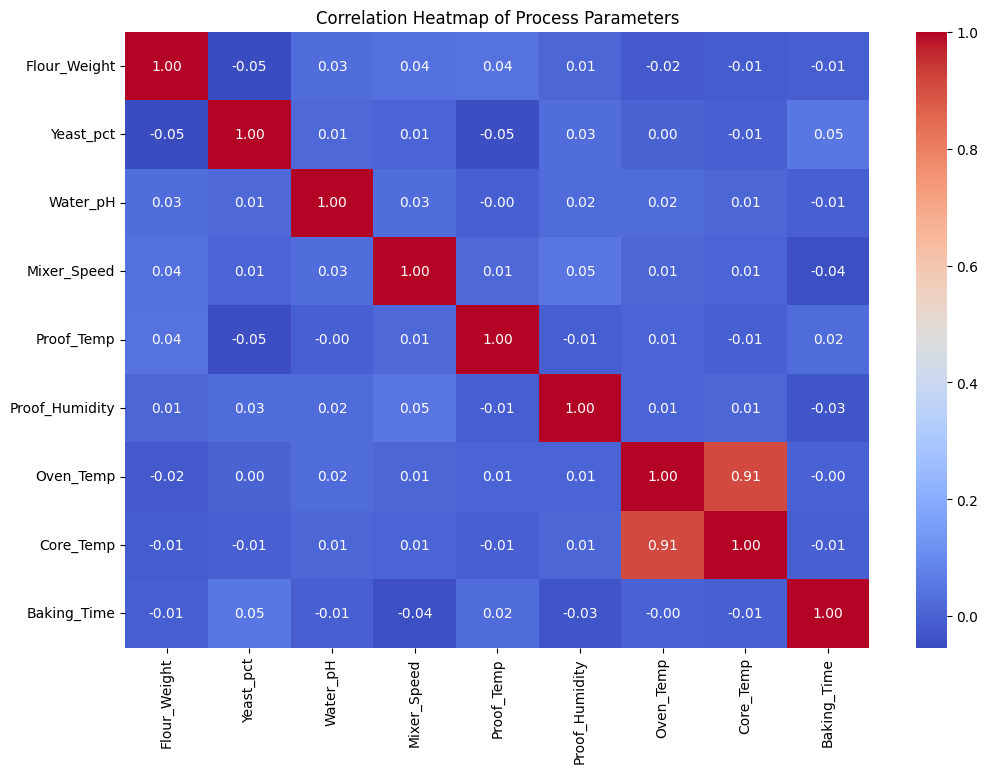

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix for numerical columns
# Exclude 'Batch_ID' and 'Time_Step' as they are identifiers, and target variables
numerical_cols = df.select_dtypes(include=['number']).columns.tolist()
cols_to_exclude = ['Batch_ID', 'Time_Step', 'Texture_Score', 'Visual_Quality']
correlation_cols = [col for col in numerical_cols if col not in cols_to_exclude]

correlation_matrix = df[correlation_cols].corr()

# Plot the correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Process Parameters')
plt.show()

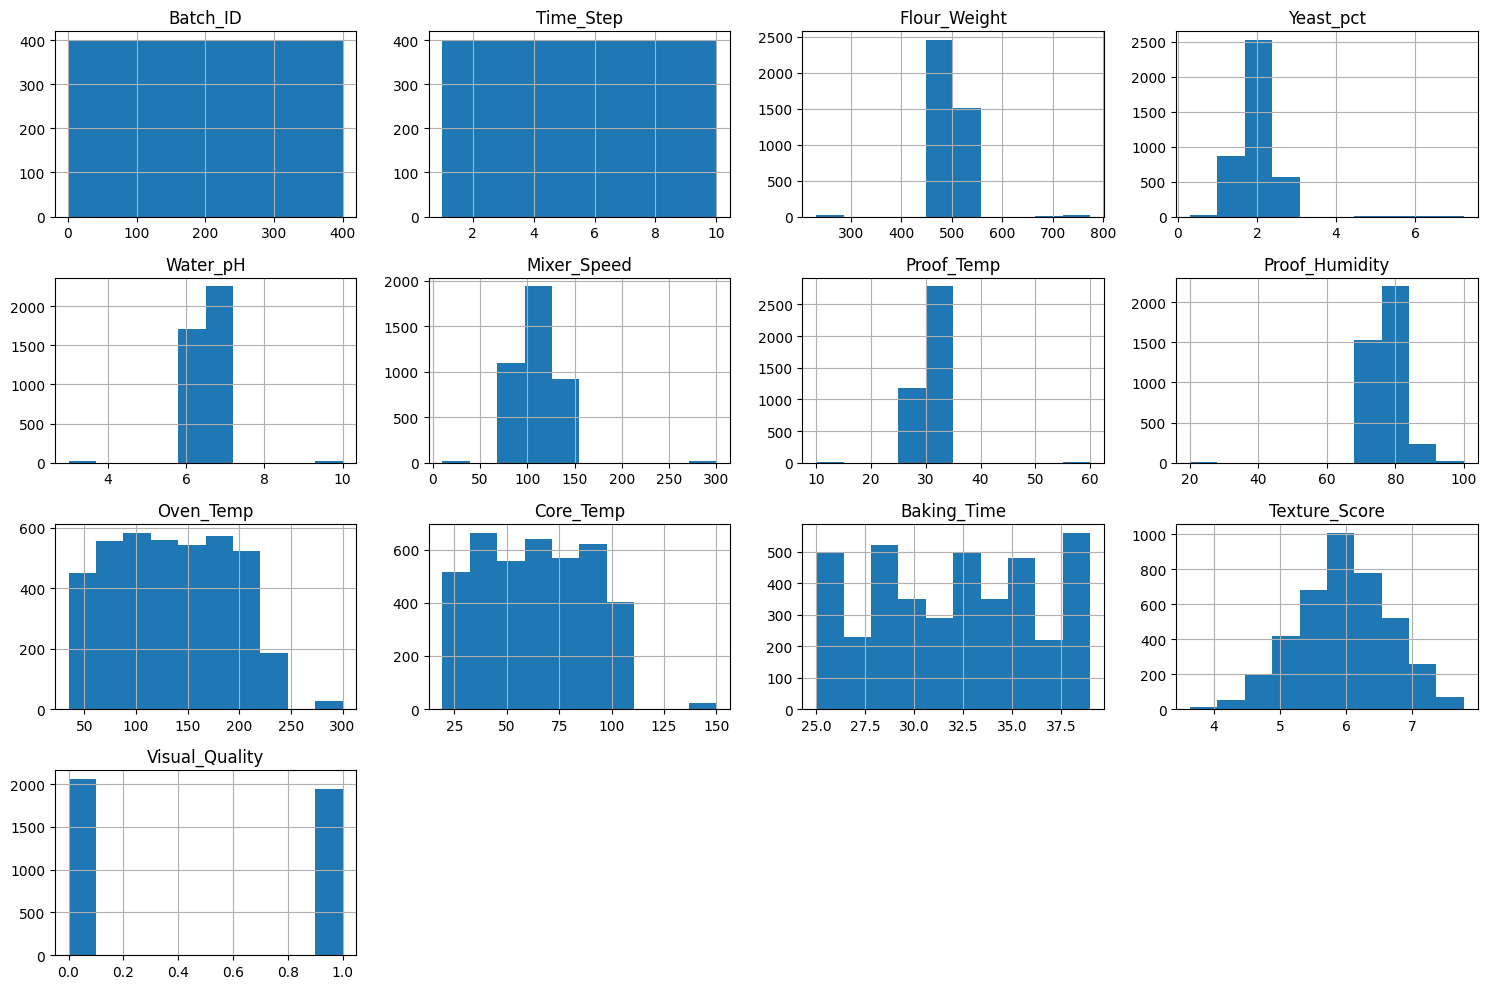

In [18]:
# Plot histograms for each numerical variable
df.hist(figsize=(15, 10))
plt.tight_layout()
plt.show()

In [19]:
import numpy as np

# Apply Z-score method for outlier detection
z_scores = np.abs((df.select_dtypes(include=np.number) - df.select_dtypes(include=np.number).mean()) / df.select_dtypes(include=np.number).std())
outliers_zscore = df[z_scores > 3].dropna(how='all')

print("Outliers detected using Z-score method:")
display(outliers_zscore)

Outliers detected using Z-score method:


Batch_ID  Time_Step  Flour_Weight  Yeast_pct  Water_pH  Mixer_Speed  \
9          NaN        NaN           NaN        NaN       NaN        300.0   
10         NaN        NaN           NaN        NaN       3.0          NaN   
20         NaN        NaN           NaN        NaN       NaN          NaN   
21         NaN        NaN           NaN        NaN       NaN          NaN   
48         NaN        NaN           NaN        NaN       NaN          NaN   
...        ...        ...           ...        ...       ...          ...   
3939       NaN        NaN           NaN        NaN       NaN          NaN   
3943       NaN        NaN           NaN   0.309585       NaN          NaN   
3958       NaN        NaN           NaN        NaN       NaN          NaN   
3974       NaN        NaN           NaN        NaN       NaN          NaN   
3984       NaN        NaN           NaN   0.409735       NaN          NaN   

      Proof_Temp  Proof_Humidity  Oven_Temp  Core_Temp  Baking_Time  \
9            NaN             NaN        NaN        NaN          NaN   
10           NaN             NaN        NaN        NaN          NaN   
20          10.0             NaN        NaN        NaN          NaN   
21           NaN             NaN        NaN      150.0          NaN   
48          60.0             NaN        NaN        NaN          NaN   
...          ...             ...        ...        ...          ...   
3939         NaN             NaN        NaN        NaN          NaN   
3943         NaN             NaN        NaN        NaN          NaN   
3958         NaN           100.0        NaN        NaN          NaN   
3974        10.0             NaN        NaN        NaN          NaN   
3984         NaN             NaN        NaN        NaN          NaN   

      Texture_Score  Visual_Quality  
9               NaN             NaN  
10              NaN             NaN  
20              NaN             NaN  
21              NaN             NaN  
48              NaN             NaN  
...             ...             ...  
3939           3.64             NaN  
3943            NaN             NaN  
3958            NaN             NaN  
3974            NaN             NaN  
3984            NaN             NaN  

[269 rows x 13 columns]


Outliers detected using IQR method:


Batch_ID  Time_Step  Flour_Weight  Yeast_pct  Water_pH  Mixer_Speed  \
9            1         10    507.450712   2.231994  6.718390          300   
10           2          1    516.953423   1.673365  3.000000          129   
20           3          1    483.404975   2.229606  6.765069          106   
48           5          9    529.475521   2.092697  6.097024          135   
52           6          3    250.097754   1.760829  7.195504           91   
...        ...        ...           ...        ...       ...          ...   
3939       394         10    476.739549   1.701078  7.088696          122   
3943       395          4    529.222524   0.309585  6.851875          106   
3958       396          9    489.430351   2.448797  6.428589          109   
3974       398          5    526.856953   2.452237  6.531085          113   
3984       399          5    487.008669   0.409735  6.239505          101   

      Proof_Temp  Proof_Humidity   Oven_Temp   Core_Temp  Baking_Time  \
9      31.120829       71.499624  237.715862  103.558385           35   
10     32.637656       74.675666   50.119357   25.268858           30   
20     10.000000       75.743903   49.411380   21.024862           39   
48     60.000000       80.923245  212.205689   92.459415           32   
52     31.908054       83.239545   90.748455   43.424218           31   
...          ...             ...         ...         ...          ...   
3939   32.705578       84.265494  206.132664  103.468839           36   
3943   28.974376       78.703284  111.988043   52.675318           28   
3958   29.671102      100.000000  191.967460   93.893929           31   
3974   10.000000       74.138838  136.574335   54.554015           37   
3984   33.930466       77.379106  123.656136   55.692845           38   

      Texture_Score  Visual_Quality  
9              5.45               0  
10             5.41               0  
20             5.16               0  
48             5.74               0  
52             6.95               1  
...             ...             ...  
3939           3.64               0  
3943           5.38               0  
3958           4.87               0  
3974           5.58               0  
3984           5.03               0  

[265 rows x 13 columns]

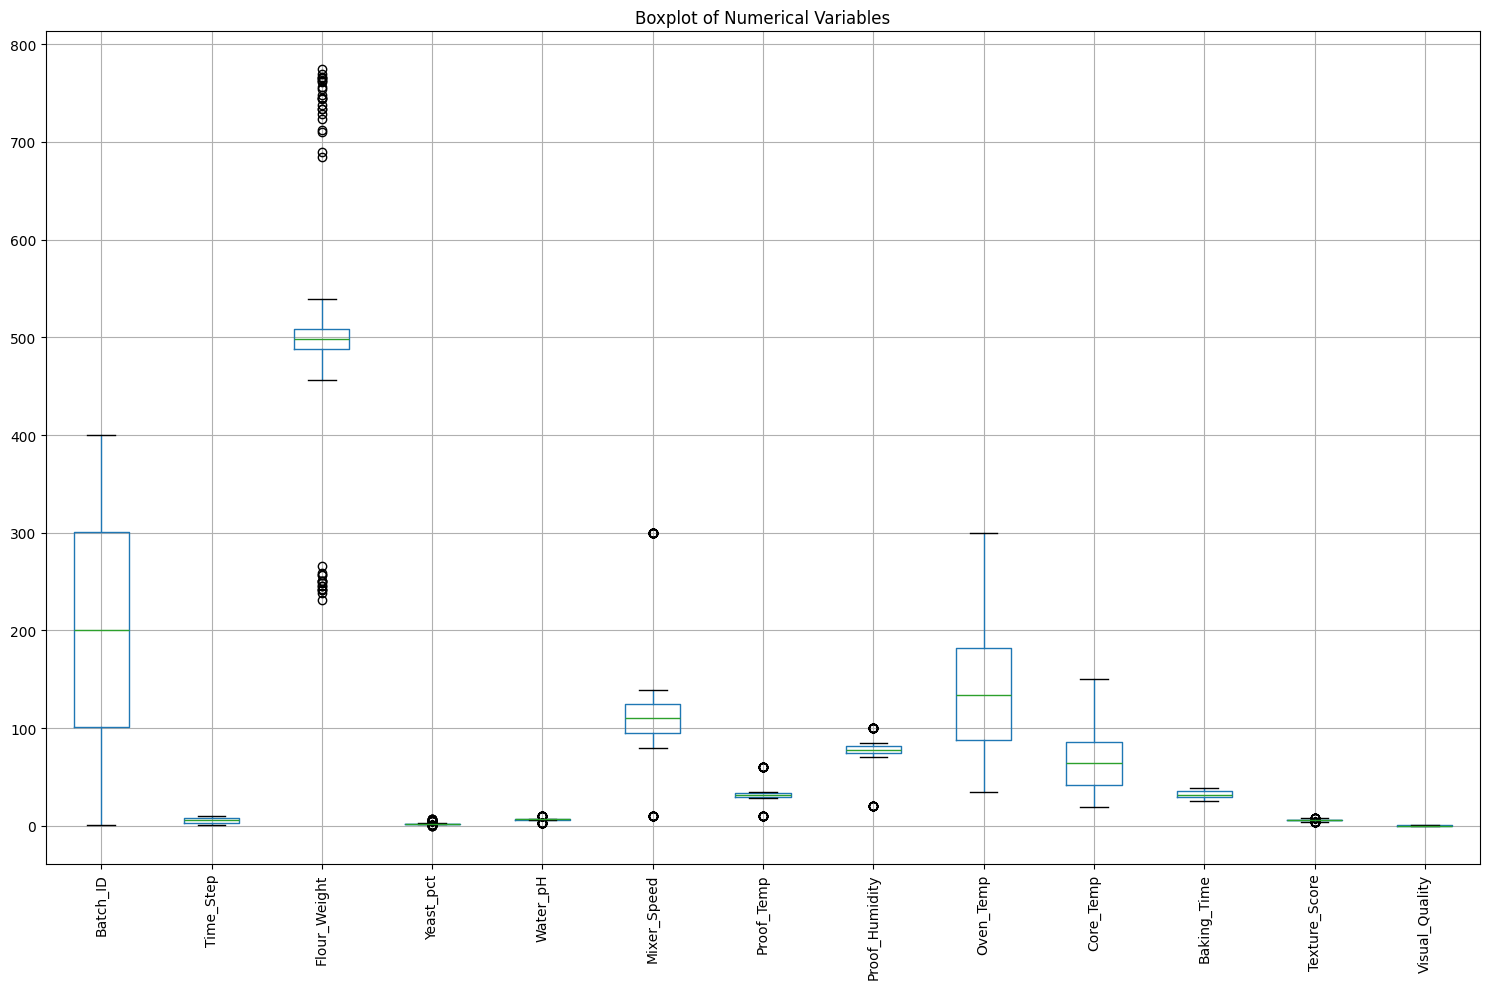

In [20]:
# Apply IQR method for outlier detection and visualize with boxplots
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

outliers_iqr = df[((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

print("\nOutliers detected using IQR method:")
display(outliers_iqr)

# Plot boxplots for each numerical variable to visualize IQR outliers
plt.figure(figsize=(15, 10))
df.select_dtypes(include=np.number).boxplot()
plt.title('Boxplot of Numerical Variables')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

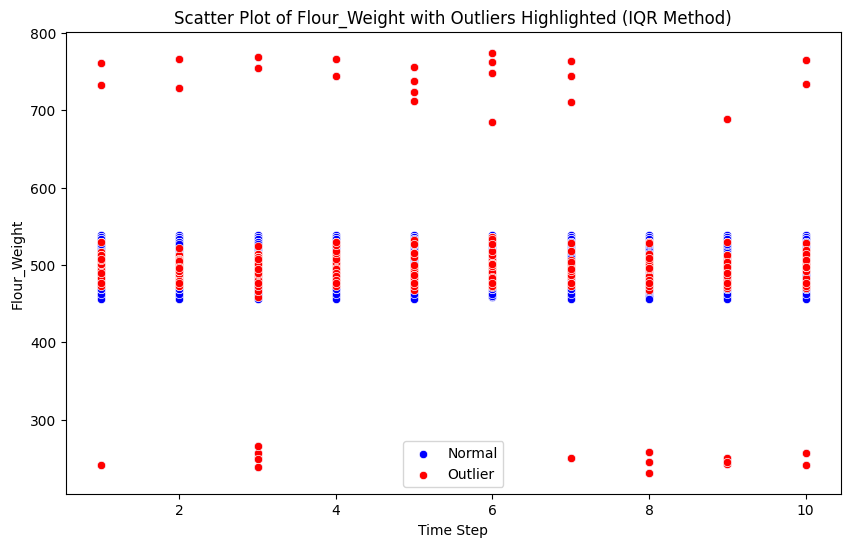

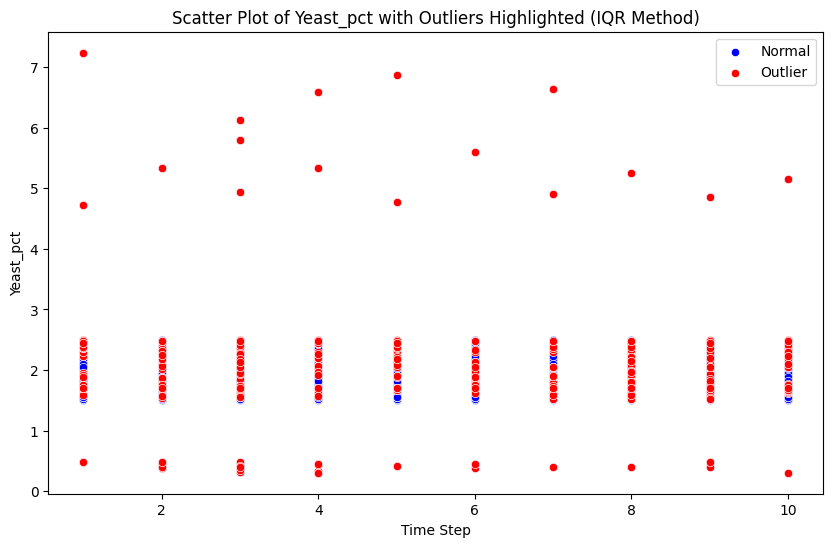

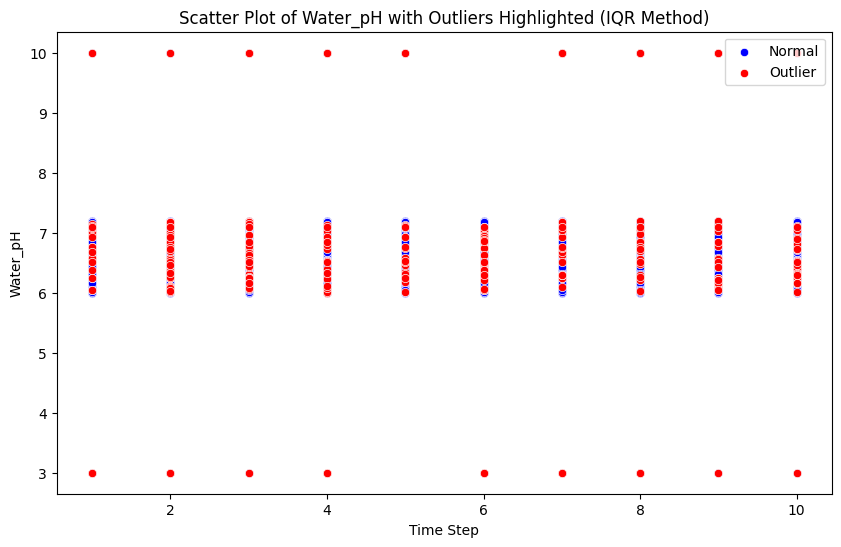

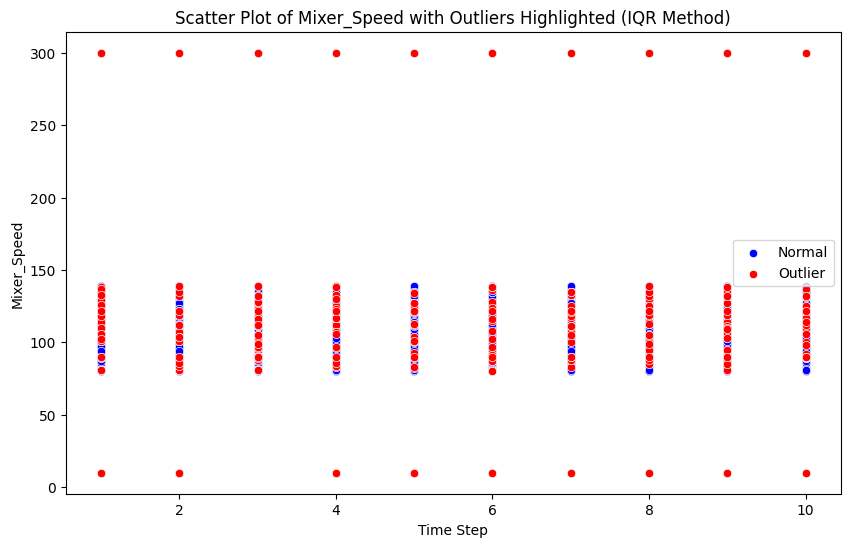

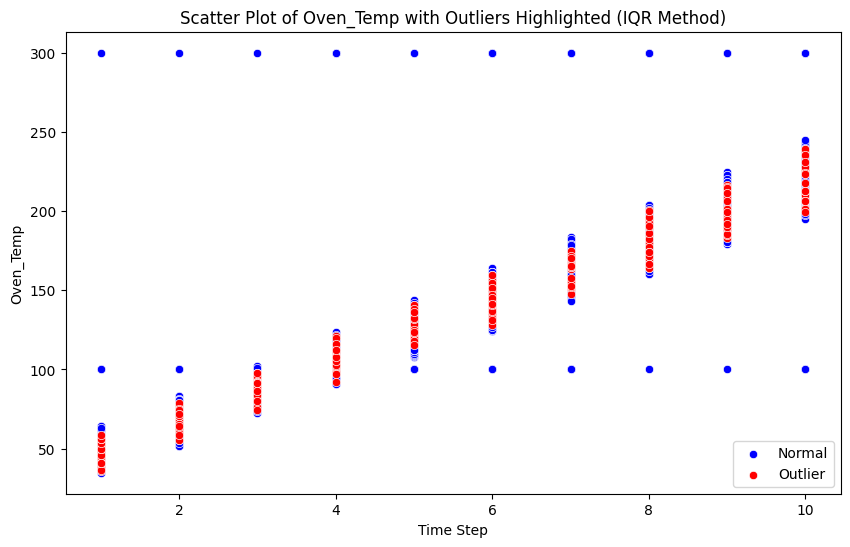

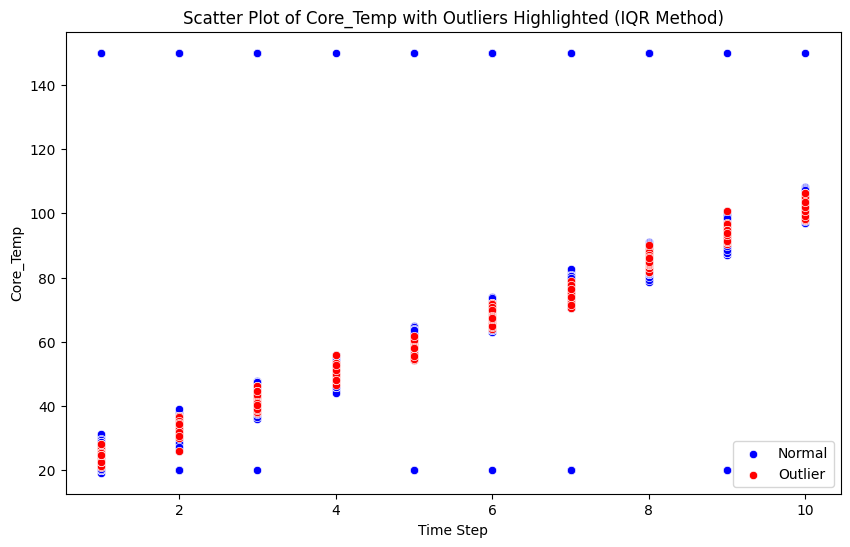

In [21]:
# Visualize outliers with scatter plots (using IQR outliers)
# Select a few key process parameters for visualization
key_parameters = ['Flour_Weight', 'Yeast_pct', 'Water_pH', 'Mixer_Speed', 'Oven_Temp', 'Core_Temp']

for param in key_parameters:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df, x='Time_Step', y=param, color='blue', label='Normal')
    sns.scatterplot(data=outliers_iqr, x='Time_Step', y=param, color='red', label='Outlier')
    plt.title(f'Scatter Plot of {param} with Outliers Highlighted (IQR Method)')
    plt.xlabel('Time Step')
    plt.ylabel(param)
    plt.legend()
    plt.show()

Shape of original data: (4000, 13)
Shape of cleaned data: (3735, 13)

Descriptive statistics of original data:


Batch_ID   Time_Step  Flour_Weight    Yeast_pct     Water_pH  \
count  4000.000000  4000.00000   4000.000000  4000.000000  4000.000000   
mean    200.500000     5.50000    499.209562     2.003265     6.591311   
std     115.484129     2.87264     28.712333     0.401776     0.510535   
min       1.000000     1.00000    231.344074     0.305958     3.000000   
25%     100.750000     3.00000    487.697347     1.721063     6.300653   
50%     200.500000     5.50000    498.468004     1.998896     6.586129   
75%     300.250000     8.00000    508.792487     2.254376     6.917817   
max     400.000000    10.00000    774.432650     7.235320    10.000000   

       Mixer_Speed   Proof_Temp  Proof_Humidity    Oven_Temp    Core_Temp  \
count  4000.000000  4000.000000     4000.000000  4000.000000  4000.000000   
mean    110.348250    31.565930       77.468954   134.860368    64.004790   
std      23.889457     3.052437        5.560535    56.003921    25.699253   
min      10.000000    10.000000       20.000000    34.763658    19.255476   
25%      95.000000    29.740843       74.110205    87.477279    42.007198   
50%     110.000000    31.680688       77.457307   133.398859    64.001105   
75%     125.000000    33.291491       81.238257   181.576867    85.467533   
max     300.000000    60.000000      100.000000   300.000000   150.000000   

       Baking_Time  Texture_Score  Visual_Quality  
count  4000.000000    4000.000000     4000.000000  
mean     32.092500       5.972200        0.485000  
std       4.243636       0.687811        0.499837  
min      25.000000       3.640000        0.000000  
25%      29.000000       5.540000        0.000000  
50%      32.000000       5.980000        0.000000  
75%      36.000000       6.400000        1.000000  
max      39.000000       7.780000        1.000000


Descriptive statistics of cleaned data:


Batch_ID    Time_Step  Flour_Weight    Yeast_pct     Water_pH  \
count  3735.000000  3735.000000   3735.000000  3735.000000  3735.000000   
mean    200.128514     5.512450    498.887970     1.995692     6.597244   
std     114.944627     2.874596     15.680517     0.300442     0.351154   
min       1.000000     1.000000    456.571725     1.512658     6.001444   
25%     101.000000     3.000000    487.989065     1.726033     6.304996   
50%     200.000000     6.000000    498.847019     1.998873     6.587473   
75%     299.000000     8.000000    508.337689     2.248929     6.917817   
max     400.000000    10.000000    538.965570     2.497672     7.198671   

       Mixer_Speed   Proof_Temp  Proof_Humidity    Oven_Temp    Core_Temp  \
count  3735.000000  3735.000000     3735.000000  3735.000000  3735.000000   
mean    109.637483    31.534944       77.547490   135.179014    64.153188   
std      17.408150     2.035993        4.179879    56.127112    25.771587   
min      80.000000    28.010956       70.057454    34.763658    19.255476   
25%      95.000000    29.740843       74.135798    87.670477    42.104868   
50%     110.000000    31.672819       77.457307   133.862544    64.154725   
75%     124.500000    33.273087       81.111529   181.973574    85.640345   
max     139.000000    34.993346       84.914320   300.000000   150.000000   

       Baking_Time  Texture_Score  Visual_Quality  
count  3735.000000    3735.000000     3735.000000  
mean     32.056225       5.975778        0.486212  
std       4.259656       0.665880        0.499877  
min      25.000000       4.420000        0.000000  
25%      29.000000       5.540000        0.000000  
50%      32.000000       5.980000        0.000000  
75%      36.000000       6.400000        1.000000  
max      39.000000       7.660000        1.000000


Histograms of cleaned data:


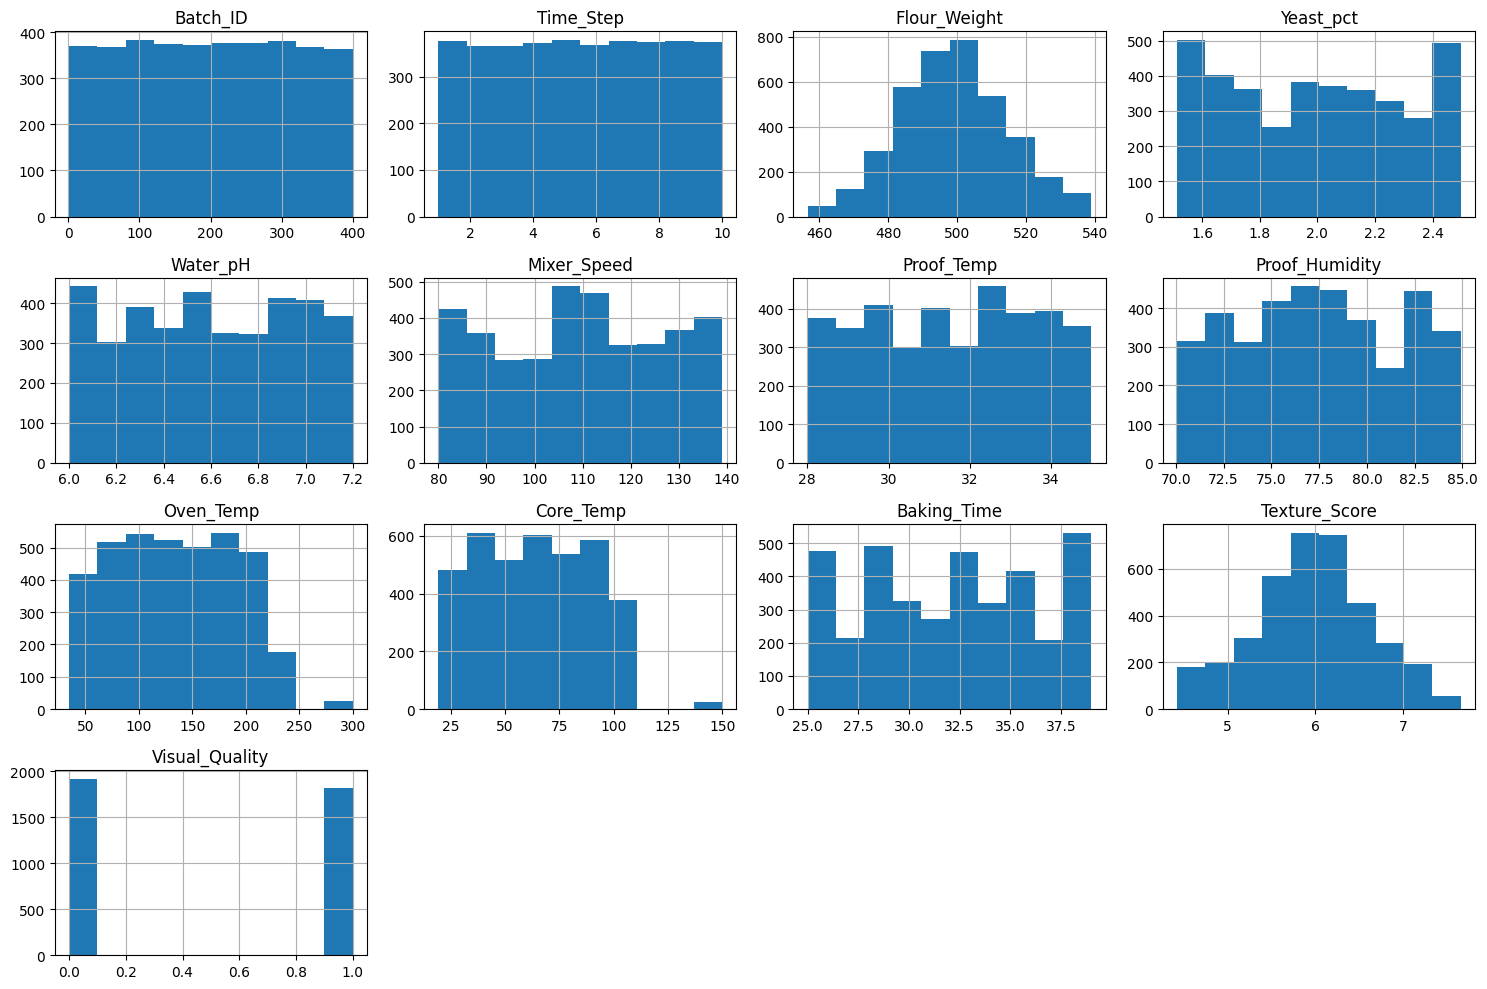

In [22]:
# Create a cleaned dataset by filtering out the IQR outliers
cleaned_df = df.drop(outliers_iqr.index)

print("Shape of original data:", df.shape)
print("Shape of cleaned data:", cleaned_df.shape)

# Compare descriptive statistics before and after filtering
print("\nDescriptive statistics of original data:")
display(df.describe())

print("\nDescriptive statistics of cleaned data:")
display(cleaned_df.describe())

# Compare distributions before and after filtering with histograms
print("\nHistograms of cleaned data:")
cleaned_df.hist(figsize=(15, 10))
plt.tight_layout()
plt.show()

# Task
Explain the error in the selected code, fix it if possible, and incorporate the changes into the existing code. If not, diagnose the error. The code should perform data preparation for an LSTM model, including normalization and reshaping, define the target variable, build an LSTM model using Keras/TensorFlow, train and validate the model, and use it for anomaly/quality prediction based on a defined error threshold. Use the data from "FnB_LSTM_Dataset_with_Anomalies.xlsx".

## Data preparation for lstm

### Subtask:
Normalize the data using MinMaxScaler and reshape it to (batches, timesteps, features). Define the target variable (Texture_Score for regression or Visual_Quality for classification).


**Reasoning**:
Select the features and target variable, then normalize and reshape the data for LSTM input.



In [35]:
from sklearn.preprocessing import MinMaxScaler

# Filter batches with exactly 10 time steps
batch_counts = cleaned_df['Batch_ID'].value_counts()
time_steps = 10 # Define time_steps here as well for clarity
complete_batches = batch_counts[batch_counts == time_steps].index
filtered_df = cleaned_df[cleaned_df['Batch_ID'].isin(complete_batches)].copy()

# Select features for the LSTM model from the filtered data
feature_cols = filtered_df.columns.tolist()
cols_to_exclude = ['Batch_ID', 'Time_Step', 'Texture_Score', 'Visual_Quality']
features = [col for col in feature_cols if col not in cols_to_exclude]
X = filtered_df[features]

# Define the target variable
y = filtered_df['Texture_Score']

# Normalize the features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Reshape the data for LSTM
# time_steps is already defined
n_batches = X_scaled.shape[0] // time_steps
n_features = X_scaled.shape[1]

X_reshaped = X_scaled.reshape((n_batches, time_steps, n_features))

# Reshape the target variable
y_reshaped = y.values.reshape((n_batches, time_steps, 1))

print("Original feature shape:", X.shape)
print("Scaled feature shape:", X_scaled.shape)
print("Reshaped feature shape:", X_reshaped.shape)
print("Original target shape:", y.shape)
print("Reshaped target shape:", y_reshaped.shape)

Original feature shape: (2100, 9)
Scaled feature shape: (2100, 9)
Reshaped feature shape: (210, 10, 9)
Original target shape: (2100,)
Reshaped target shape: (210, 10, 1)


**Reasoning**:
The error indicates that the number of elements in `X_scaled` is not divisible by `time_steps * n_features`, which is required for reshaping. This is because dropping outliers using `dropna(how='all')` resulted in some batches having fewer than 10 time steps. To fix this, we will group the data by 'Batch_ID' and keep only batches that have exactly 10 time steps before normalizing and reshaping.



In [24]:
# Filter batches with exactly 10 time steps
batch_counts = cleaned_df['Batch_ID'].value_counts()
complete_batches = batch_counts[batch_counts == time_steps].index
filtered_df = cleaned_df[cleaned_df['Batch_ID'].isin(complete_batches)].copy()

# Select features for the LSTM model from the filtered data
feature_cols = filtered_df.columns.tolist()
cols_to_exclude = ['Batch_ID', 'Time_Step', 'Texture_Score', 'Visual_Quality']
features = [col for col in feature_cols if col not in cols_to_exclude]
X = filtered_df[features]

# Define the target variable
y = filtered_df['Texture_Score']

# Normalize the features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Reshape the data for LSTM
n_batches = X_scaled.shape[0] // time_steps
n_features = X_scaled.shape[1]

X_reshaped = X_scaled.reshape((n_batches, time_steps, n_features))

# Reshape the target variable
y_reshaped = y.values.reshape((n_batches, time_steps, 1))

print("Original feature shape:", X.shape)
print("Scaled feature shape:", X_scaled.shape)
print("Reshaped feature shape:", X_reshaped.shape)
print("Original target shape:", y.shape)
print("Reshaped target shape:", y_reshaped.shape)

Original feature shape: (2100, 9)
Scaled feature shape: (2100, 9)
Reshaped feature shape: (210, 10, 9)
Original target shape: (2100,)
Reshaped target shape: (210, 10, 1)


## Model building

### Subtask:
Define the LSTM model architecture using Keras/TensorFlow.


**Reasoning**:
Import necessary layers from TensorFlow/Keras and define the LSTM model architecture.



In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Define the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(time_steps, n_features)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Print the model summary
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 10, 50)         │        12,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 10, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 32,251 (125.98 KB)

 Trainable params: 32,251 (125.98 KB)

 Non-trainable params: 0 (0.00 B)

## Training & validation

### Subtask:
Split the data into training and testing sets, train the LSTM model, and evaluate its performance using appropriate metrics (R², RMSE for regression; Accuracy, F1 for classification).


**Reasoning**:
Split the data into training and testing sets, train the LSTM model, and evaluate its performance.



**Reasoning**:
The error message "Found input variables with inconsistent numbers of samples: [420, 42]" indicates that `y_test_flat` and `y_pred_flat` have different sample counts, despite both being reshaped to (-1, 1). This confirms that the model's prediction `y_pred` has a shape of (42, 1), where 42 is the number of batches in the test set. However, `y_test` still has the shape (42, 10, 1), representing 42 batches with 10 time steps and 1 feature. Flattening `y_test` to (-1, 1) results in 42 * 10 = 420 samples. The issue is that the model predicts one value per batch, while `y_test` has one value per time step within each batch. To resolve this, we need to either modify the model to predict for each time step or aggregate the `y_test` values per batch to match the prediction output. Given the current model architecture with `return_sequences=False` in the last LSTM layer, it outputs a single prediction per batch. Therefore, the correct approach is to flatten `y_test` to have one value per batch before calculating the metrics. The target variable was defined as `y = filtered_df['Texture_Score']`, which is a single value per row (time step). To get one value per batch, we need to consider how the target variable should be represented for a batch prediction. A common approach is to use the value at the last time step of each batch as the target for that batch. We can extract this from `y_reshaped`.



In [43]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np
import tensorflow as tf

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_reshaped, y_reshaped, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

# Train the LSTM model
epochs = 100
batch_size = 32

history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2)

# Note: The model with return_sequences=False predicts one value per batch.
# We should compare this prediction with the target value for each batch.
# We'll use the last time step's value as the target for each batch in y_test.
y_test_batch_target = y_test[:, -1, :] # Select the last time step for each batch

# Ensure y_test_batch_target has the shape (batches, 1) for metric calculation
y_test_batch_target = y_test_batch_target.reshape(-1, 1)


# Make predictions on the testing data
y_pred = model.predict(X_test)

# y_pred shape is (batches, 1)
# y_test_batch_target shape is (batches, 1)

# Calculate R² and RMSE
r2 = r2_score(y_test_batch_target, y_pred)
rmse = np.sqrt(mean_squared_error(y_test_batch_target, y_pred))

print("R² Score:", r2)
print("RMSE:", rmse)

Shape of X_train: (168, 10, 9)
Shape of X_test: (42, 10, 9)
Shape of y_train: (168, 10, 1)
Shape of y_test: (42, 10, 1)
Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.2557 - val_loss: 0.5078
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.2575 - val_loss: 0.4961
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.2283 - val_loss: 0.5072
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.2115 - val_loss: 0.5119
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.2708 - val_loss: 0.5241
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2033 - val_loss: 0.5252
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.3167 - val_loss: 0.5388
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.2350 - val_loss: 0.5708
Epoch 9/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.2834 - val_loss: 0.5664
Epoch 10/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.2072 - val_loss: 0.5428
Epoch 11/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0

**Reasoning**:
The error `ValueError: Cannot take the length of shape with unknown rank` in `model.evaluate` suggests an issue with the shape of the target data (`y_test_batch_target`) provided to the evaluation function. While we correctly extracted the last time step, the resulting shape `(42, 1)` might not be compatible with the expected input shape for `model.evaluate`. The `evaluate` function typically expects the target data to have a shape consistent with the model's output for a given batch. Since the model outputs `(batch_size, 1)`, the target data for evaluation should also be `(batch_size, 1)`. Let's explicitly ensure `y_test_batch_target` has the shape `(42, 1)`.



**Reasoning**:
The `ValueError: Cannot take the length of shape with unknown rank` still persists in `model.evaluate`. This error often happens when the input data has an undefined or inconsistent shape during the computation graph construction in TensorFlow/Keras. Although we reshaped `y_test_batch_target` to `(-1, 1)`, there might be an issue with how `evaluate` handles this reshaped numpy array in conjunction with the model's expected input. A potential solution is to explicitly convert the numpy arrays to TensorFlow tensors before passing them to `model.evaluate`. This can sometimes help in resolving shape-related issues within the TensorFlow graph.



In [42]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np
import tensorflow as tf

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_reshaped, y_reshaped, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

# Train the LSTM model
epochs = 100
batch_size = 32

history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2)

# Evaluate the model on the testing data
# Note: The model with return_sequences=False predicts one value per batch.
# We should compare this prediction with the target value for each batch.
# We'll use the last time step's value as the target for each batch in y_test.
y_test_batch_target = y_test[:, -1, :] # Select the last time step for each batch

# Ensure y_test_batch_target has the shape (batches, 1) for metric calculation
y_test_batch_target = y_test_batch_target.reshape(-1, 1)


# Make predictions on the testing data
y_pred = model.predict(X_test)

# y_pred shape is (batches, 1)
# y_test_batch_target shape is (batches, 1)

# Calculate R² and RMSE
r2 = r2_score(y_test_batch_target, y_pred)
rmse = np.sqrt(mean_squared_error(y_test_batch_target, y_pred))

print("R² Score:", r2)
print("RMSE:", rmse)

Shape of X_train: (168, 10, 9)
Shape of X_test: (42, 10, 9)
Shape of y_train: (168, 10, 1)
Shape of y_test: (42, 10, 1)
Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.3339 - val_loss: 0.4287
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.2563 - val_loss: 0.4492
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.2917 - val_loss: 0.4827
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.3618 - val_loss: 0.4714
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.3141 - val_loss: 0.4650
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.2658 - val_loss: 0.5123
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.3378 - val_loss: 0.4754
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.2336 - val_loss: 0.4484
Epoch 9/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.3140 - val_loss: 0.4718
Epoch 10/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.3228 - val_loss: 0.4879
Epoch 11/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0

In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Define the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(time_steps, n_features)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Print the model summary
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 10, 50)         │        12,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 10, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 32,251 (125.98 KB)

 Trainable params: 32,251 (125.98 KB)

 Non-trainable params: 0 (0.00 B)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


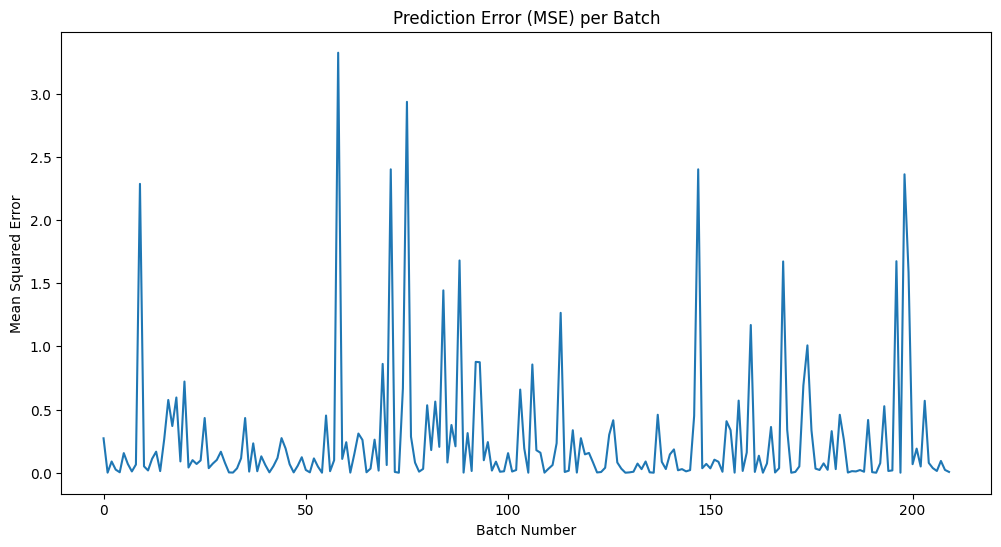


Batches identified as anomalous based on prediction error threshold:
[ 23 110 133 141 160 165 284 319 377 380 381]


In [44]:
# Make predictions on the entire dataset
y_pred_full = model.predict(X_reshaped)

# Use the last time step of the original y_reshaped as the actual target
y_true_full = y_reshaped[:, -1, :]
y_true_full = y_true_full.reshape(-1, 1)

# Calculate the prediction error (Mean Squared Error per batch)
mse_per_batch = np.mean(np.square(y_true_full - y_pred_full), axis=1)

# Visualize the prediction errors
plt.figure(figsize=(12, 6))
plt.plot(mse_per_batch)
plt.title('Prediction Error (MSE) per Batch')
plt.xlabel('Batch Number')
plt.ylabel('Mean Squared Error')
plt.show()

# Determine a threshold for anomaly detection (e.g., based on a percentile or visual inspection of the plot)
# For now, let's set a placeholder threshold and we can adjust it after viewing the plot
threshold = np.percentile(mse_per_batch, 95) # Example: 95th percentile

# Identify batches with prediction error above the threshold as anomalies
anomalous_batches_indices = np.where(mse_per_batch > threshold)[0]
anomalous_batches = filtered_df['Batch_ID'].unique()[anomalous_batches_indices]


print("\nBatches identified as anomalous based on prediction error threshold:")
print(anomalous_batches)

# Optional: You can further analyze the anomalous batches
# For example, filter the original data for these batch IDs
# anomalous_data = df[df['Batch_ID'].isin(anomalous_batches)]
# display(anomalous_data)

Descriptive statistics:


Batch_ID   Time_Step  Flour_Weight    Yeast_pct     Water_pH  \
count  4000.000000  4000.00000   4000.000000  4000.000000  4000.000000   
mean    200.500000     5.50000    499.209562     2.003265     6.591311   
std     115.484129     2.87264     28.712333     0.401776     0.510535   
min       1.000000     1.00000    231.344074     0.305958     3.000000   
25%     100.750000     3.00000    487.697347     1.721063     6.300653   
50%     200.500000     5.50000    498.468004     1.998896     6.586129   
75%     300.250000     8.00000    508.792487     2.254376     6.917817   
max     400.000000    10.00000    774.432650     7.235320    10.000000   

       Mixer_Speed   Proof_Temp  Proof_Humidity    Oven_Temp    Core_Temp  \
count  4000.000000  4000.000000     4000.000000  4000.000000  4000.000000   
mean    110.348250    31.565930       77.468954   134.860368    64.004790   
std      23.889457     3.052437        5.560535    56.003921    25.699253   
min      10.000000    10.000000       20.000000    34.763658    19.255476   
25%      95.000000    29.740843       74.110205    87.477279    42.007198   
50%     110.000000    31.680688       77.457307   133.398859    64.001105   
75%     125.000000    33.291491       81.238257   181.576867    85.467533   
max     300.000000    60.000000      100.000000   300.000000   150.000000   

       Baking_Time  Texture_Score  Visual_Quality  
count  4000.000000    4000.000000     4000.000000  
mean     32.092500       5.972200        0.485000  
std       4.243636       0.687811        0.499837  
min      25.000000       3.640000        0.000000  
25%      29.000000       5.540000        0.000000  
50%      32.000000       5.980000        0.000000  
75%      36.000000       6.400000        1.000000  
max      39.000000       7.780000        1.000000

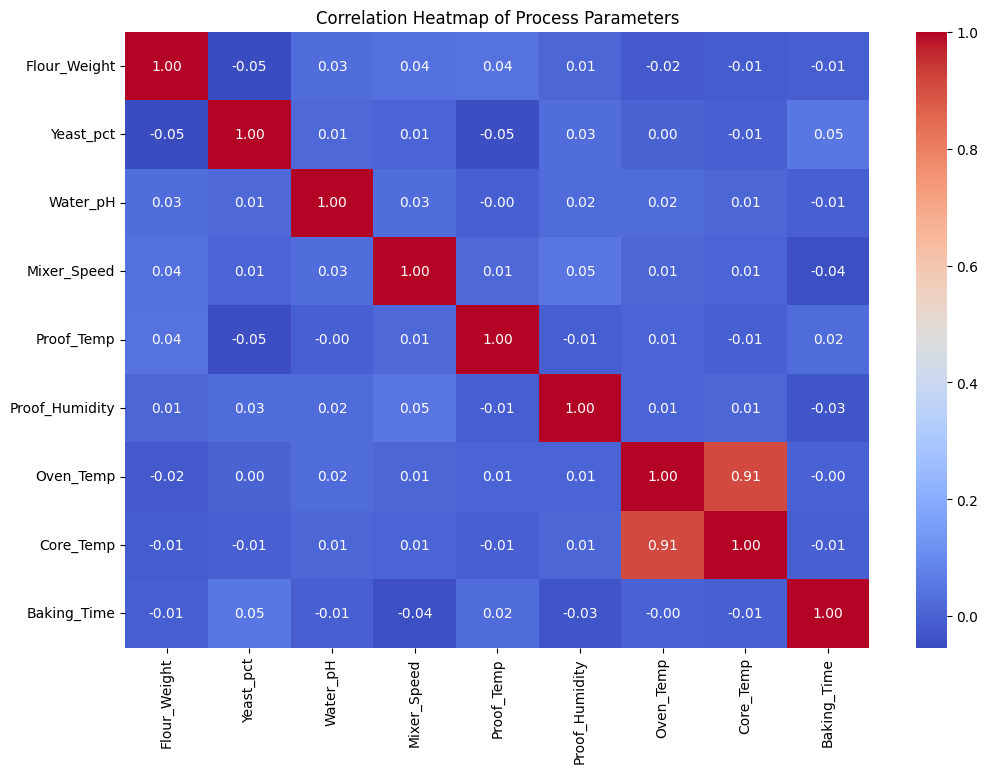


Histograms of original data:


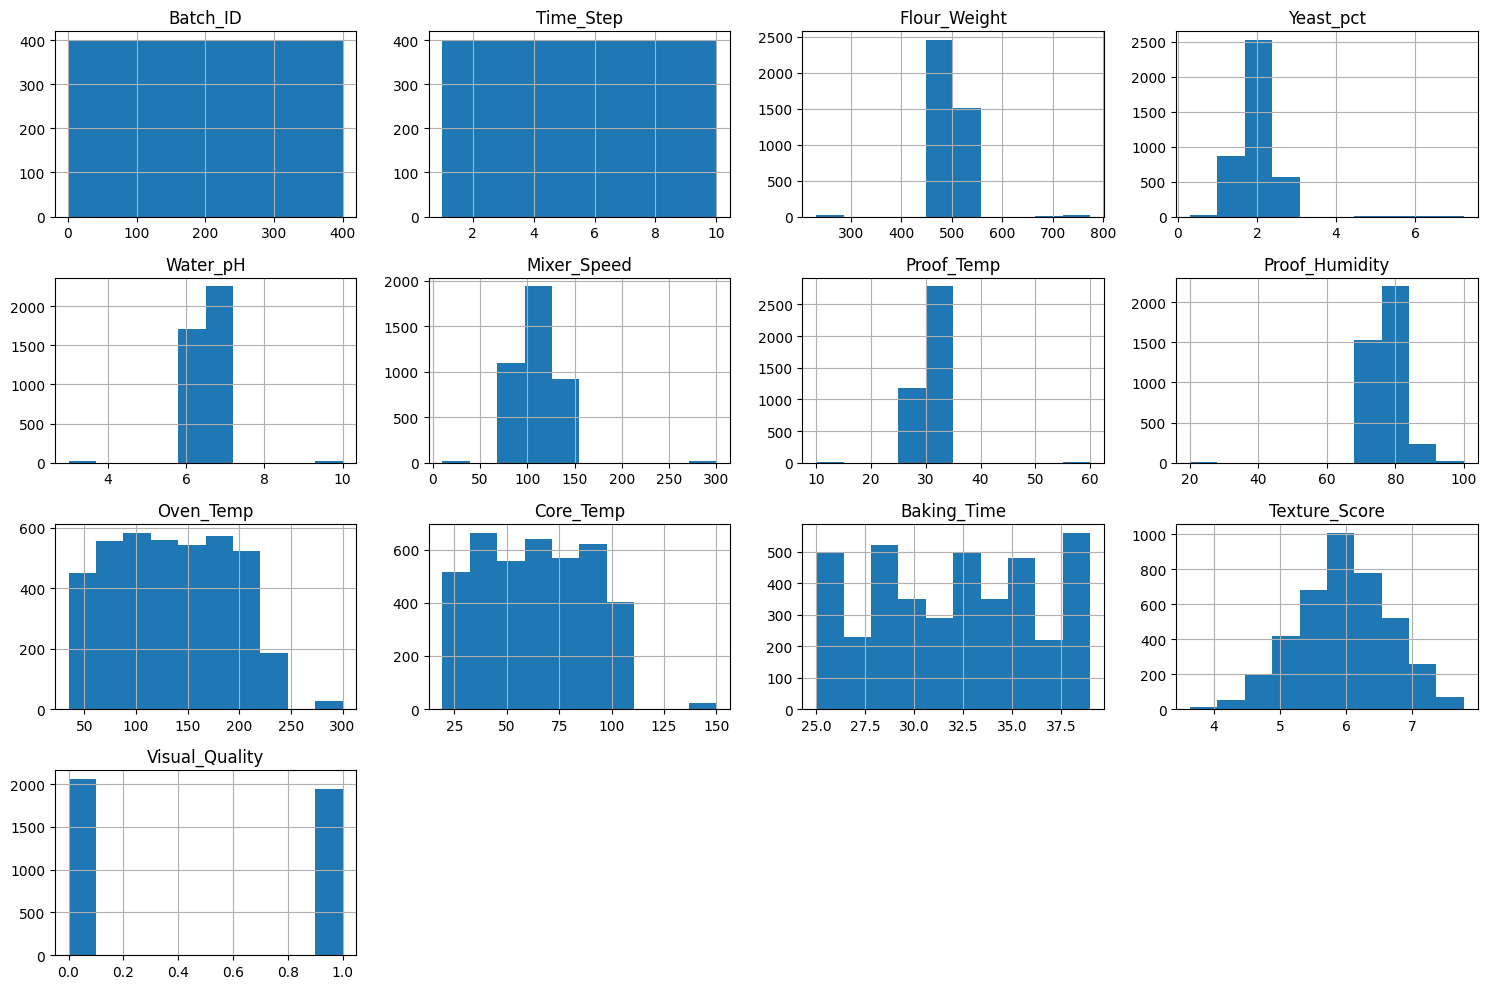


Outliers detected using IQR method:


Batch_ID  Time_Step  Flour_Weight  Yeast_pct  Water_pH  Mixer_Speed  \
9            1         10    507.450712   2.231994  6.718390          300   
10           2          1    516.953423   1.673365  3.000000          129   
20           3          1    483.404975   2.229606  6.765069          106   
48           5          9    529.475521   2.092697  6.097024          135   
52           6          3    250.097754   1.760829  7.195504           91   
...        ...        ...           ...        ...       ...          ...   
3939       394         10    476.739549   1.701078  7.088696          122   
3943       395          4    529.222524   0.309585  6.851875          106   
3958       396          9    489.430351   2.448797  6.428589          109   
3974       398          5    526.856953   2.452237  6.531085          113   
3984       399          5    487.008669   0.409735  6.239505          101   

      Proof_Temp  Proof_Humidity   Oven_Temp   Core_Temp  Baking_Time  \
9      31.120829       71.499624  237.715862  103.558385           35   
10     32.637656       74.675666   50.119357   25.268858           30   
20     10.000000       75.743903   49.411380   21.024862           39   
48     60.000000       80.923245  212.205689   92.459415           32   
52     31.908054       83.239545   90.748455   43.424218           31   
...          ...             ...         ...         ...          ...   
3939   32.705578       84.265494  206.132664  103.468839           36   
3943   28.974376       78.703284  111.988043   52.675318           28   
3958   29.671102      100.000000  191.967460   93.893929           31   
3974   10.000000       74.138838  136.574335   54.554015           37   
3984   33.930466       77.379106  123.656136   55.692845           38   

      Texture_Score  Visual_Quality  
9              5.45               0  
10             5.41               0  
20             5.16               0  
48             5.74               0  
52             6.95               1  
...             ...             ...  
3939           3.64               0  
3943           5.38               0  
3958           4.87               0  
3974           5.58               0  
3984           5.03               0  

[265 rows x 13 columns]

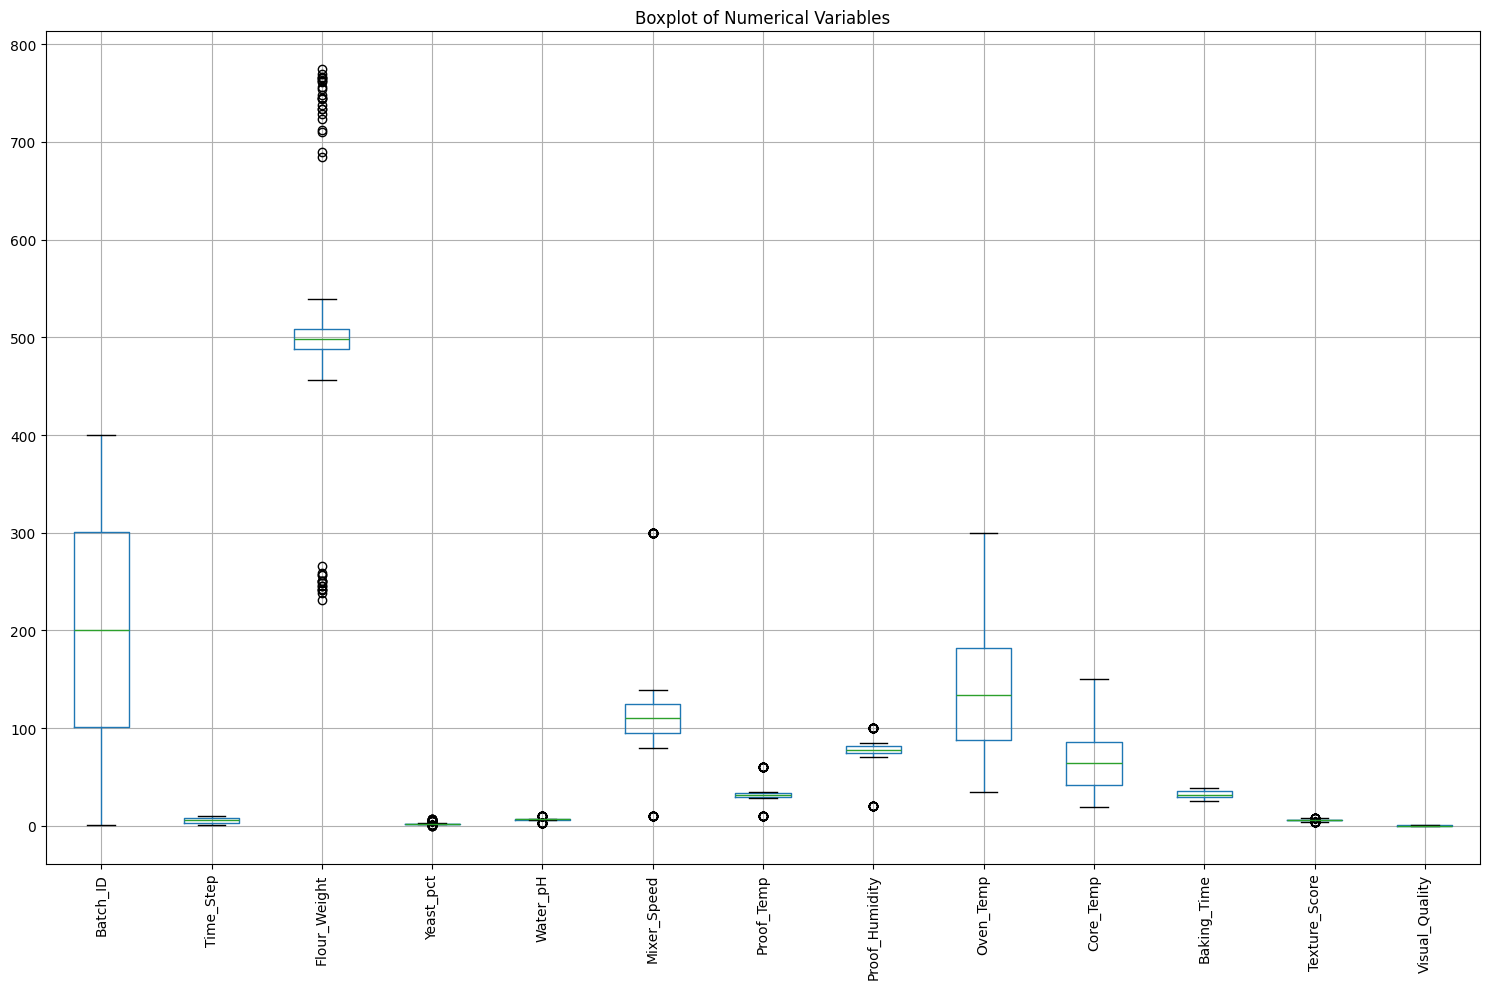

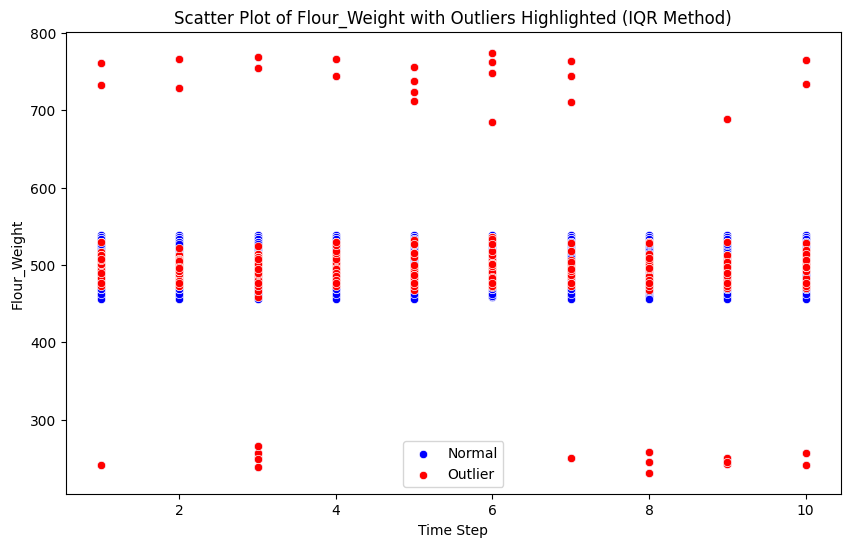

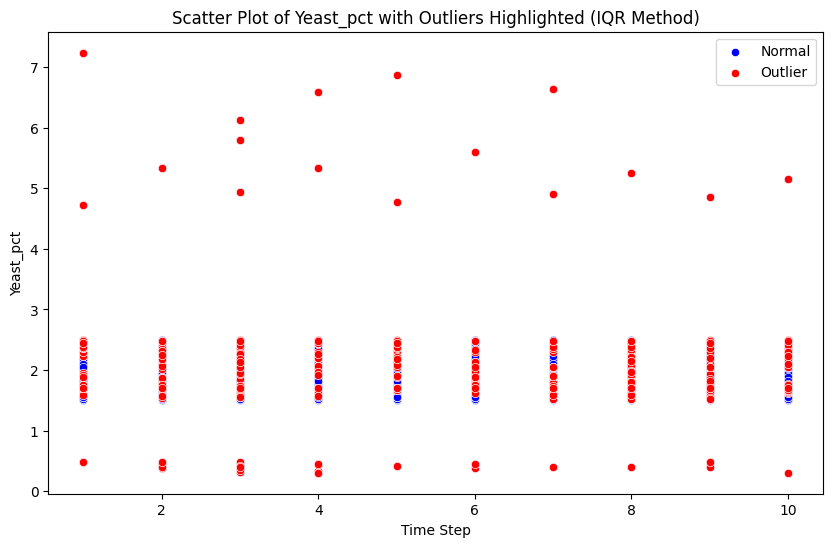

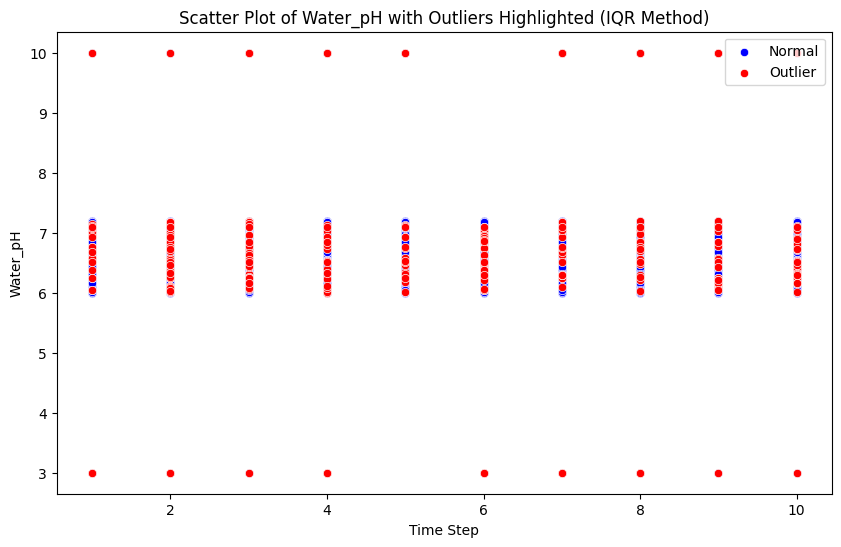

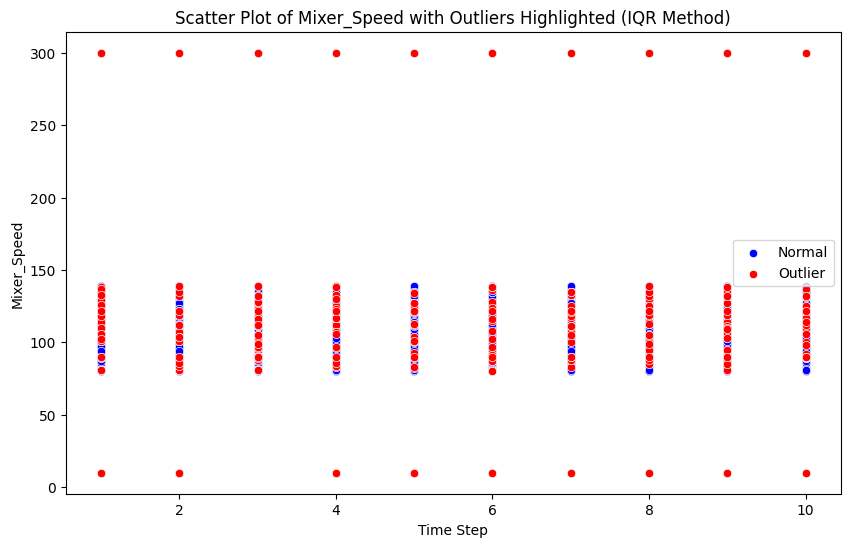

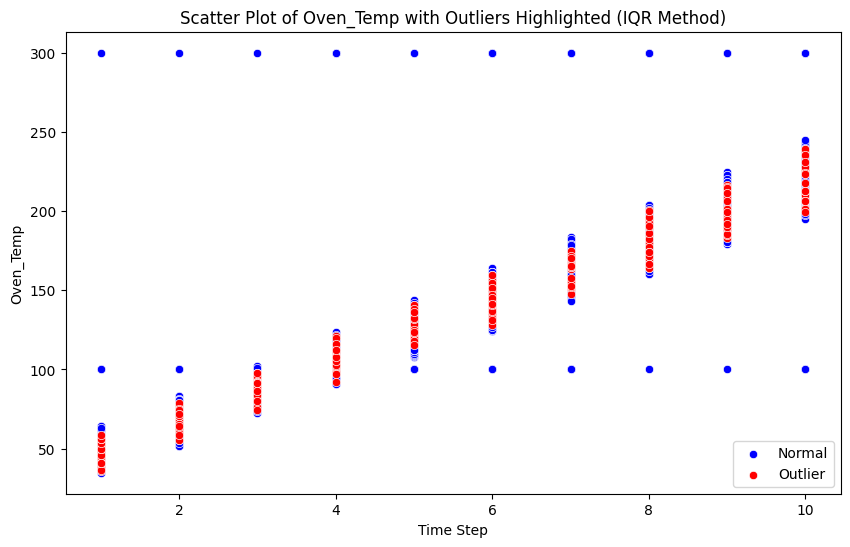

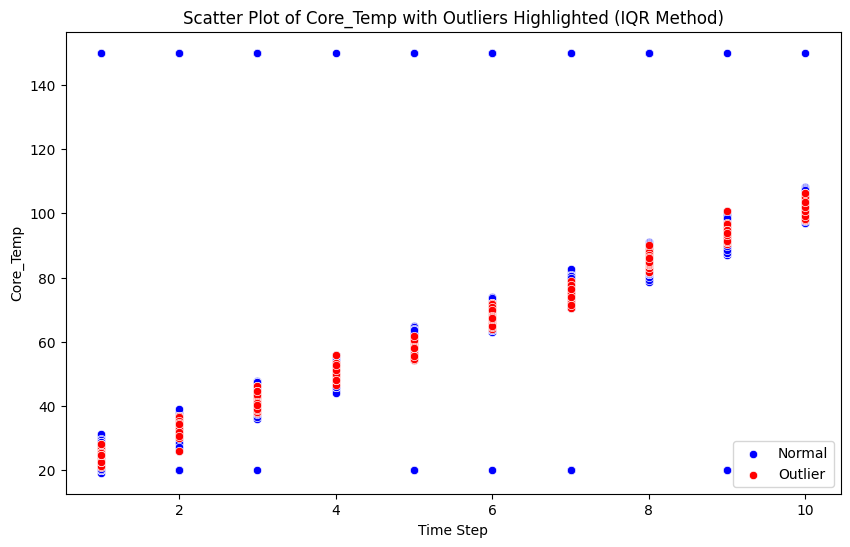


Shape of original data: (4000, 13)
Shape of cleaned data: (3735, 13)

Descriptive statistics of cleaned data:


Batch_ID    Time_Step  Flour_Weight    Yeast_pct     Water_pH  \
count  3735.000000  3735.000000   3735.000000  3735.000000  3735.000000   
mean    200.128514     5.512450    498.887970     1.995692     6.597244   
std     114.944627     2.874596     15.680517     0.300442     0.351154   
min       1.000000     1.000000    456.571725     1.512658     6.001444   
25%     101.000000     3.000000    487.989065     1.726033     6.304996   
50%     200.000000     6.000000    498.847019     1.998873     6.587473   
75%     299.000000     8.000000    508.337689     2.248929     6.917817   
max     400.000000    10.000000    538.965570     2.497672     7.198671   

       Mixer_Speed   Proof_Temp  Proof_Humidity    Oven_Temp    Core_Temp  \
count  3735.000000  3735.000000     3735.000000  3735.000000  3735.000000   
mean    109.637483    31.534944       77.547490   135.179014    64.153188   
std      17.408150     2.035993        4.179879    56.127112    25.771587   
min      80.000000    28.010956       70.057454    34.763658    19.255476   
25%      95.000000    29.740843       74.135798    87.670477    42.104868   
50%     110.000000    31.672819       77.457307   133.862544    64.154725   
75%     124.500000    33.273087       81.111529   181.973574    85.640345   
max     139.000000    34.993346       84.914320   300.000000   150.000000   

       Baking_Time  Texture_Score  Visual_Quality  
count  3735.000000    3735.000000     3735.000000  
mean     32.056225       5.975778        0.486212  
std       4.259656       0.665880        0.499877  
min      25.000000       4.420000        0.000000  
25%      29.000000       5.540000        0.000000  
50%      32.000000       5.980000        0.000000  
75%      36.000000       6.400000        1.000000  
max      39.000000       7.660000        1.000000


Histograms of cleaned data:


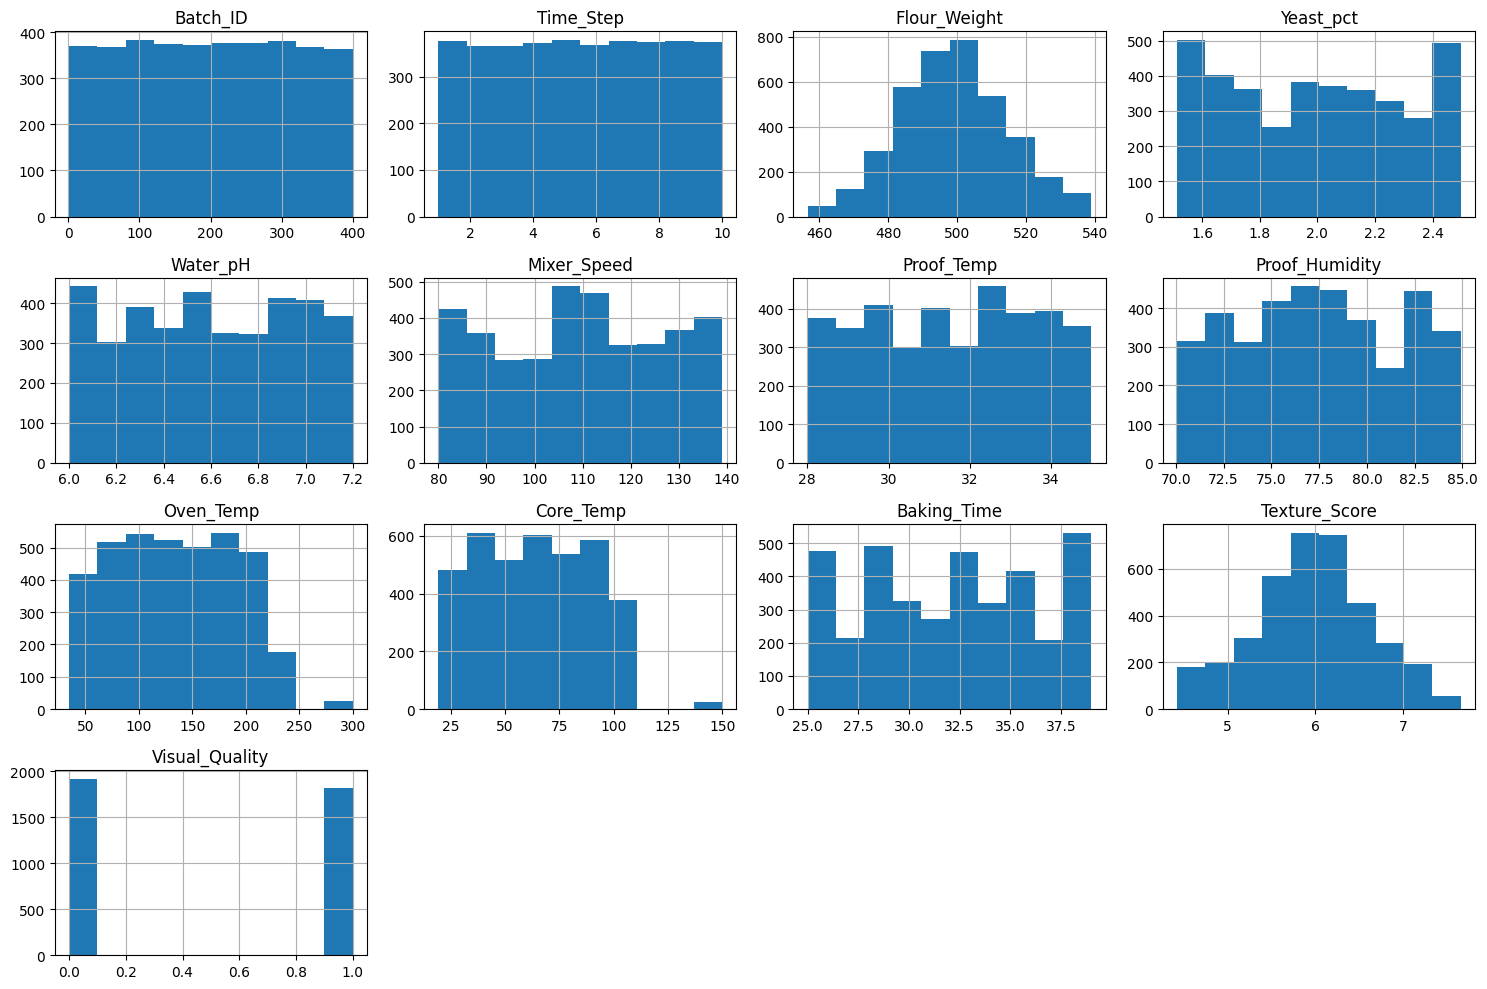


Original feature shape: (2100, 9)
Scaled feature shape: (2100, 9)
Reshaped feature shape: (210, 10, 9)
Original target shape: (2100,)

Model Summary:


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_39 (LSTM)                  │ (None, 10, 64)         │        18,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_39 (Dropout)            │ (None, 10, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_40 (LSTM)                  │ (None, 10, 64)         │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_40 (Dropout)            │ (None, 10, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_41 (LSTM)                  │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_41 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 64,417 (251.63 KB)

 Trainable params: 64,417 (251.63 KB)

 Non-trainable params: 0 (0.00 B)


Shape of X_train_tensor: (168, 10, 9)
Shape of X_test_tensor: (42, 10, 9)
Shape of y_train_seq_to_one_tensor: (168, 1)
Shape of y_test_seq_to_one_tensor: (42, 1)
Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 6s 181ms/step - loss: 37.5601 - val_loss: 31.9395
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - loss: 30.9904 - val_loss: 23.7888
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - loss: 21.6268 - val_loss: 10.0097
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 8.3442 - val_loss: 1.9567
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 1.9977 - val_loss: 0.4225
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.6900 - val_loss: 0.5305
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 1.1481 - val_loss: 0.6506
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 1.0521 - val_loss: 0.6005
Epoch 9/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 1.0048 - val_loss: 0.4919
Epoch 10/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.9296 - val_lo

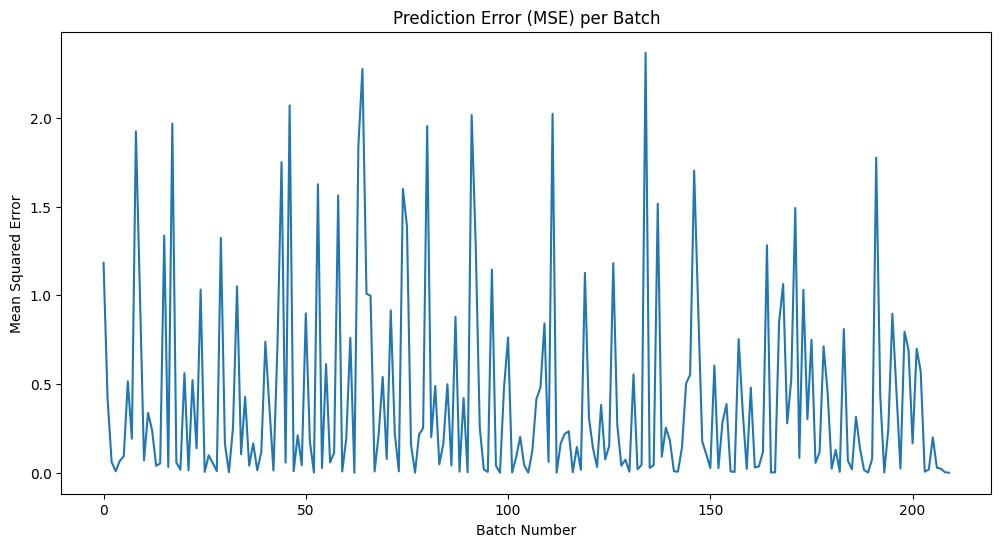


Batches identified as anomalous based on prediction error threshold:
[ 21  38  86  91 120 121 152 172 214 262 370]


In [68]:
# Load Dataset: Use pandas to read the Excel file.
import pandas as pd

# Load the dataset from the Excel file
excel_file_path = 'FnB_LSTM_Dataset_with_Anomalies.xlsx'
df = pd.read_excel(excel_file_path)

# Statistical Analysis (Quality of Data):
# Descriptive stats: mean, median, std.
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

print("Descriptive statistics:")
display(df.describe())

# Correlation heatmap of process parameters.
# Exclude 'Batch_ID' and 'Time_Step' as they are identifiers, and target variables
numerical_cols = df.select_dtypes(include=['number']).columns.tolist()
cols_to_exclude = ['Batch_ID', 'Time_Step', 'Texture_Score', 'Visual_Quality']
correlation_cols = [col for col in numerical_cols if col not in cols_to_exclude]

correlation_matrix = df[correlation_cols].corr()

# Plot the correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Process Parameters')
plt.show()

# Histograms of each variable.
print("\nHistograms of original data:")
df.hist(figsize=(15, 10))
plt.tight_layout()
plt.show()

# Outlier Detection:
# Apply IQR method (mark points outside Q1 – 1.5×IQR and Q3 + 1.5×IQR).
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - IQR

outliers_iqr = df[((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

print("\nOutliers detected using IQR method:")
display(outliers_iqr)

# Visualize with boxplots and scatter plots.
# Plot boxplots for each numerical variable to visualize IQR outliers
plt.figure(figsize=(15, 10))
df.select_dtypes(include=np.number).boxplot()
plt.title('Boxplot of Numerical Variables')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Visualize outliers with scatter plots (using IQR outliers)
# Select a few key process parameters for visualization
key_parameters = ['Flour_Weight', 'Yeast_pct', 'Water_pH', 'Mixer_Speed', 'Oven_Temp', 'Core_Temp']

for param in key_parameters:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df, x='Time_Step', y=param, color='blue', label='Normal')
    sns.scatterplot(data=outliers_iqr, x='Time_Step', y=param, color='red', label='Outlier')
    plt.title(f'Scatter Plot of {param} with Outliers Highlighted (IQR Method)')
    plt.xlabel('Time Step')
    plt.ylabel(param)
    plt.legend()
    plt.show()

# Filter Anomalies:
# Create a cleaned dataset by filtering out the IQR outliers
cleaned_df = df.drop(outliers_iqr.index)

print("\nShape of original data:", df.shape)
print("Shape of cleaned data:", cleaned_df.shape)

# Compare distributions before vs after filtering.
print("\nDescriptive statistics of cleaned data:")
display(cleaned_df.describe())

print("\nHistograms of cleaned data:")
cleaned_df.hist(figsize=(15, 10))
plt.tight_layout()
plt.show()

# Data Preparation for LSTM:
# Normalize data using MinMaxScaler.
# Reshape dataset to (batches, timesteps, features)
# Define target variable: Texture_Score (regression).

# Filter batches with exactly 10 time steps
time_steps = 10
batch_counts = cleaned_df['Batch_ID'].value_counts()
complete_batches = batch_counts[batch_counts == time_steps].index
filtered_df = cleaned_df[cleaned_df['Batch_ID'].isin(complete_batches)].copy()

# Select features for the LSTM model from the filtered data
feature_cols = filtered_df.columns.tolist()
cols_to_exclude = ['Batch_ID', 'Time_Step', 'Texture_Score', 'Visual_Quality']
features = [col for col in feature_cols if col not in cols_to_exclude]
X = filtered_df[features]

# Define the target variable
y = filtered_df['Texture_Score']

# Normalize the features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Reshape the data for LSTM
n_batches = X_scaled.shape[0] // time_steps
n_features = X_scaled.shape[1]

X_reshaped = X_scaled.reshape((n_batches, time_steps, n_features))

# Reshape the target variable - This will be done after splitting for sequence-to-one prediction
# y_reshaped = y.values.reshape((n_batches, time_steps, 1))


print("\nOriginal feature shape:", X.shape)
print("Scaled feature shape:", X_scaled.shape)
print("Reshaped feature shape:", X_reshaped.shape)
print("Original target shape:", y.shape)
# print("Reshaped target shape:", y_reshaped.shape) # Removed as y_reshaped is not created here

# Model Building:
# Define LSTM layers in Keras/TensorFlow.
model = Sequential()
model.add(LSTM(units=64, return_sequences=True, input_shape=(time_steps, n_features))) # Increased units
model.add(Dropout(0.2))
model.add(LSTM(units=64, return_sequences=True)) # Added another LSTM layer
model.add(Dropout(0.2))
model.add(LSTM(units=32, return_sequences=False)) # Increased units
model.add(Dropout(0.2))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

print("\nModel Summary:")
model.summary()

# Training & Validation:
# Split data into train/test.
# Train model and evaluate (R², RMSE for regression).
# Split data into training and testing sets - Reshape y before splitting
y_reshaped_for_split = y.values.reshape((n_batches, time_steps, 1)) # Reshape y here for splitting


X_train, X_test, y_train, y_test = train_test_split(X_reshaped, y_reshaped_for_split, test_size=0.2, random_state=42)

# For sequence-to-one prediction, use the last time step as the target
y_train_seq_to_one = y_train[:, -1, :]
y_test_seq_to_one = y_test[:, -1, :]

# Convert numpy arrays to TensorFlow tensors
X_train_tensor = tf.convert_to_tensor(X_train, dtype=tf.float32)
y_train_seq_to_one_tensor = tf.convert_to_tensor(y_train_seq_to_one, dtype=tf.float32)
X_test_tensor = tf.convert_to_tensor(X_test, dtype=tf.float32)
y_test_seq_to_one_tensor = tf.convert_to_tensor(y_test_seq_to_one, dtype=tf.float32)


print("\nShape of X_train_tensor:", X_train_tensor.shape)
print("Shape of X_test_tensor:", X_test_tensor.shape)
print("Shape of y_train_seq_to_one_tensor:", y_train_seq_to_one_tensor.shape)
print("Shape of y_test_seq_to_one_tensor:", y_test_seq_to_one_tensor.shape)

# Train the LSTM model
epochs = 100
batch_size = 32

history = model.fit(X_train_tensor, y_train_seq_to_one_tensor, epochs=epochs, batch_size=batch_size, validation_split=0.2)

# Anomaly/Quality Prediction:
# Feed sequences with anomalies into LSTM.
# If reconstruction/prediction error > threshold → raise quality alert.

# Evaluate the model on the testing data
loss = model.evaluate(X_test_tensor, y_test_seq_to_one_tensor)
print("\nTest Loss (MSE):", loss)

# Make predictions on the testing data
y_pred = model.predict(X_test_tensor)
print("Type of y_pred after model.predict:", type(y_pred))


# y_pred shape is (batches, 1)
# y_test_seq_to_one shape is (batches, 1)

# Calculate R² and RMSE - Ensure both are numpy arrays
r2 = r2_score(y_test_seq_to_one_tensor.numpy(), y_pred.numpy()) # Convert both to numpy arrays
rmse = np.sqrt(mean_squared_error(y_test_seq_to_one_tensor.numpy(), y_pred.numpy())) # Convert both to numpy arrays


print("\nR² Score:", r2)
print("RMSE:", rmse)

# Make predictions on the entire dataset
# Need to use the full reshaped data for prediction
X_reshaped_tensor = tf.convert_to_tensor(X_reshaped, dtype=tf.float32)
y_pred_full = model.predict(X_reshaped_tensor)

# Use the last time step of the original y_reshaped as the actual target
y_true_full = y_reshaped_for_split[:, -1, :]
y_true_full = y_true_full.reshape(-1, 1)

# Calculate the prediction error (Mean Squared Error per batch)
mse_per_batch = np.mean(np.square(y_true_full - y_pred_full), axis=1)

# Visualize the prediction errors
plt.figure(figsize=(12, 6))
plt.plot(mse_per_batch)
plt.title('Prediction Error (MSE) per Batch')
plt.xlabel('Batch Number')
plt.ylabel('Mean Squared Error')
plt.show()

# Determine a threshold for anomaly detection (e.g., based on a percentile or visual inspection of the plot)
# For now, let's set a placeholder threshold and we can adjust it after viewing the plot
threshold = np.percentile(mse_per_batch, 95) # Example: 95th percentile

# Identify batches with prediction error above the threshold as anomalies
anomalous_batches_indices = np.where(mse_per_batch > threshold)[0]
anomalous_batches = filtered_df['Batch_ID'].unique()[anomalous_batches_indices]


print("\nBatches identified as anomalous based on prediction error threshold:")
print(anomalous_batches)

Descriptive statistics:


Batch_ID   Time_Step  Flour_Weight    Yeast_pct     Water_pH  \
count  4000.000000  4000.00000   4000.000000  4000.000000  4000.000000   
mean    200.500000     5.50000    499.209562     2.003265     6.591311   
std     115.484129     2.87264     28.712333     0.401776     0.510535   
min       1.000000     1.00000    231.344074     0.305958     3.000000   
25%     100.750000     3.00000    487.697347     1.721063     6.300653   
50%     200.500000     5.50000    498.468004     1.998896     6.586129   
75%     300.250000     8.00000    508.792487     2.254376     6.917817   
max     400.000000    10.00000    774.432650     7.235320    10.000000   

       Mixer_Speed   Proof_Temp  Proof_Humidity    Oven_Temp    Core_Temp  \
count  4000.000000  4000.000000     4000.000000  4000.000000  4000.000000   
mean    110.348250    31.565930       77.468954   134.860368    64.004790   
std      23.889457     3.052437        5.560535    56.003921    25.699253   
min      10.000000    10.000000       20.000000    34.763658    19.255476   
25%      95.000000    29.740843       74.110205    87.477279    42.007198   
50%     110.000000    31.680688       77.457307   133.398859    64.001105   
75%     125.000000    33.291491       81.238257   181.576867    85.467533   
max     300.000000    60.000000      100.000000   300.000000   150.000000   

       Baking_Time  Texture_Score  Visual_Quality  
count  4000.000000    4000.000000     4000.000000  
mean     32.092500       5.972200        0.485000  
std       4.243636       0.687811        0.499837  
min      25.000000       3.640000        0.000000  
25%      29.000000       5.540000        0.000000  
50%      32.000000       5.980000        0.000000  
75%      36.000000       6.400000        1.000000  
max      39.000000       7.780000        1.000000

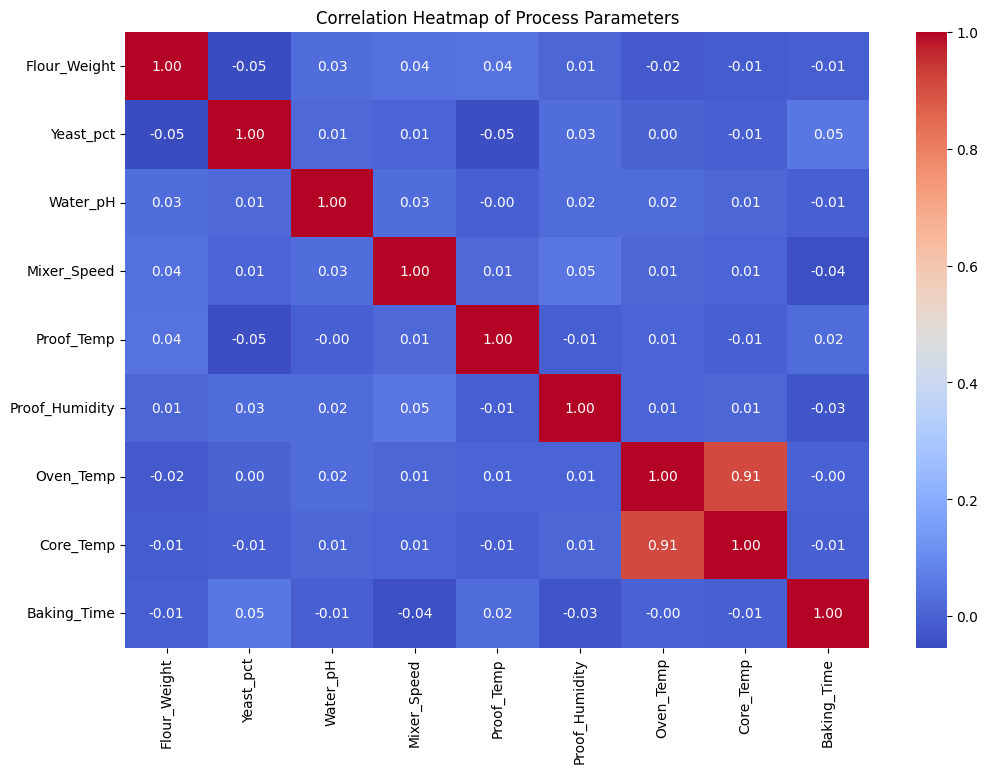


Histograms of original data:


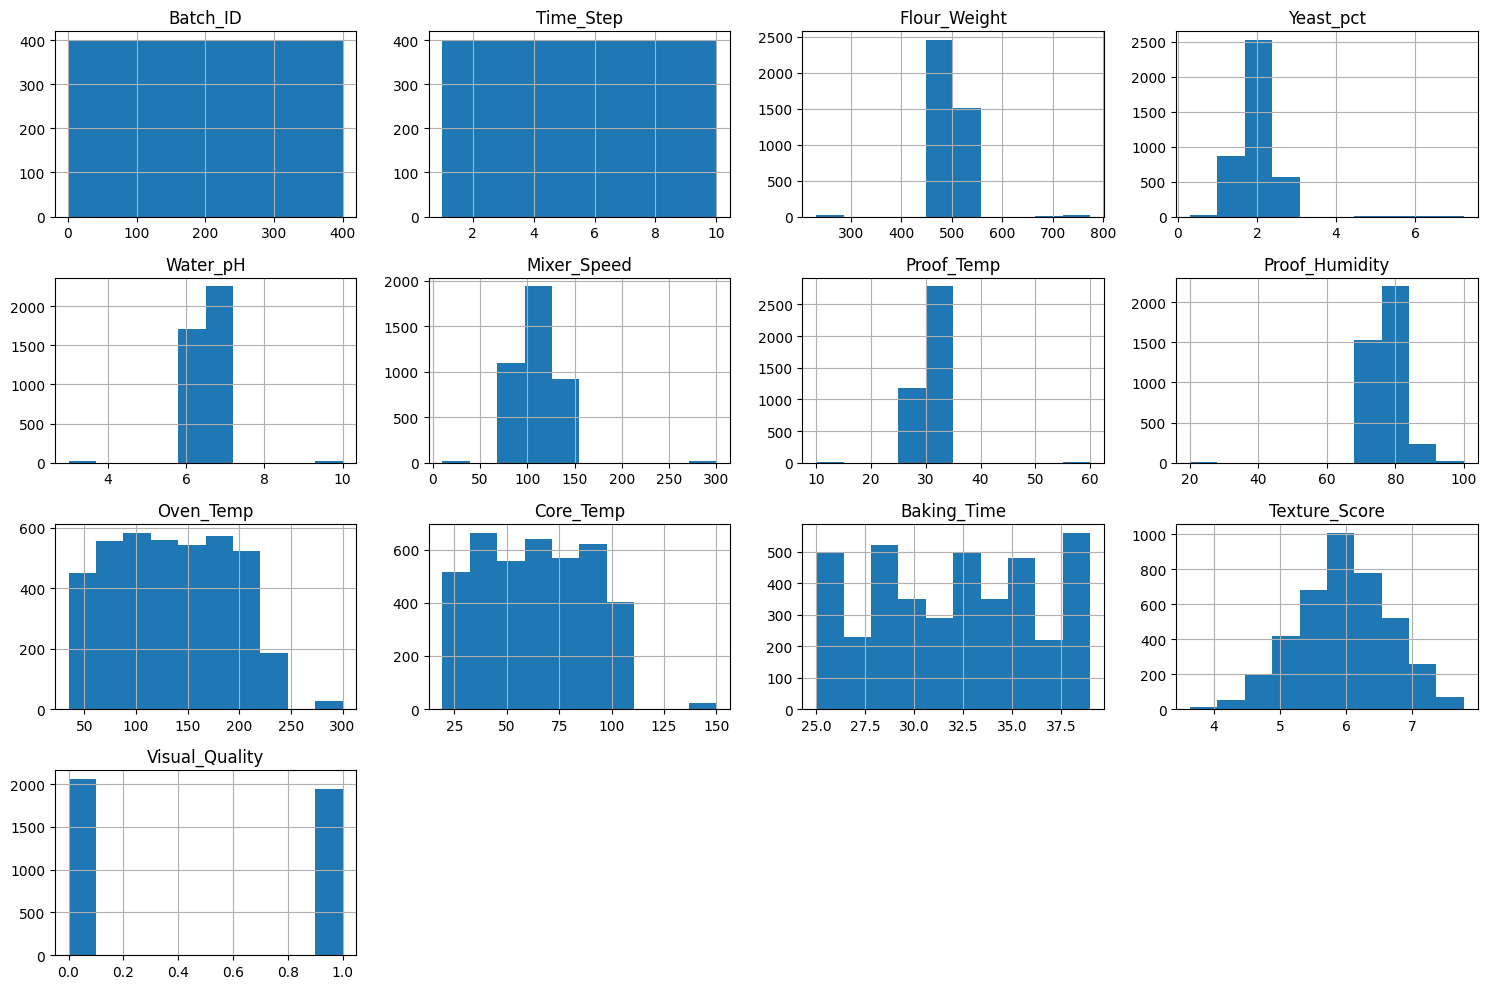


Outliers detected using IQR method:


Batch_ID  Time_Step  Flour_Weight  Yeast_pct  Water_pH  Mixer_Speed  \
9            1         10    507.450712   2.231994  6.718390          300   
10           2          1    516.953423   1.673365  3.000000          129   
20           3          1    483.404975   2.229606  6.765069          106   
48           5          9    529.475521   2.092697  6.097024          135   
52           6          3    250.097754   1.760829  7.195504           91   
...        ...        ...           ...        ...       ...          ...   
3939       394         10    476.739549   1.701078  7.088696          122   
3943       395          4    529.222524   0.309585  6.851875          106   
3958       396          9    489.430351   2.448797  6.428589          109   
3974       398          5    526.856953   2.452237  6.531085          113   
3984       399          5    487.008669   0.409735  6.239505          101   

      Proof_Temp  Proof_Humidity   Oven_Temp   Core_Temp  Baking_Time  \
9      31.120829       71.499624  237.715862  103.558385           35   
10     32.637656       74.675666   50.119357   25.268858           30   
20     10.000000       75.743903   49.411380   21.024862           39   
48     60.000000       80.923245  212.205689   92.459415           32   
52     31.908054       83.239545   90.748455   43.424218           31   
...          ...             ...         ...         ...          ...   
3939   32.705578       84.265494  206.132664  103.468839           36   
3943   28.974376       78.703284  111.988043   52.675318           28   
3958   29.671102      100.000000  191.967460   93.893929           31   
3974   10.000000       74.138838  136.574335   54.554015           37   
3984   33.930466       77.379106  123.656136   55.692845           38   

      Texture_Score  Visual_Quality  
9              5.45               0  
10             5.41               0  
20             5.16               0  
48             5.74               0  
52             6.95               1  
...             ...             ...  
3939           3.64               0  
3943           5.38               0  
3958           4.87               0  
3974           5.58               0  
3984           5.03               0  

[265 rows x 13 columns]

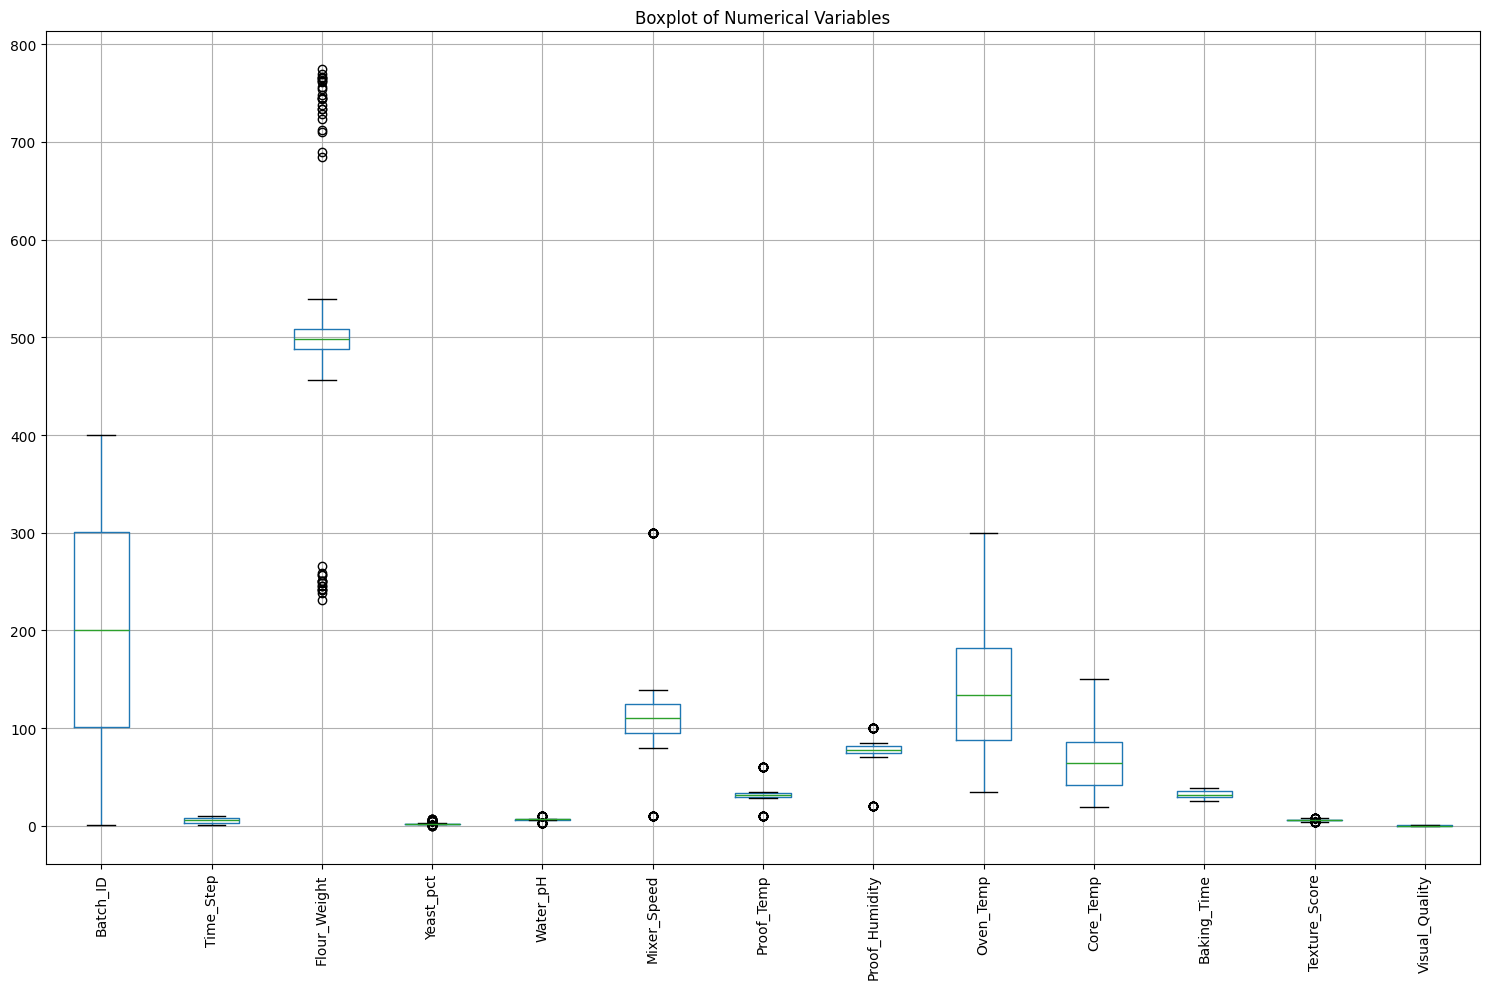

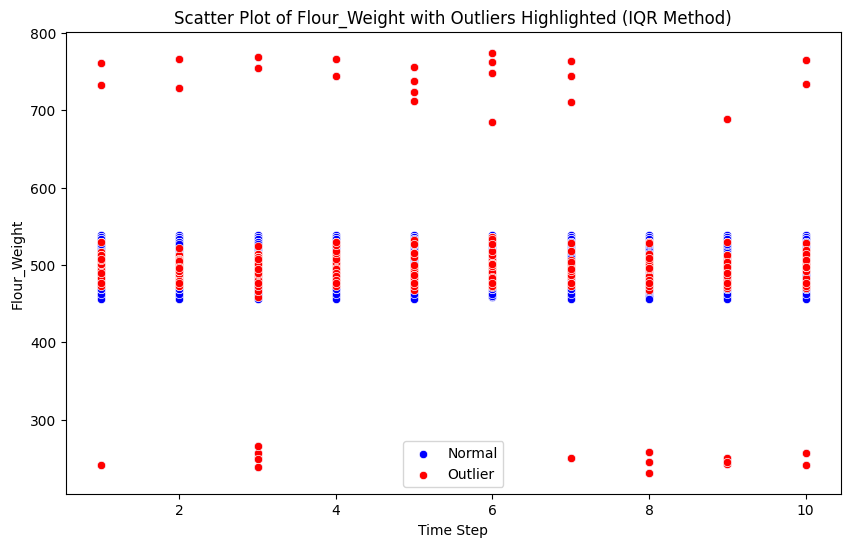

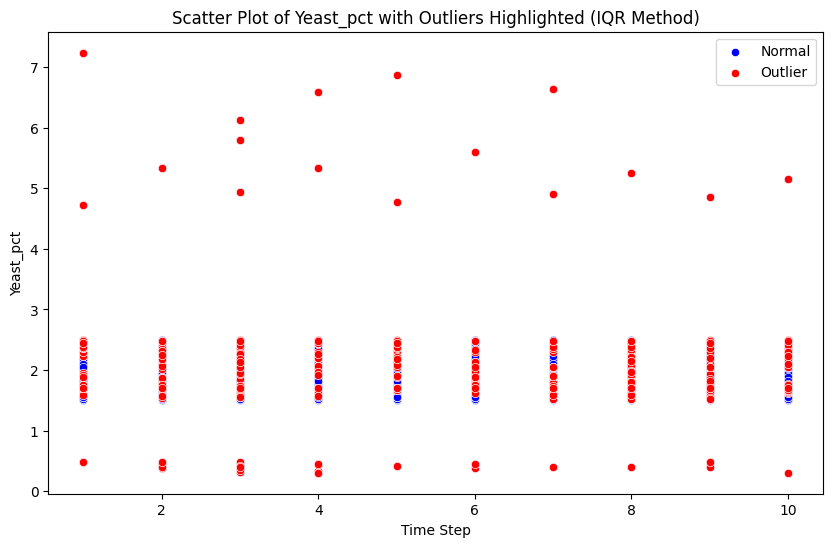

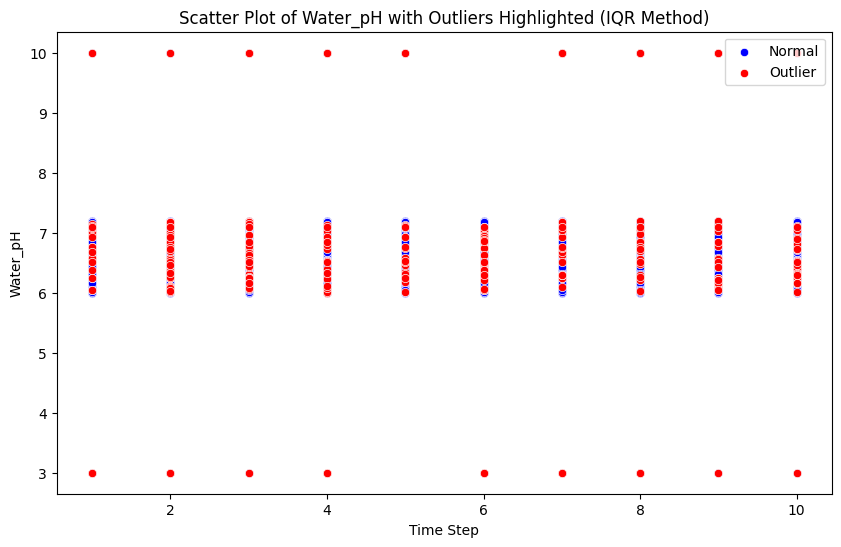

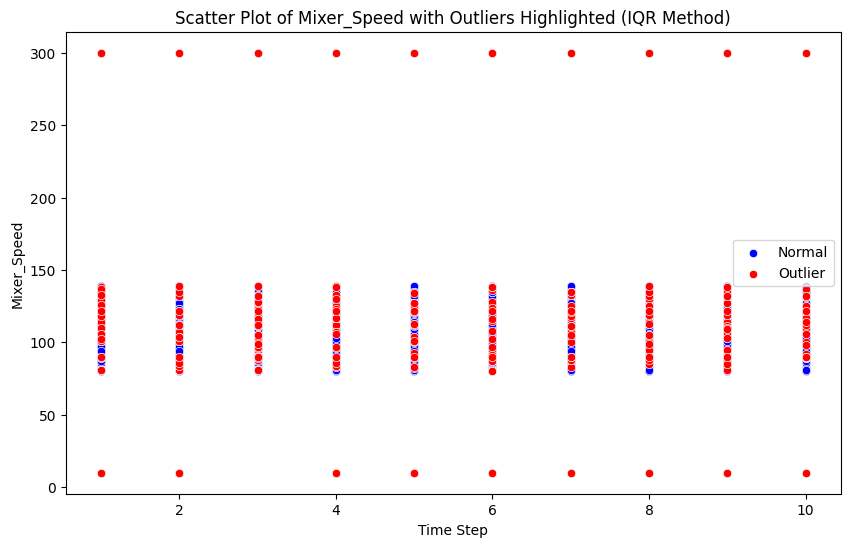

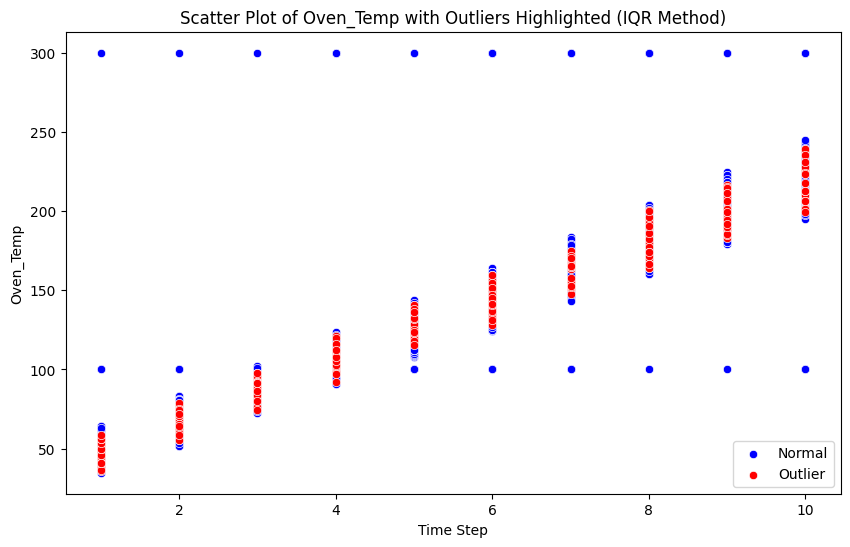

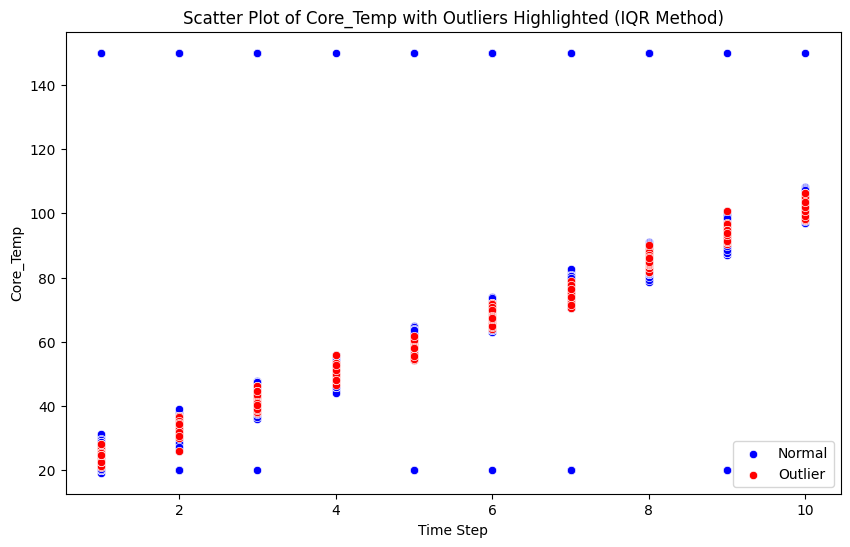


Shape of original data: (4000, 13)
Shape of cleaned data: (3735, 13)

Descriptive statistics of cleaned data:


Batch_ID    Time_Step  Flour_Weight    Yeast_pct     Water_pH  \
count  3735.000000  3735.000000   3735.000000  3735.000000  3735.000000   
mean    200.128514     5.512450    498.887970     1.995692     6.597244   
std     114.944627     2.874596     15.680517     0.300442     0.351154   
min       1.000000     1.000000    456.571725     1.512658     6.001444   
25%     101.000000     3.000000    487.989065     1.726033     6.304996   
50%     200.000000     6.000000    498.847019     1.998873     6.587473   
75%     299.000000     8.000000    508.337689     2.248929     6.917817   
max     400.000000    10.000000    538.965570     2.497672     7.198671   

       Mixer_Speed   Proof_Temp  Proof_Humidity    Oven_Temp    Core_Temp  \
count  3735.000000  3735.000000     3735.000000  3735.000000  3735.000000   
mean    109.637483    31.534944       77.547490   135.179014    64.153188   
std      17.408150     2.035993        4.179879    56.127112    25.771587   
min      80.000000    28.010956       70.057454    34.763658    19.255476   
25%      95.000000    29.740843       74.135798    87.670477    42.104868   
50%     110.000000    31.672819       77.457307   133.862544    64.154725   
75%     124.500000    33.273087       81.111529   181.973574    85.640345   
max     139.000000    34.993346       84.914320   300.000000   150.000000   

       Baking_Time  Texture_Score  Visual_Quality  
count  3735.000000    3735.000000     3735.000000  
mean     32.056225       5.975778        0.486212  
std       4.259656       0.665880        0.499877  
min      25.000000       4.420000        0.000000  
25%      29.000000       5.540000        0.000000  
50%      32.000000       5.980000        0.000000  
75%      36.000000       6.400000        1.000000  
max      39.000000       7.660000        1.000000


Histograms of cleaned data:


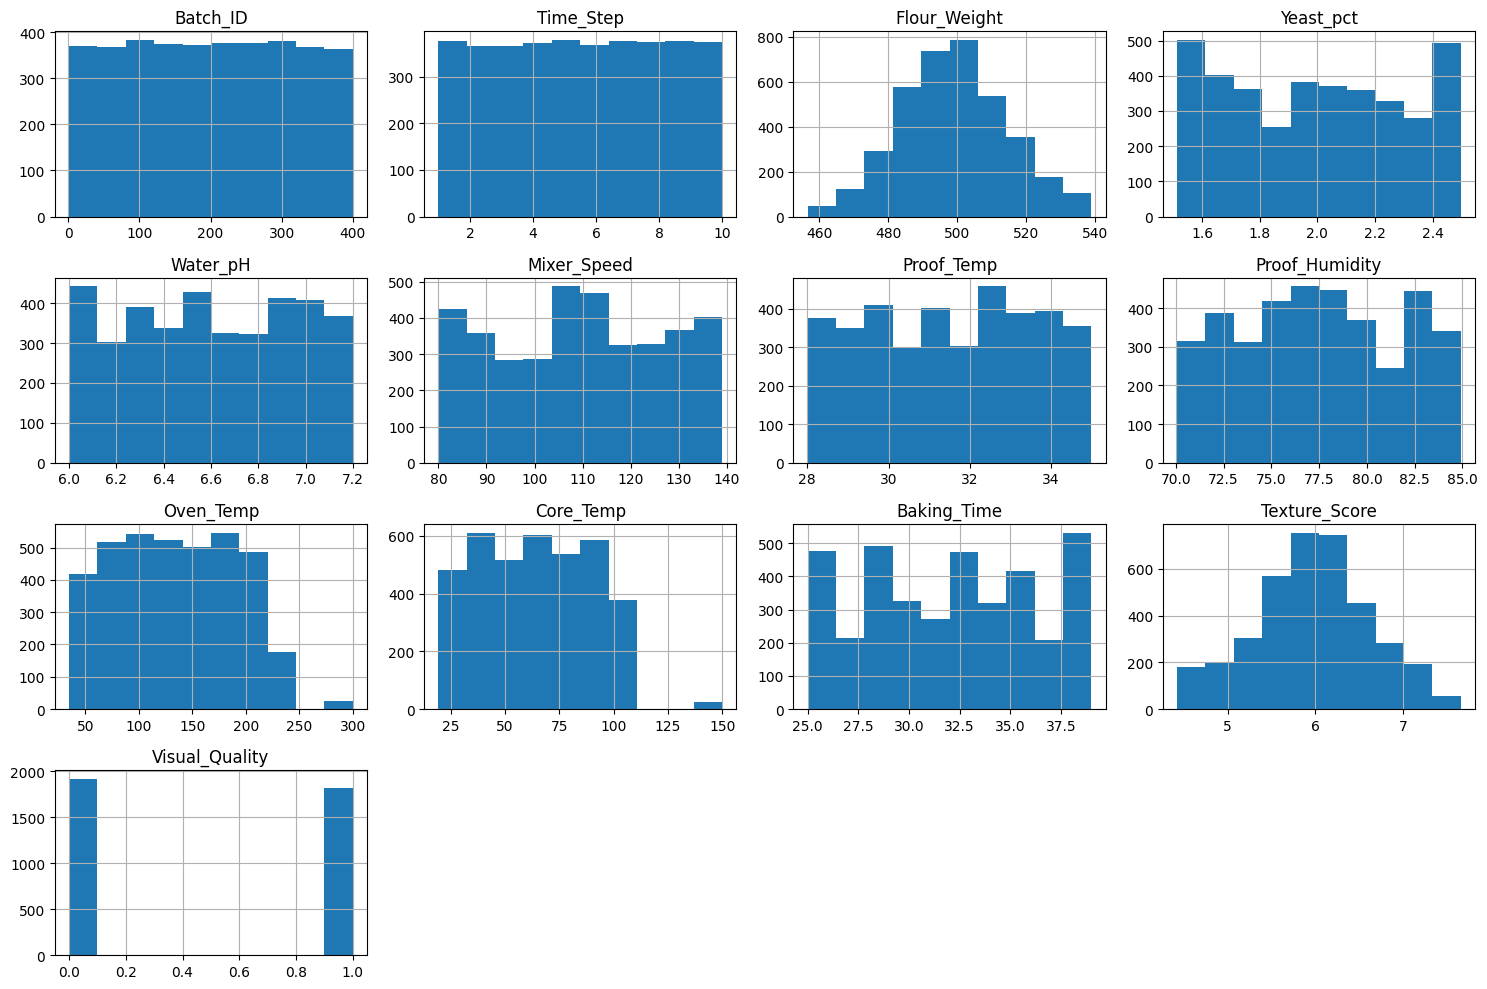


Original feature shape: (2100, 9)
Reshaped feature shape: (210, 10, 9)
Target shape (seq-to-one): (210,)

Shapes after split:
X_train: (168, 10, 9)
y_train: (168,)
X_test: (42, 10, 9)
y_test: (42,)

Model Summary:


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_44 (LSTM)                  │ (None, 10, 64)         │        18,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_43 (Dropout)            │ (None, 10, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_45 (LSTM)                  │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,393 (122.63 KB)

 Trainable params: 31,393 (122.63 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 67ms/step - loss: 34.4399 - val_loss: 24.2012 - learning_rate: 0.0010
Epoch 2/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 20.4939 - val_loss: 8.6026 - learning_rate: 0.0010
Epoch 3/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 6.0367 - val_loss: 0.9951 - learning_rate: 0.0010
Epoch 4/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.7608 - val_loss: 0.5565 - learning_rate: 0.0010
Epoch 5/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.6129 - val_loss: 0.6900 - learning_rate: 0.0010
Epoch 6/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.6011 - val_loss: 0.4569 - learning_rate: 0.0010
Epoch 7/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.5119 - val_loss: 0.3941 - learning_rate: 0.0010
Epoch 8/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.4493 - val_loss: 0.3972 - learning_rate: 0.0010
Epoch 9/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.4282 - val_loss: 0.3956 - learning_rate: 0.0010
Epoch 10/200
9/9 ━━━━━━━━

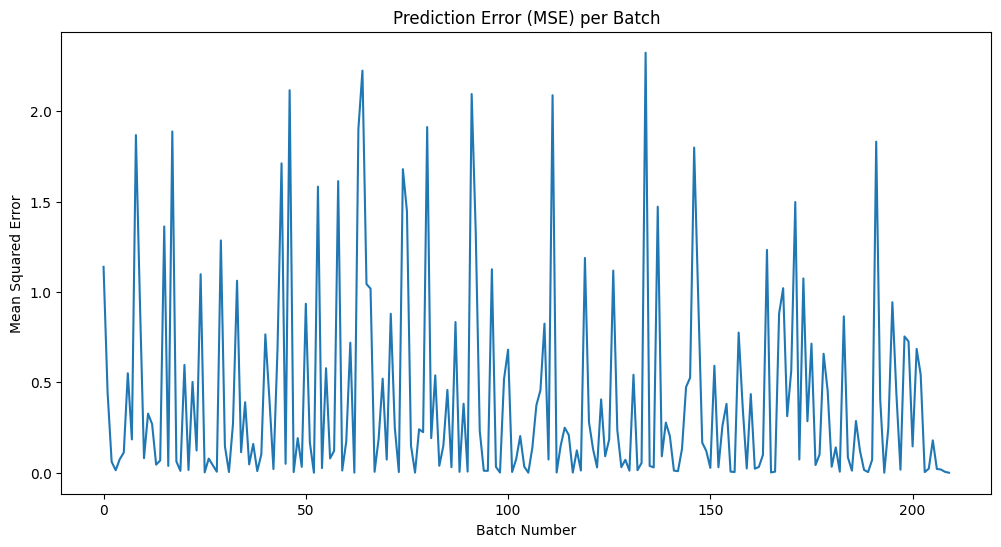


Batches identified as anomalous based on prediction error threshold:
[ 21  38  91 120 121 152 172 214 262 282 370]


In [70]:
# Load Dataset: Use pandas to read the Excel file.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# =============================
# Load and Explore Data
# =============================
excel_file_path = 'FnB_LSTM_Dataset_with_Anomalies.xlsx'
df = pd.read_excel(excel_file_path)

print("Descriptive statistics:")
display(df.describe())

# Correlation heatmap (exclude IDs and targets)
numerical_cols = df.select_dtypes(include=['number']).columns.tolist()
cols_to_exclude = ['Batch_ID', 'Time_Step', 'Texture_Score', 'Visual_Quality']
correlation_cols = [col for col in numerical_cols if col not in cols_to_exclude]
correlation_matrix = df[correlation_cols].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Process Parameters')
plt.show()

# Histograms
print("\nHistograms of original data:")
df.hist(figsize=(15, 10))
plt.tight_layout()
plt.show()

# =============================
# Outlier Detection (IQR method)
# =============================
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
outliers_iqr = df[((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

print("\nOutliers detected using IQR method:")
display(outliers_iqr)

plt.figure(figsize=(15, 10))
df.select_dtypes(include=np.number).boxplot()
plt.title('Boxplot of Numerical Variables')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

key_parameters = ['Flour_Weight', 'Yeast_pct', 'Water_pH', 'Mixer_Speed', 'Oven_Temp', 'Core_Temp']
for param in key_parameters:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df, x='Time_Step', y=param, color='blue', label='Normal')
    sns.scatterplot(data=outliers_iqr, x='Time_Step', y=param, color='red', label='Outlier')
    plt.title(f'Scatter Plot of {param} with Outliers Highlighted (IQR Method)')
    plt.xlabel('Time Step')
    plt.ylabel(param)
    plt.legend()
    plt.show()

# Clean dataset
cleaned_df = df.drop(outliers_iqr.index)
print("\nShape of original data:", df.shape)
print("Shape of cleaned data:", cleaned_df.shape)
print("\nDescriptive statistics of cleaned data:")
display(cleaned_df.describe())

print("\nHistograms of cleaned data:")
cleaned_df.hist(figsize=(15, 10))
plt.tight_layout()
plt.show()

# =============================
# Data Preparation for LSTM
# =============================
time_steps = 10
batch_counts = cleaned_df['Batch_ID'].value_counts()
complete_batches = batch_counts[batch_counts == time_steps].index
filtered_df = cleaned_df[cleaned_df['Batch_ID'].isin(complete_batches)].copy()

# Features and target
feature_cols = filtered_df.columns.tolist()
cols_to_exclude = ['Batch_ID', 'Time_Step', 'Texture_Score', 'Visual_Quality']
features = [col for col in feature_cols if col not in cols_to_exclude]
X = filtered_df[features]
y = filtered_df['Texture_Score']

# Normalize features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Reshape to (batches, timesteps, features)
n_batches = X_scaled.shape[0] // time_steps
n_features = X_scaled.shape[1]
X_reshaped = X_scaled.reshape((n_batches, time_steps, n_features))

# Align target with last timestep of each batch
y_seq_to_one = y.values[time_steps-1::time_steps]

print("\nOriginal feature shape:", X.shape)
print("Reshaped feature shape:", X_reshaped.shape)
print("Target shape (seq-to-one):", y_seq_to_one.shape)

# =============================
# Train-Test Split
# =============================
X_train, X_test, y_train, y_test = train_test_split(
    X_reshaped, y_seq_to_one, test_size=0.2, random_state=42
)

X_train_tensor = tf.convert_to_tensor(X_train, dtype=tf.float32)
y_train_tensor = tf.convert_to_tensor(y_train, dtype=tf.float32)
X_test_tensor = tf.convert_to_tensor(X_test, dtype=tf.float32)
y_test_tensor = tf.convert_to_tensor(y_test, dtype=tf.float32)

print("\nShapes after split:")
print("X_train:", X_train_tensor.shape)
print("y_train:", y_train_tensor.shape)
print("X_test:", X_test_tensor.shape)
print("y_test:", y_test_tensor.shape)

# =============================
# Model Building
# =============================
model = Sequential()
model.add(LSTM(units=64, return_sequences=True, input_shape=(time_steps, n_features)))
model.add(Dropout(0.1))
model.add(LSTM(units=32, return_sequences=False))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')

print("\nModel Summary:")
model.summary()

# =============================
# Training
# =============================
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5)

history = model.fit(
    X_train_tensor, y_train_tensor,
    epochs=200, batch_size=16,
    validation_split=0.2,
    callbacks=[early_stop, reduce_lr],
    verbose=1
)

# =============================
# Evaluation
# =============================
loss = model.evaluate(X_test_tensor, y_test_tensor)
print("\nTest Loss (MSE):", loss)

y_pred = model.predict(X_test_tensor)
r2 = r2_score(y_test_tensor.numpy(), y_pred)
rmse = np.sqrt(mean_squared_error(y_test_tensor.numpy(), y_pred))

print("\nR² Score:", r2)
print("RMSE:", rmse)

# =============================
# Full Dataset Predictions & Anomaly Detection
# =============================
X_reshaped_tensor = tf.convert_to_tensor(X_reshaped, dtype=tf.float32)
y_pred_full = model.predict(X_reshaped_tensor)

# True targets (last timestep per batch)
y_true_full = y_seq_to_one.reshape(-1, 1)

mse_per_batch = np.mean(np.square(y_true_full - y_pred_full), axis=1)

plt.figure(figsize=(12, 6))
plt.plot(mse_per_batch)
plt.title('Prediction Error (MSE) per Batch')
plt.xlabel('Batch Number')
plt.ylabel('Mean Squared Error')
plt.show()

threshold = np.percentile(mse_per_batch, 95)  # 95th percentile
anomalous_batches_indices = np.where(mse_per_batch > threshold)[0]
anomalous_batches = filtered_df['Batch_ID'].unique()[anomalous_batches_indices]

print("\nBatches identified as anomalous based on prediction error threshold:")
print(anomalous_batches)


Epoch 1/200


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


88/88 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 0.3516 - val_loss: 0.2255
Epoch 2/200
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2129 - val_loss: 0.1594
Epoch 3/200
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1359 - val_loss: 0.0930
Epoch 4/200
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0988 - val_loss: 0.0906
Epoch 5/200
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0997 - val_loss: 0.1130
Epoch 6/200
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0954 - val_loss: 0.0959
Epoch 7/200
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0972 - val_loss: 0.1019
Epoch 8/200
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0987 - val_loss: 0.1011
Epoch 9/200
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0966 - val_loss: 0.1046
Epoch 10/200
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0968 - val_loss: 0.1118
Epoch 11/200
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0949 - val_loss: 0.0902
Epoch 12/200
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0953 - val_l

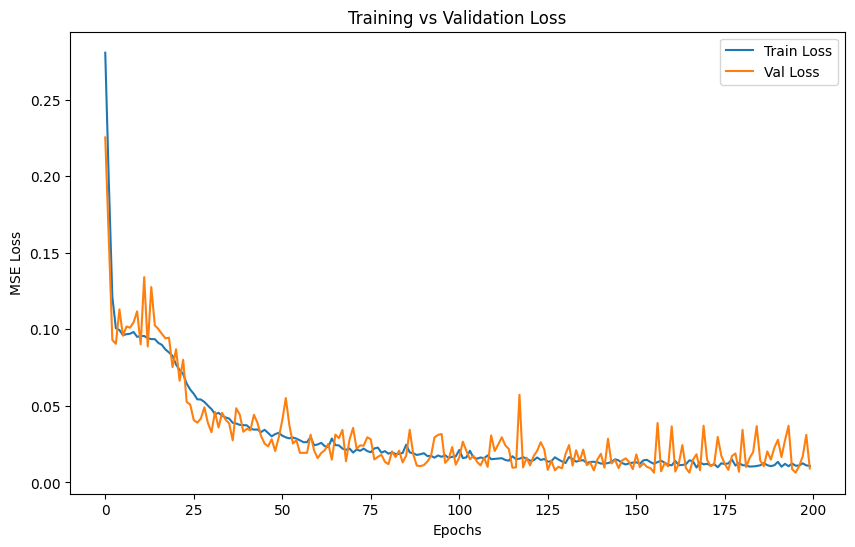

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# =========================
# 1. Load Dataset
# =========================
excel_file_path = "FnB_LSTM_Dataset_with_Anomalies.xlsx"
df = pd.read_excel(excel_file_path)

# Ensure numeric values only
df = df.select_dtypes(include=[np.number]).dropna()

# =========================
# 2. Scale Features
# =========================
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df)

X = scaled_data[:, :-1]
y = scaled_data[:, -1]

# =========================
# 3. Reshape for LSTM
# =========================
# Reshape input to [samples, timesteps, features]
X = X.reshape((X.shape[0], 1, X.shape[1]))

# Train/Val/Test Split
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, shuffle=False)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, shuffle=False)

# =========================
# 4. Build Model
# =========================
model = Sequential([
    LSTM(64, activation="tanh", return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),
    LSTM(32, activation="tanh"),
    Dropout(0.2),
    Dense(1)
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss="mse")

# =========================
# 5. Train Model (No EarlyStopping)
# =========================
history = model.fit(
    X_train, y_train,
    epochs=200,
    batch_size=32,
    validation_data=(X_val, y_val),
    verbose=1
)

# =========================
# 6. Evaluate Model
# =========================
loss = model.evaluate(X_test, y_test, verbose=1)
print(f"\nTest Loss (MSE): {loss}")

y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"R² Score: {r2}")
print(f"RMSE: {rmse}")

# =========================
# 7. Plot Loss
# =========================
plt.figure(figsize=(10, 6))
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Val Loss")
plt.xlabel("Epochs")
plt.ylabel("MSE Loss")
plt.title("Training vs Validation Loss")
plt.legend()
plt.show()


Epoch 1/200
88/88 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - loss: 0.3417 - val_loss: 0.2363 - learning_rate: 0.0010
Epoch 2/200
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.2213 - val_loss: 0.1813 - learning_rate: 0.0010
Epoch 3/200
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1526 - val_loss: 0.1285 - learning_rate: 0.0010
Epoch 4/200
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1036 - val_loss: 0.0930 - learning_rate: 0.0010
Epoch 5/200
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0991 - val_loss: 0.1083 - learning_rate: 0.0010
Epoch 6/200
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0990 - val_loss: 0.0894 - learning_rate: 0.0010
Epoch 7/200
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0945 - val_loss: 0.1048 - learning_rate: 0.0010
Epoch 8/200
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0958 - val_loss: 0.0995 - learning_rate: 0.0010
Epoch 9/200
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0968 - val_loss: 0.0989 - learning_rate: 0.0010
Epoch 10/200
88/88

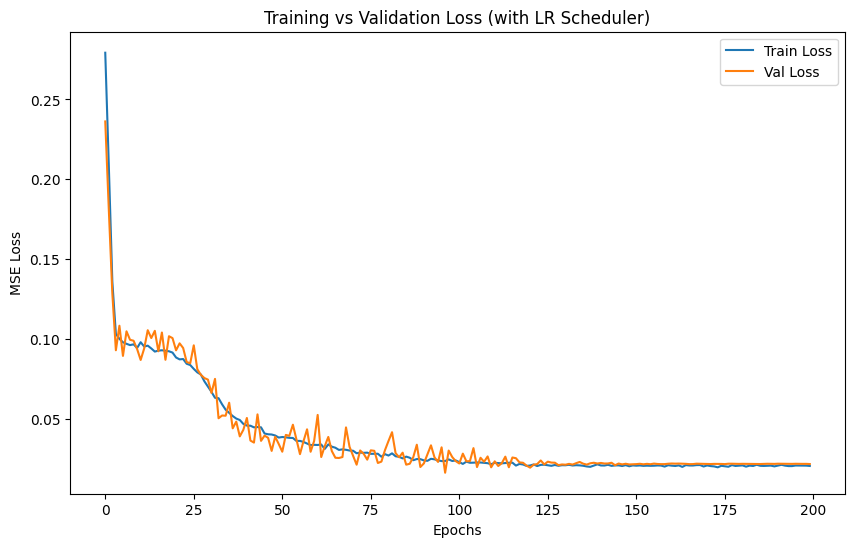

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, LSTM, Dense, Dropout
from tensorflow.keras.callbacks import ReduceLROnPlateau

# =========================
# 1. Load Dataset
# =========================
excel_file_path = "FnB_LSTM_Dataset_with_Anomalies.xlsx"
df = pd.read_excel(excel_file_path)

# Ensure only numeric values and drop NaNs
df = df.select_dtypes(include=[np.number]).dropna()

# =========================
# 2. Scale Features
# =========================
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df)

X = scaled_data[:, :-1]  # Features
y = scaled_data[:, -1]   # Target

# =========================
# 3. Reshape for LSTM
# =========================
# [samples, timesteps, features]
X = X.reshape((X.shape[0], 1, X.shape[1]))

# Train/Val/Test Split
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, shuffle=False)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, shuffle=False)

# =========================
# 4. Build Model
# =========================
model = Sequential([
    Input(shape=(X_train.shape[1], X_train.shape[2])),
    LSTM(64, activation="tanh", return_sequences=True),
    Dropout(0.2),
    LSTM(32, activation="tanh"),
    Dropout(0.2),
    Dense(1)
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss="mse")

# =========================
# 5. Learning Rate Scheduler
# =========================
lr_scheduler = ReduceLROnPlateau(
    monitor="val_loss",   # Watch validation loss
    factor=0.5,           # Reduce LR by half
    patience=10,          # Wait 10 epochs before reducing
    min_lr=1e-6,          # Don’t go below this LR
    verbose=1
)

# =========================
# 6. Train Model (200 epochs, with scheduler)
# =========================
history = model.fit(
    X_train, y_train,
    epochs=200,
    batch_size=32,
    validation_data=(X_val, y_val),
    callbacks=[lr_scheduler],
    verbose=1
)

# =========================
# 7. Evaluate Model
# =========================
loss = model.evaluate(X_test, y_test, verbose=1)
print(f"\nTest Loss (MSE): {loss}")

y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"R² Score: {r2}")
print(f"RMSE: {rmse}")

# =========================
# 8. Plot Loss Curves
# =========================
plt.figure(figsize=(10, 6))
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Val Loss")
plt.xlabel("Epochs")
plt.ylabel("MSE Loss")
plt.title("Training vs Validation Loss (with LR Scheduler)")
plt.legend()
plt.show()


Epoch 1/200


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


88/88 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - loss: 0.2761 - val_loss: 0.3146 - learning_rate: 0.0010
Epoch 2/200
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.2150 - val_loss: 0.2094 - learning_rate: 0.0010
Epoch 3/200
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.1799 - val_loss: 0.2028 - learning_rate: 0.0010
Epoch 4/200
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.1621 - val_loss: 0.1762 - learning_rate: 0.0010
Epoch 5/200
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.1545 - val_loss: 0.1707 - learning_rate: 0.0010
Epoch 6/200
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.1474 - val_loss: 0.1442 - learning_rate: 0.0010
Epoch 7/200
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.1428 - val_loss: 0.1786 - learning_rate: 0.0010
Epoch 8/200
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.1439 - val_loss: 0.1673 - learning_rate: 0.0010
Epoch 9/200
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.1342 - val_loss: 0.1366 - learning_rate: 0.0010
Epoch 10/200
88/88 ━━━

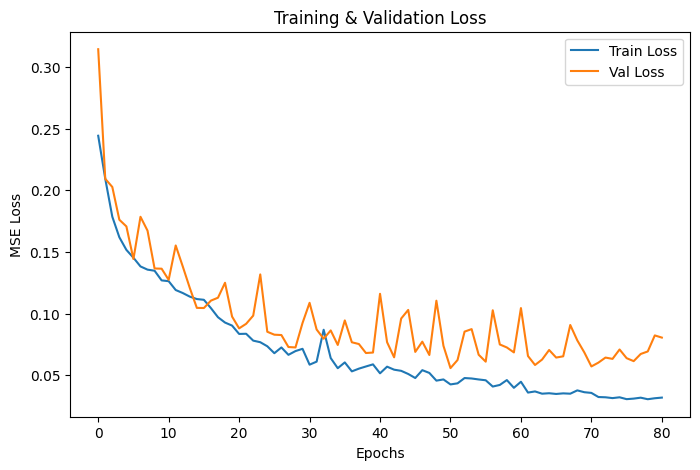

In [75]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

# -----------------------------
# 1. Load Dataset
# -----------------------------
excel_file_path = "FnB_LSTM_Dataset_with_Anomalies.xlsx"
df = pd.read_excel(excel_file_path)

# Assume first column is datetime or index, last column is target
df = df.dropna()
values = df.values

# -----------------------------
# 2. Normalize Data
# -----------------------------
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)

# -----------------------------
# 3. Prepare Sequences
# -----------------------------
def create_sequences(data, seq_length=10):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length, :-1])  # all but last column as features
        y.append(data[i+seq_length, -1])     # last column as target
    return np.array(X), np.array(y)

SEQ_LEN = 10
X, y = create_sequences(scaled, SEQ_LEN)

# Train/val/test split (70/15/15)
train_size = int(0.7 * len(X))
val_size = int(0.15 * len(X))
X_train, y_train = X[:train_size], y[:train_size]
X_val, y_val = X[train_size:train_size+val_size], y[train_size:train_size+val_size]
X_test, y_test = X[train_size+val_size:], y[train_size+val_size:]

# -----------------------------
# 4. Build LSTM Model
# -----------------------------
model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(SEQ_LEN, X.shape[2])),
    Dropout(0.2),
    LSTM(32),
    Dropout(0.2),
    Dense(1)
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss="mse")

# -----------------------------
# 5. Callbacks
# -----------------------------
# Reduce LR if val_loss doesn't improve for 10 epochs
lr_scheduler = ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=10, min_lr=1e-6)

# Stop training if no improvement in val_loss for 30 epochs
early_stop = EarlyStopping(monitor="val_loss", patience=30, restore_best_weights=True)

# -----------------------------
# 6. Train
# -----------------------------
history = model.fit(
    X_train, y_train,
    epochs=200,
    batch_size=32,
    validation_data=(X_val, y_val),
    callbacks=[lr_scheduler, early_stop],
    verbose=1
)

# -----------------------------
# 7. Evaluate
# -----------------------------
test_loss = model.evaluate(X_test, y_test, verbose=1)
print(f"\nTest Loss (MSE): {test_loss}")

y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"R² Score: {r2}")
print(f"RMSE: {rmse}")

# -----------------------------
# 8. Plot Loss Curves
# -----------------------------
plt.figure(figsize=(8,5))
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Val Loss")
plt.xlabel("Epochs")
plt.ylabel("MSE Loss")
plt.title("Training & Validation Loss")
plt.legend()
plt.show()


Descriptive statistics:


Batch_ID   Time_Step  Flour_Weight    Yeast_pct     Water_pH  \
count  4000.000000  4000.00000   4000.000000  4000.000000  4000.000000   
mean    200.500000     5.50000    499.209562     2.003265     6.591311   
std     115.484129     2.87264     28.712333     0.401776     0.510535   
min       1.000000     1.00000    231.344074     0.305958     3.000000   
25%     100.750000     3.00000    487.697347     1.721063     6.300653   
50%     200.500000     5.50000    498.468004     1.998896     6.586129   
75%     300.250000     8.00000    508.792487     2.254376     6.917817   
max     400.000000    10.00000    774.432650     7.235320    10.000000   

       Mixer_Speed   Proof_Temp  Proof_Humidity    Oven_Temp    Core_Temp  \
count  4000.000000  4000.000000     4000.000000  4000.000000  4000.000000   
mean    110.348250    31.565930       77.468954   134.860368    64.004790   
std      23.889457     3.052437        5.560535    56.003921    25.699253   
min      10.000000    10.000000       20.000000    34.763658    19.255476   
25%      95.000000    29.740843       74.110205    87.477279    42.007198   
50%     110.000000    31.680688       77.457307   133.398859    64.001105   
75%     125.000000    33.291491       81.238257   181.576867    85.467533   
max     300.000000    60.000000      100.000000   300.000000   150.000000   

       Baking_Time  Texture_Score  Visual_Quality  
count  4000.000000    4000.000000     4000.000000  
mean     32.092500       5.972200        0.485000  
std       4.243636       0.687811        0.499837  
min      25.000000       3.640000        0.000000  
25%      29.000000       5.540000        0.000000  
50%      32.000000       5.980000        0.000000  
75%      36.000000       6.400000        1.000000  
max      39.000000       7.780000        1.000000

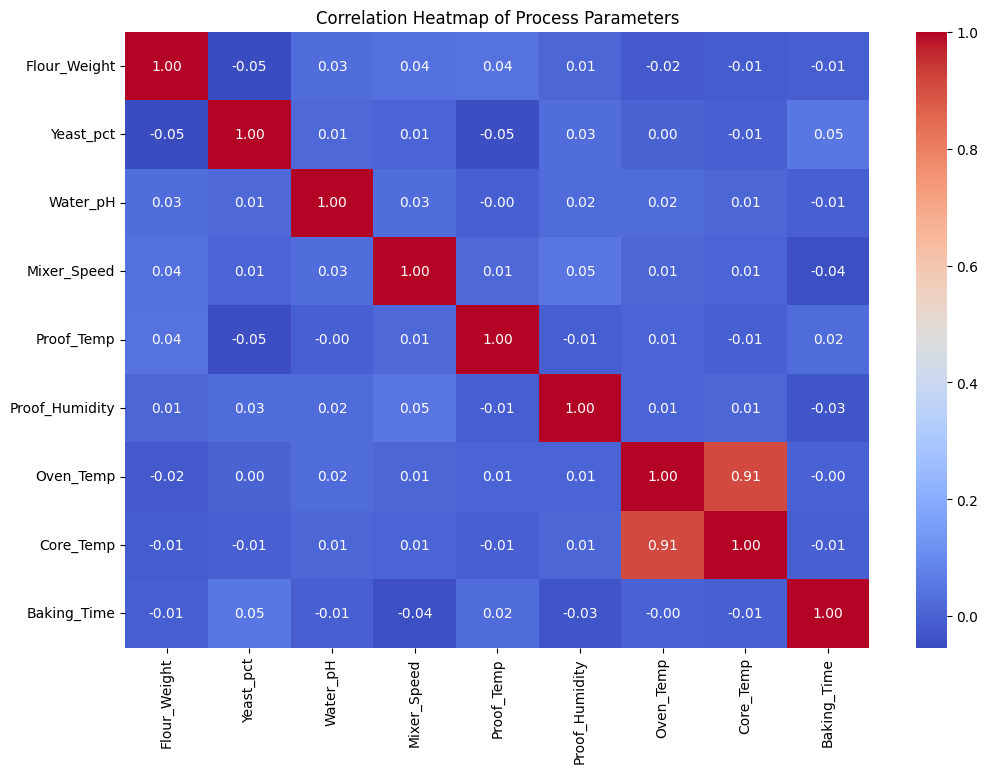


Histograms of original data:


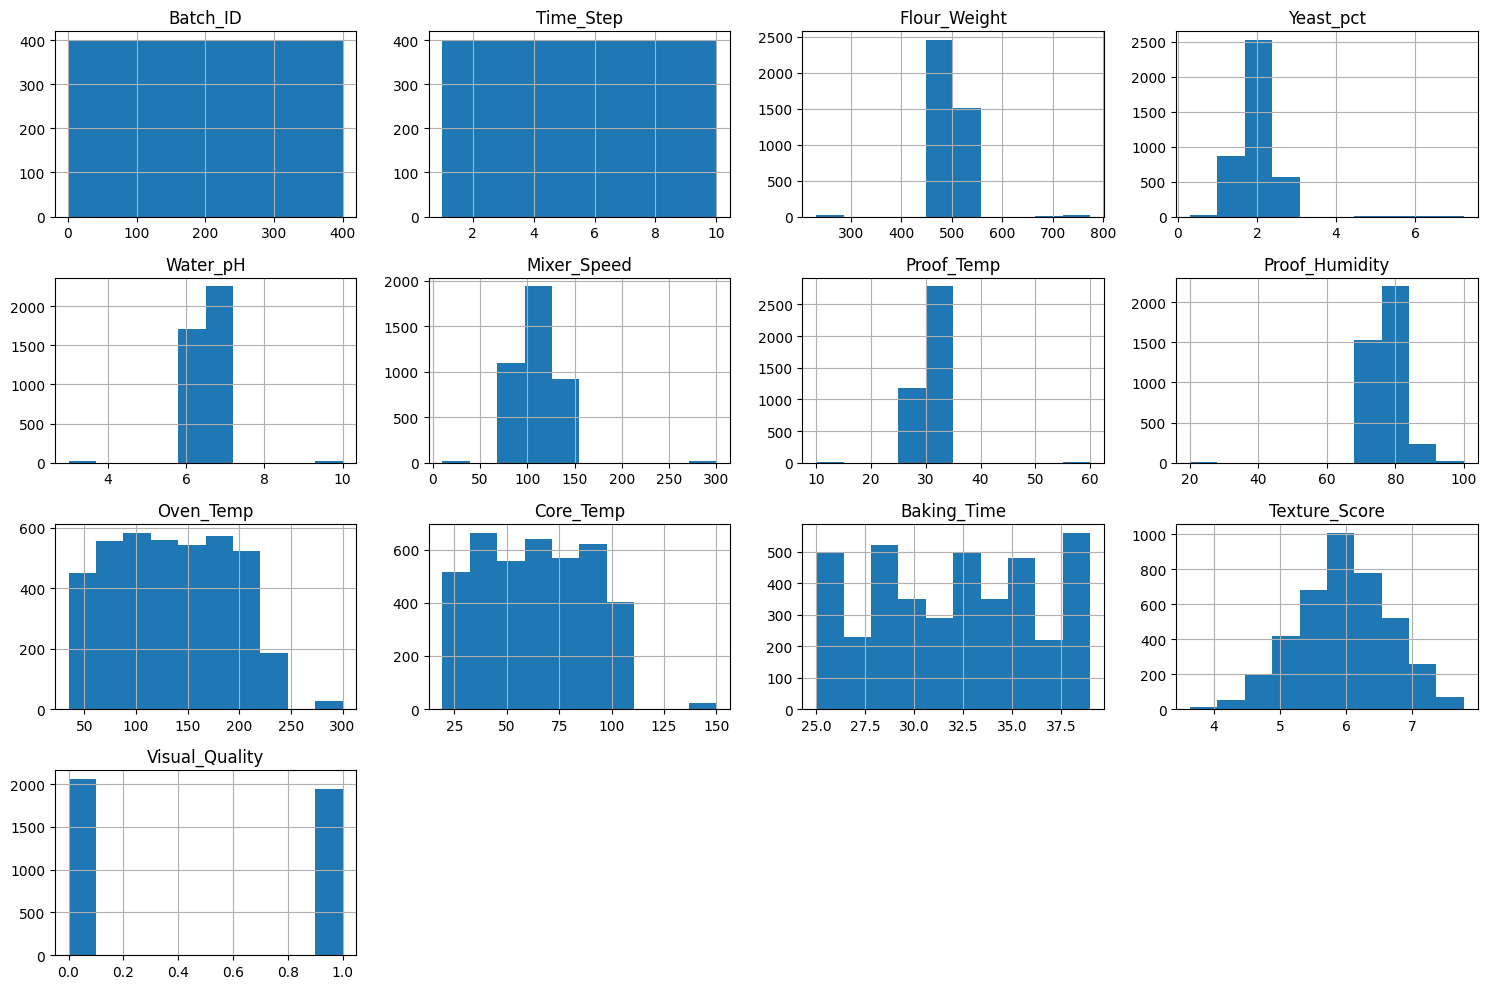


Outliers detected using IQR method:


Batch_ID  Time_Step  Flour_Weight  Yeast_pct  Water_pH  Mixer_Speed  \
9            1         10    507.450712   2.231994  6.718390          300   
10           2          1    516.953423   1.673365  3.000000          129   
20           3          1    483.404975   2.229606  6.765069          106   
48           5          9    529.475521   2.092697  6.097024          135   
52           6          3    250.097754   1.760829  7.195504           91   
...        ...        ...           ...        ...       ...          ...   
3939       394         10    476.739549   1.701078  7.088696          122   
3943       395          4    529.222524   0.309585  6.851875          106   
3958       396          9    489.430351   2.448797  6.428589          109   
3974       398          5    526.856953   2.452237  6.531085          113   
3984       399          5    487.008669   0.409735  6.239505          101   

      Proof_Temp  Proof_Humidity   Oven_Temp   Core_Temp  Baking_Time  \
9      31.120829       71.499624  237.715862  103.558385           35   
10     32.637656       74.675666   50.119357   25.268858           30   
20     10.000000       75.743903   49.411380   21.024862           39   
48     60.000000       80.923245  212.205689   92.459415           32   
52     31.908054       83.239545   90.748455   43.424218           31   
...          ...             ...         ...         ...          ...   
3939   32.705578       84.265494  206.132664  103.468839           36   
3943   28.974376       78.703284  111.988043   52.675318           28   
3958   29.671102      100.000000  191.967460   93.893929           31   
3974   10.000000       74.138838  136.574335   54.554015           37   
3984   33.930466       77.379106  123.656136   55.692845           38   

      Texture_Score  Visual_Quality  
9              5.45               0  
10             5.41               0  
20             5.16               0  
48             5.74               0  
52             6.95               1  
...             ...             ...  
3939           3.64               0  
3943           5.38               0  
3958           4.87               0  
3974           5.58               0  
3984           5.03               0  

[265 rows x 13 columns]

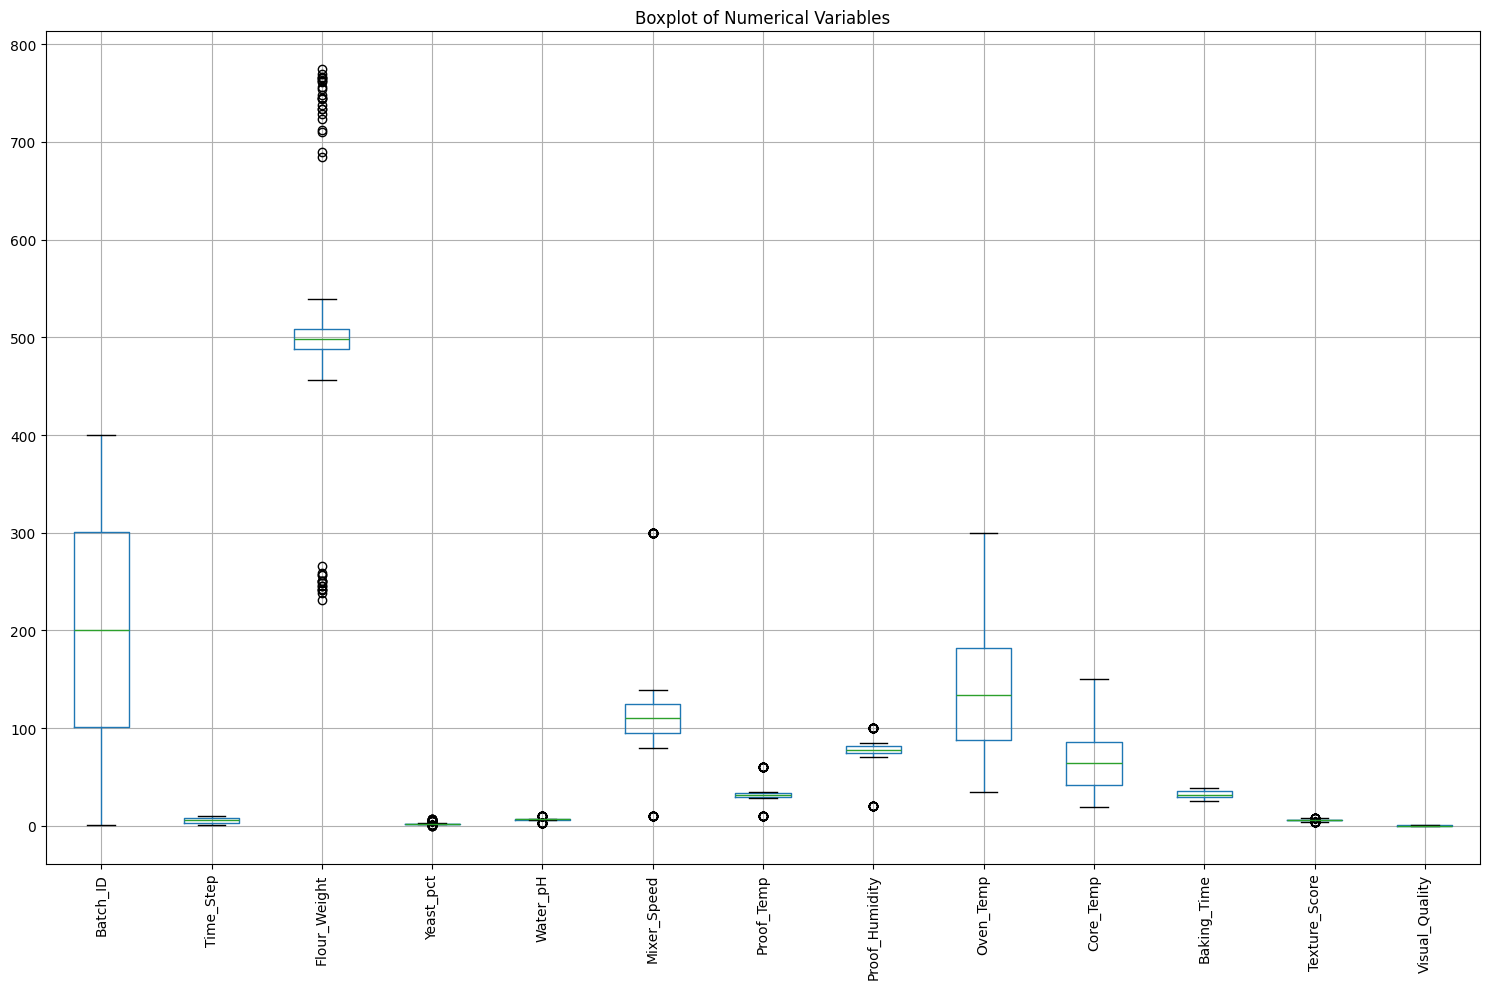

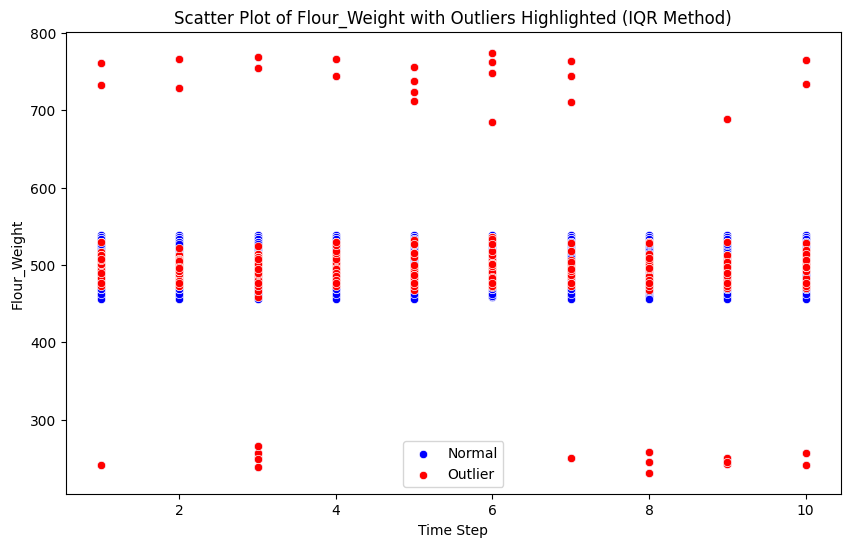

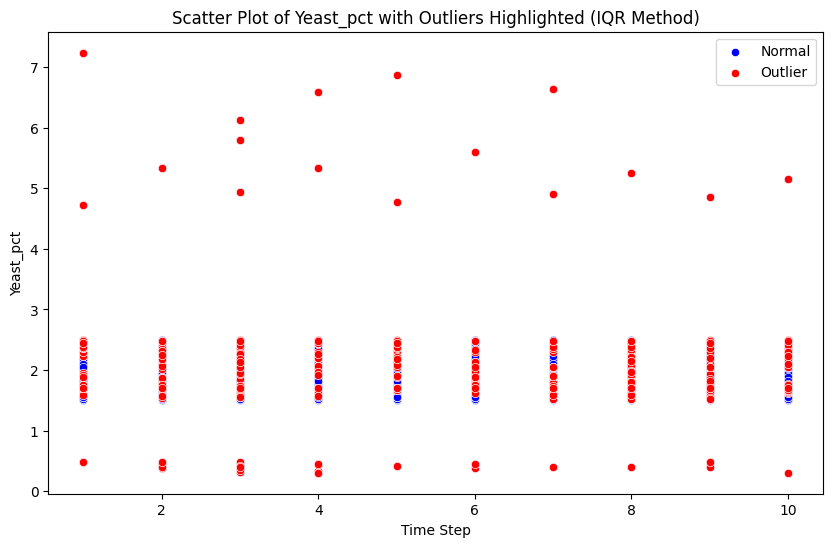

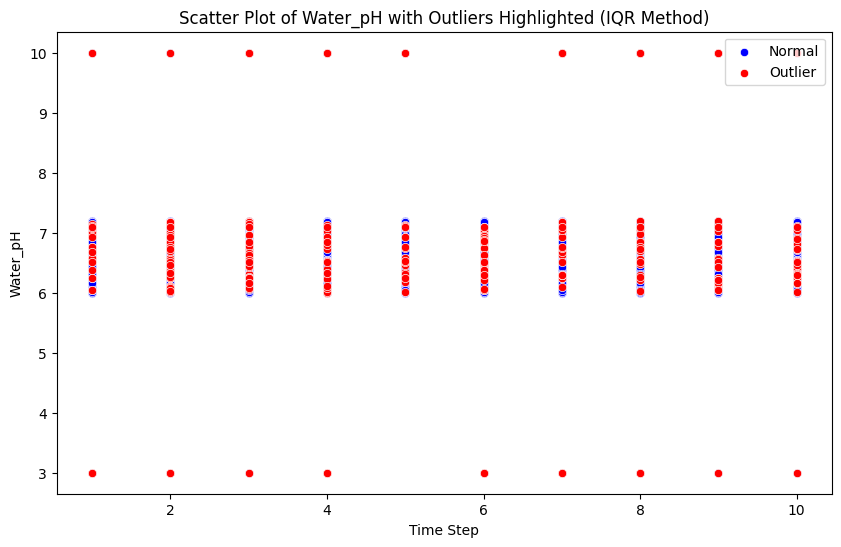

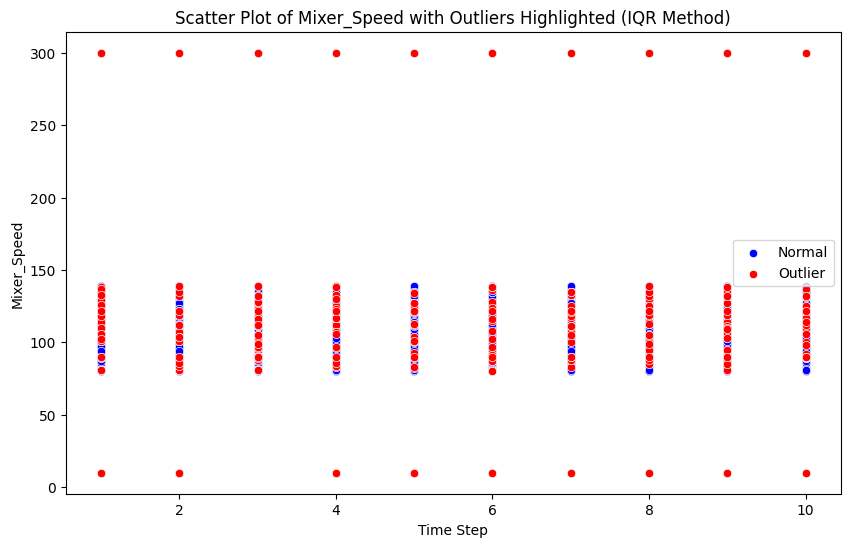

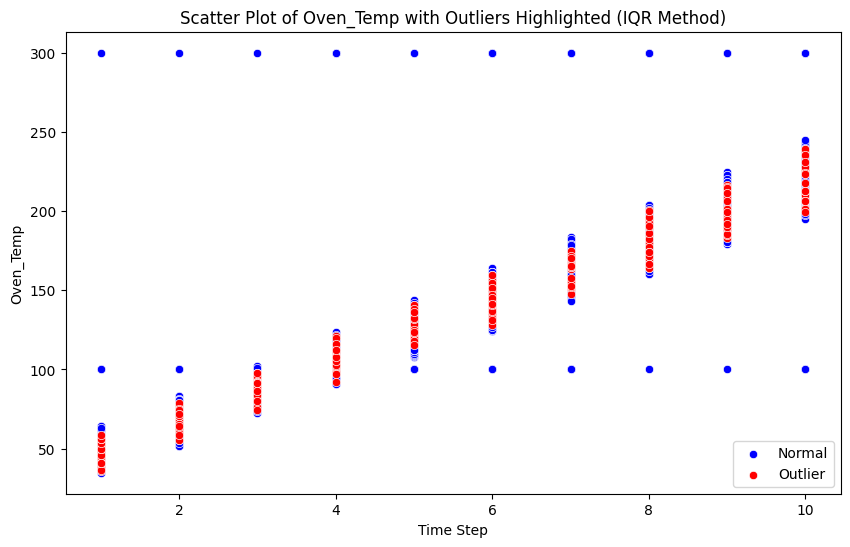

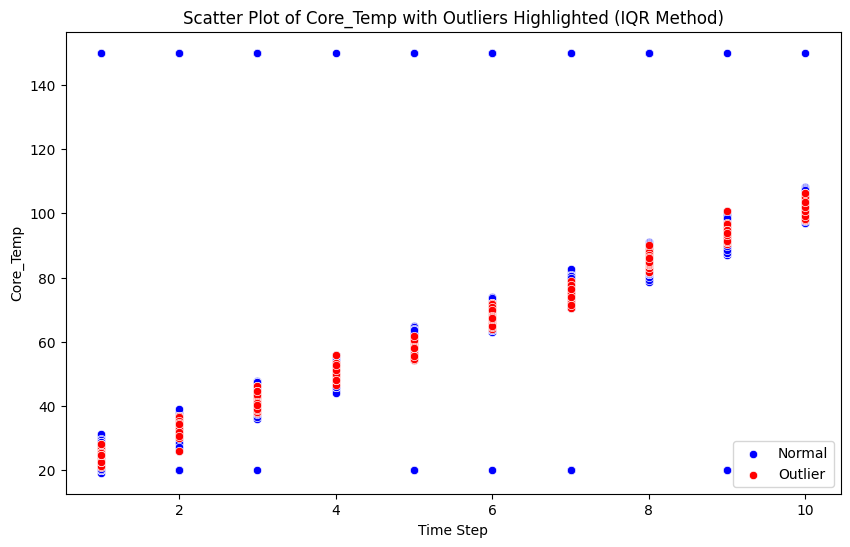


Shape of original data: (4000, 13)
Shape of cleaned data: (3735, 13)

Original feature shape: (2100, 9)
Reshaped feature shape: (210, 10, 9)
Target shape (seq-to-one): (210,)

Model Summary:


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_23"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_54 (LSTM)                  │ (None, 10, 64)         │        18,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_51 (Dropout)            │ (None, 10, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_55 (LSTM)                  │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_52 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,393 (122.63 KB)

 Trainable params: 31,393 (122.63 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 70ms/step - loss: 33.6741 - val_loss: 23.6323 - learning_rate: 0.0010
Epoch 2/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 20.2630 - val_loss: 8.8234 - learning_rate: 0.0010
Epoch 3/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 7.5020 - val_loss: 1.5317 - learning_rate: 0.0010
Epoch 4/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 1.3483 - val_loss: 0.3959 - learning_rate: 0.0010
Epoch 5/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.6909 - val_loss: 0.5294 - learning_rate: 0.0010
Epoch 6/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.9669 - val_loss: 0.5204 - learning_rate: 0.0010
Epoch 7/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 1.0230 - val_loss: 0.4351 - learning_rate: 0.0010
Epoch 8/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.7929 - val_loss: 0.3919 - learning_rate: 0.0010
Epoch 9/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.9348 - val_loss: 0.3956 - learning_rate: 0.0010
Epoch 10/200
9/9 ━━━━━━━━

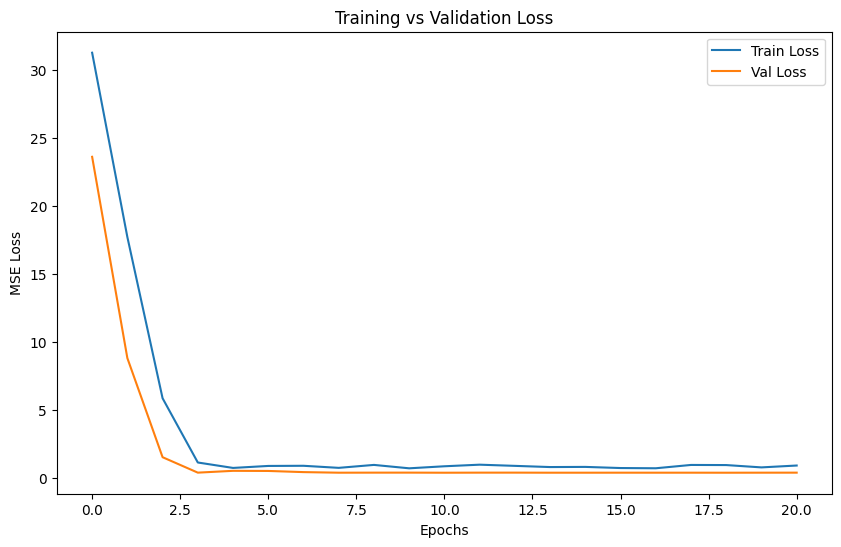

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


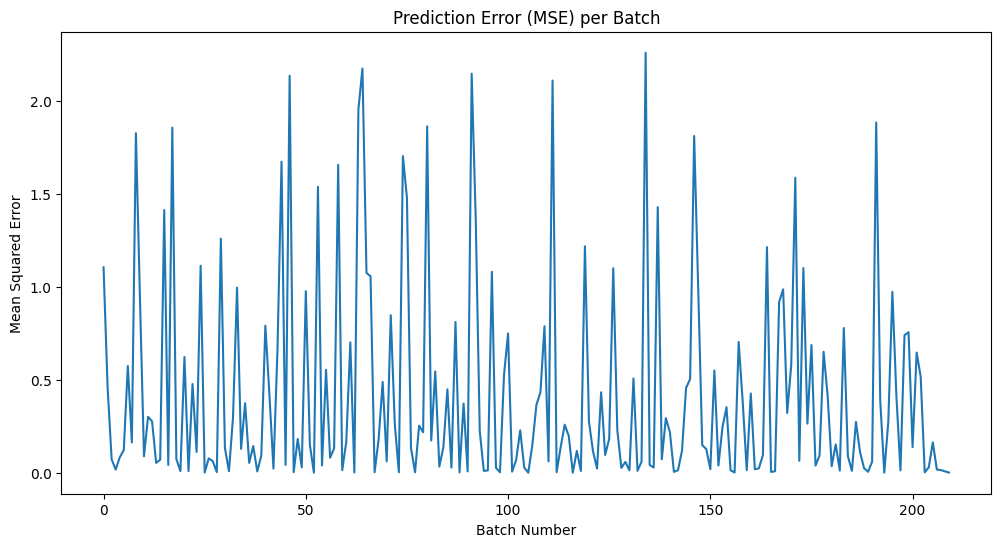


Batches identified as anomalous based on prediction error threshold:
[ 21  38  91 120 121 152 172 214 262 282 370]


In [76]:
# =============================
# Libraries
# =============================
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# =============================
# 1. Load and Explore Data
# =============================
excel_file_path = 'FnB_LSTM_Dataset_with_Anomalies.xlsx'
df = pd.read_excel(excel_file_path)

print("Descriptive statistics:")
display(df.describe())

# Correlation heatmap
numerical_cols = df.select_dtypes(include=['number']).columns.tolist()
cols_to_exclude = ['Batch_ID', 'Time_Step', 'Texture_Score', 'Visual_Quality']
correlation_cols = [col for col in numerical_cols if col not in cols_to_exclude]
correlation_matrix = df[correlation_cols].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Process Parameters')
plt.show()

# Histograms
print("\nHistograms of original data:")
df.hist(figsize=(15, 10))
plt.tight_layout()
plt.show()

# =============================
# 2. Outlier Detection (IQR)
# =============================
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
outliers_iqr = df[((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

print("\nOutliers detected using IQR method:")
display(outliers_iqr)

plt.figure(figsize=(15, 10))
df.select_dtypes(include=np.number).boxplot()
plt.title('Boxplot of Numerical Variables')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Scatter plots for key parameters
key_parameters = ['Flour_Weight', 'Yeast_pct', 'Water_pH', 'Mixer_Speed', 'Oven_Temp', 'Core_Temp']
for param in key_parameters:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df, x='Time_Step', y=param, color='blue', label='Normal')
    sns.scatterplot(data=outliers_iqr, x='Time_Step', y=param, color='red', label='Outlier')
    plt.title(f'Scatter Plot of {param} with Outliers Highlighted (IQR Method)')
    plt.xlabel('Time Step')
    plt.ylabel(param)
    plt.legend()
    plt.show()

# Remove outliers
cleaned_df = df.drop(outliers_iqr.index)
print("\nShape of original data:", df.shape)
print("Shape of cleaned data:", cleaned_df.shape)

# =============================
# 3. Data Preparation for LSTM
# =============================
time_steps = 10
batch_counts = cleaned_df['Batch_ID'].value_counts()
complete_batches = batch_counts[batch_counts == time_steps].index
filtered_df = cleaned_df[cleaned_df['Batch_ID'].isin(complete_batches)].copy()

# Features and target
feature_cols = filtered_df.columns.tolist()
cols_to_exclude = ['Batch_ID', 'Time_Step', 'Texture_Score', 'Visual_Quality']
features = [col for col in feature_cols if col not in cols_to_exclude]
X = filtered_df[features]
y = filtered_df['Texture_Score']

# Normalize
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Reshape [batches, timesteps, features]
n_batches = X_scaled.shape[0] // time_steps
n_features = X_scaled.shape[1]
X_reshaped = X_scaled.reshape((n_batches, time_steps, n_features))

# Align y with last timestep
y_seq_to_one = y.values[time_steps-1::time_steps]

print("\nOriginal feature shape:", X.shape)
print("Reshaped feature shape:", X_reshaped.shape)
print("Target shape (seq-to-one):", y_seq_to_one.shape)

# =============================
# 4. Train-Test Split
# =============================
X_train, X_test, y_train, y_test = train_test_split(
    X_reshaped, y_seq_to_one, test_size=0.2, random_state=42
)

# =============================
# 5. Build Model
# =============================
model = Sequential([
    LSTM(64, activation="tanh", return_sequences=True, input_shape=(time_steps, n_features)),
    Dropout(0.2),
    LSTM(32, activation="tanh"),
    Dropout(0.2),
    Dense(1)
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss="mse")

print("\nModel Summary:")
model.summary()

# =============================
# 6. Training
# =============================
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5)

history = model.fit(
    X_train, y_train,
    epochs=200,
    batch_size=16,
    validation_split=0.2,
    callbacks=[early_stop, reduce_lr],
    verbose=1
)

# =============================
# 7. Evaluation
# =============================
loss = model.evaluate(X_test, y_test, verbose=1)
print(f"\nTest Loss (MSE): {loss}")

y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"R² Score: {r2}")
print(f"RMSE: {rmse}")

# =============================
# 8. Loss Curve
# =============================
plt.figure(figsize=(10, 6))
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Val Loss")
plt.xlabel("Epochs")
plt.ylabel("MSE Loss")
plt.title("Training vs Validation Loss")
plt.legend()
plt.show()

# =============================
# 9. Full Dataset Predictions & Anomaly Detection
# =============================
X_reshaped_tensor = tf.convert_to_tensor(X_reshaped, dtype=tf.float32)
y_pred_full = model.predict(X_reshaped_tensor)

# True targets (last timestep per batch)
y_true_full = y_seq_to_one.reshape(-1, 1)

mse_per_batch = np.mean(np.square(y_true_full - y_pred_full), axis=1)

plt.figure(figsize=(12, 6))
plt.plot(mse_per_batch)
plt.title('Prediction Error (MSE) per Batch')
plt.xlabel('Batch Number')
plt.ylabel('Mean Squared Error')
plt.show()

threshold = np.percentile(mse_per_batch, 95)  # 95th percentile
anomalous_batches_indices = np.where(mse_per_batch > threshold)[0]
anomalous_batches = filtered_df['Batch_ID'].unique()[anomalous_batches_indices]

print("\nBatches identified as anomalous based on prediction error threshold:")
print(anomalous_batches)




Descriptive statistics:


Batch_ID   Time_Step  Flour_Weight    Yeast_pct     Water_pH  \
count  4000.000000  4000.00000   4000.000000  4000.000000  4000.000000   
mean    200.500000     5.50000    499.209562     2.003265     6.591311   
std     115.484129     2.87264     28.712333     0.401776     0.510535   
min       1.000000     1.00000    231.344074     0.305958     3.000000   
25%     100.750000     3.00000    487.697347     1.721063     6.300653   
50%     200.500000     5.50000    498.468004     1.998896     6.586129   
75%     300.250000     8.00000    508.792487     2.254376     6.917817   
max     400.000000    10.00000    774.432650     7.235320    10.000000   

       Mixer_Speed   Proof_Temp  Proof_Humidity    Oven_Temp    Core_Temp  \
count  4000.000000  4000.000000     4000.000000  4000.000000  4000.000000   
mean    110.348250    31.565930       77.468954   134.860368    64.004790   
std      23.889457     3.052437        5.560535    56.003921    25.699253   
min      10.000000    10.000000       20.000000    34.763658    19.255476   
25%      95.000000    29.740843       74.110205    87.477279    42.007198   
50%     110.000000    31.680688       77.457307   133.398859    64.001105   
75%     125.000000    33.291491       81.238257   181.576867    85.467533   
max     300.000000    60.000000      100.000000   300.000000   150.000000   

       Baking_Time  Texture_Score  Visual_Quality  
count  4000.000000    4000.000000     4000.000000  
mean     32.092500       5.972200        0.485000  
std       4.243636       0.687811        0.499837  
min      25.000000       3.640000        0.000000  
25%      29.000000       5.540000        0.000000  
50%      32.000000       5.980000        0.000000  
75%      36.000000       6.400000        1.000000  
max      39.000000       7.780000        1.000000

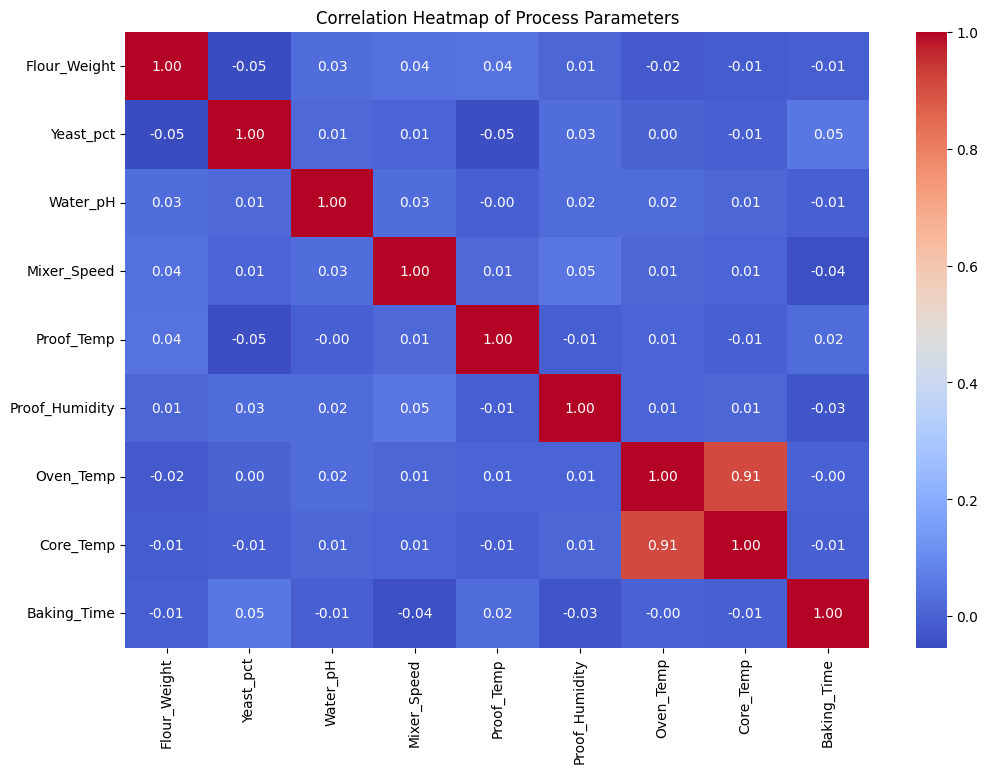


Histograms of original data:


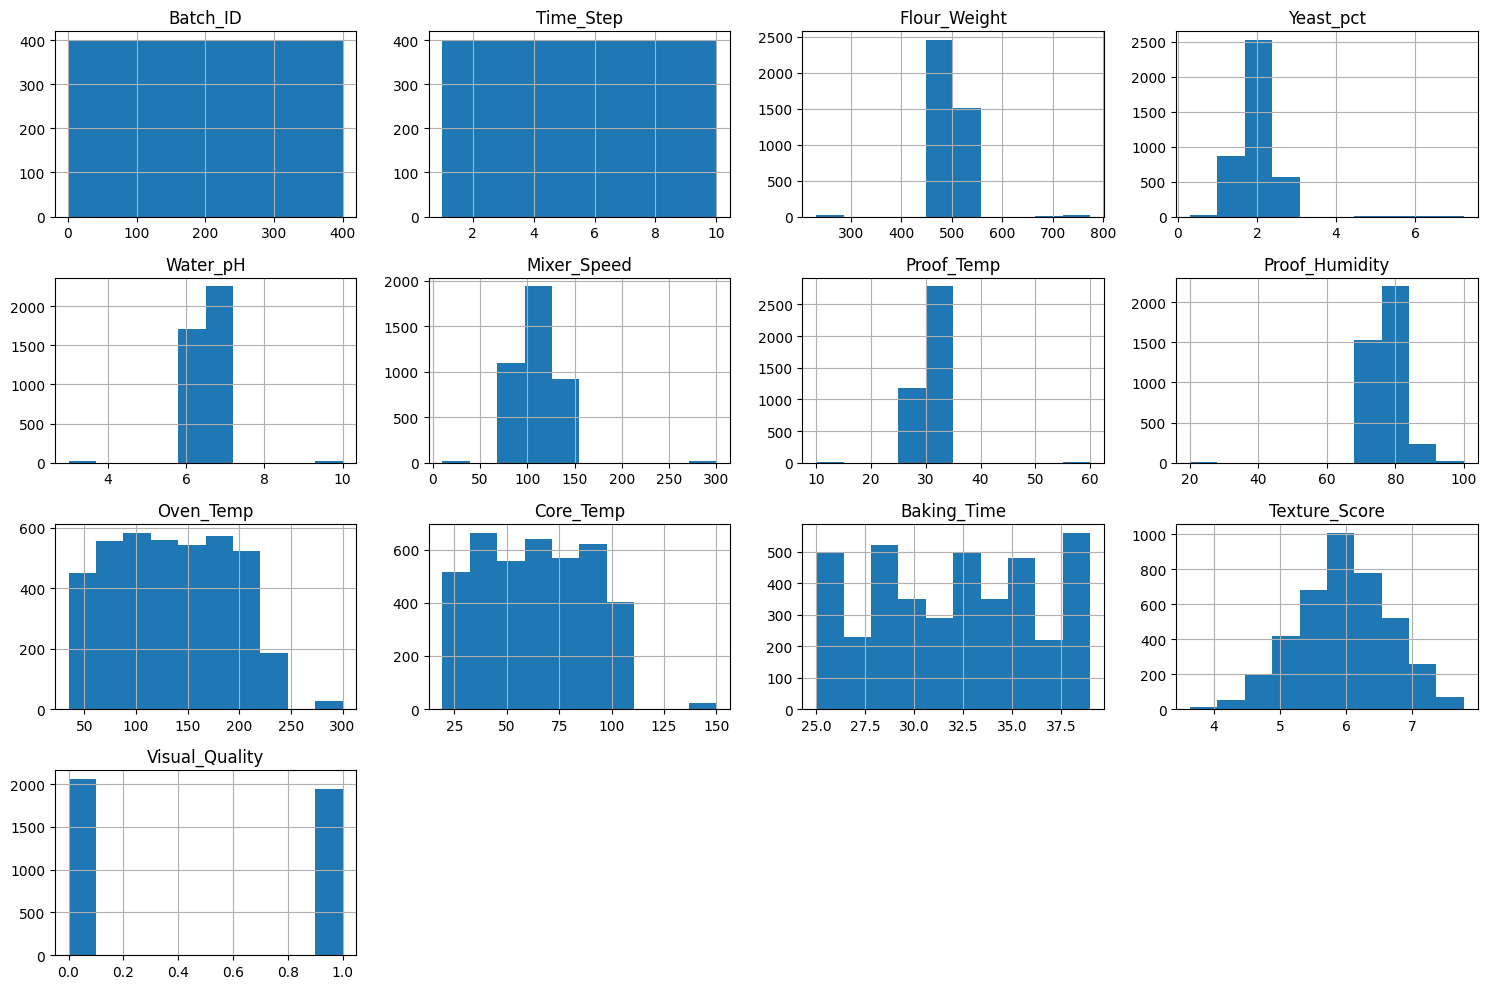


Outliers detected using IQR method:


Batch_ID  Time_Step  Flour_Weight  Yeast_pct  Water_pH  Mixer_Speed  \
9            1         10    507.450712   2.231994  6.718390          300   
10           2          1    516.953423   1.673365  3.000000          129   
20           3          1    483.404975   2.229606  6.765069          106   
48           5          9    529.475521   2.092697  6.097024          135   
52           6          3    250.097754   1.760829  7.195504           91   
...        ...        ...           ...        ...       ...          ...   
3939       394         10    476.739549   1.701078  7.088696          122   
3943       395          4    529.222524   0.309585  6.851875          106   
3958       396          9    489.430351   2.448797  6.428589          109   
3974       398          5    526.856953   2.452237  6.531085          113   
3984       399          5    487.008669   0.409735  6.239505          101   

      Proof_Temp  Proof_Humidity   Oven_Temp   Core_Temp  Baking_Time  \
9      31.120829       71.499624  237.715862  103.558385           35   
10     32.637656       74.675666   50.119357   25.268858           30   
20     10.000000       75.743903   49.411380   21.024862           39   
48     60.000000       80.923245  212.205689   92.459415           32   
52     31.908054       83.239545   90.748455   43.424218           31   
...          ...             ...         ...         ...          ...   
3939   32.705578       84.265494  206.132664  103.468839           36   
3943   28.974376       78.703284  111.988043   52.675318           28   
3958   29.671102      100.000000  191.967460   93.893929           31   
3974   10.000000       74.138838  136.574335   54.554015           37   
3984   33.930466       77.379106  123.656136   55.692845           38   

      Texture_Score  Visual_Quality  
9              5.45               0  
10             5.41               0  
20             5.16               0  
48             5.74               0  
52             6.95               1  
...             ...             ...  
3939           3.64               0  
3943           5.38               0  
3958           4.87               0  
3974           5.58               0  
3984           5.03               0  

[265 rows x 13 columns]

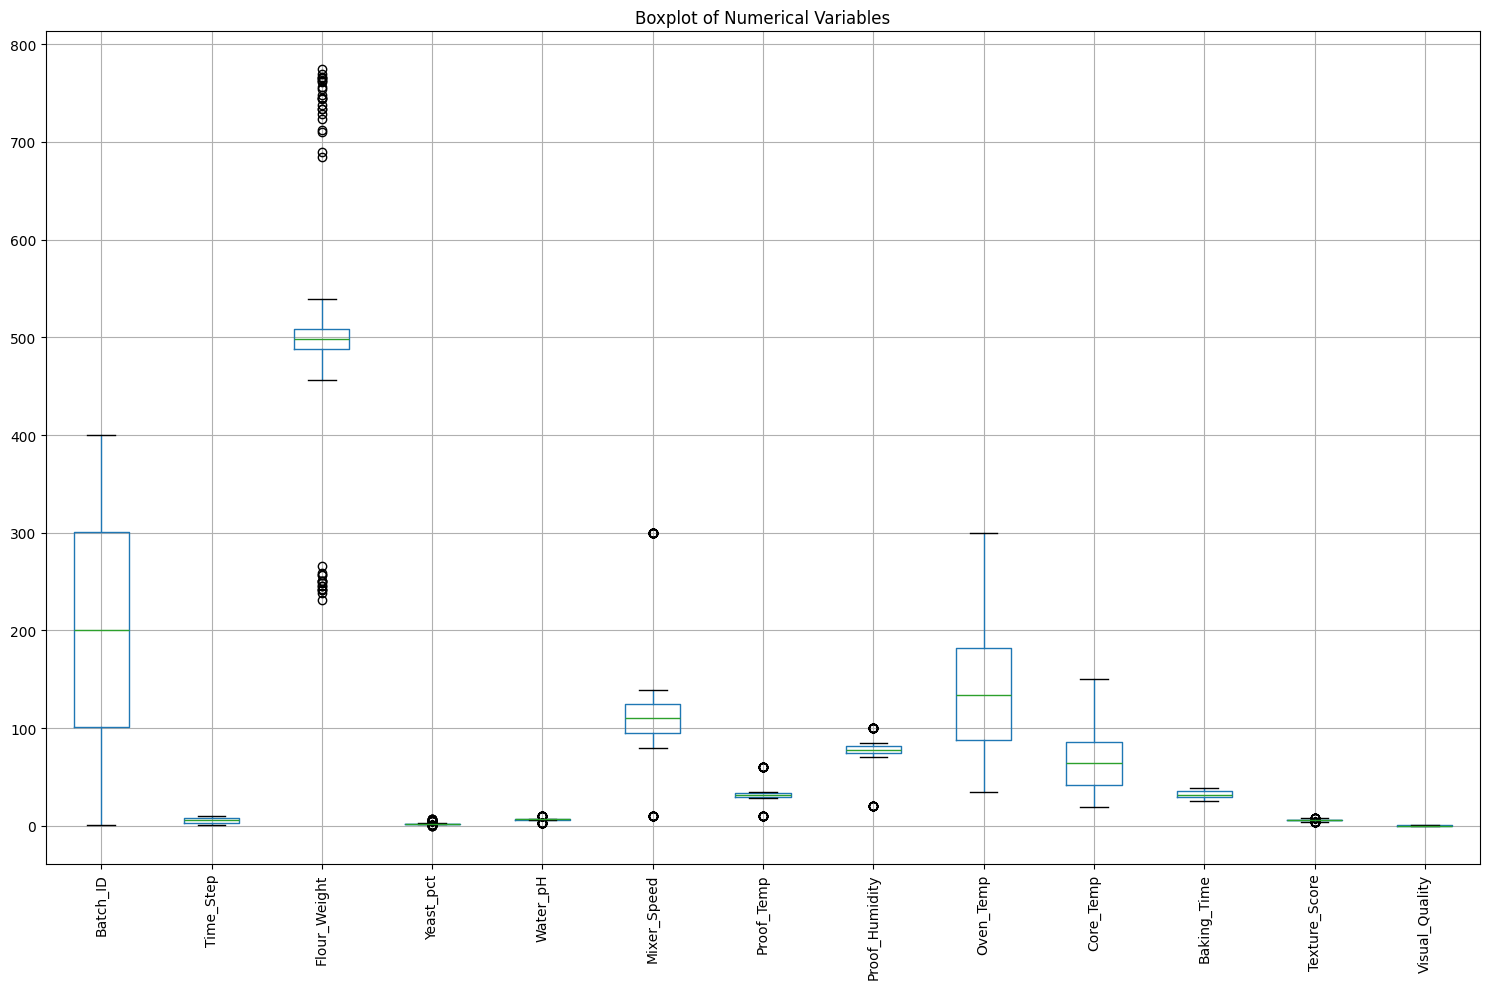

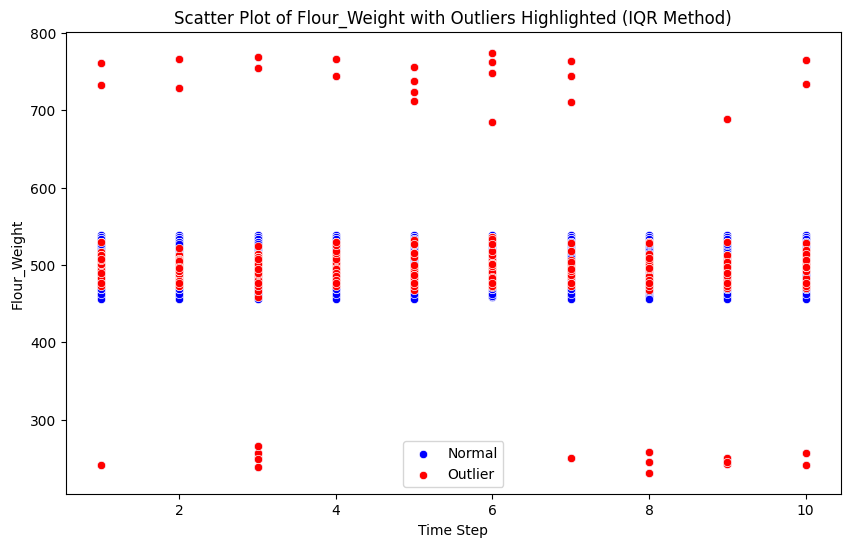

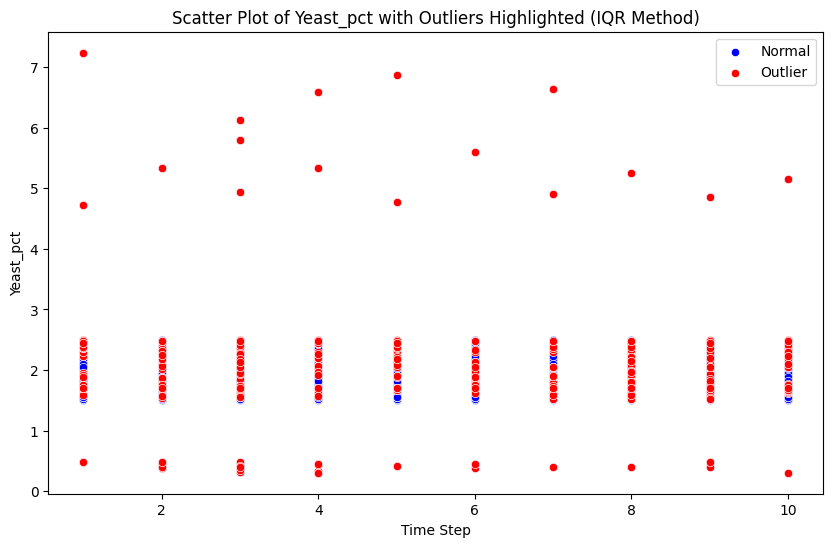

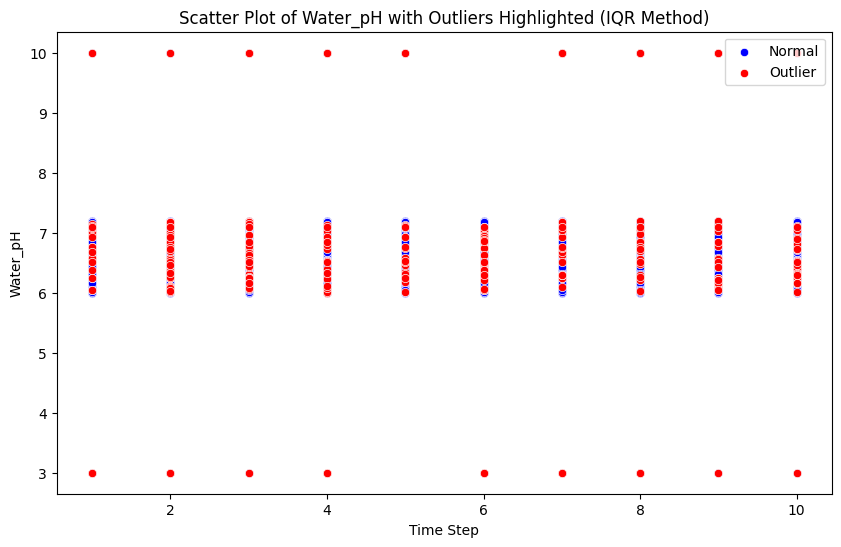

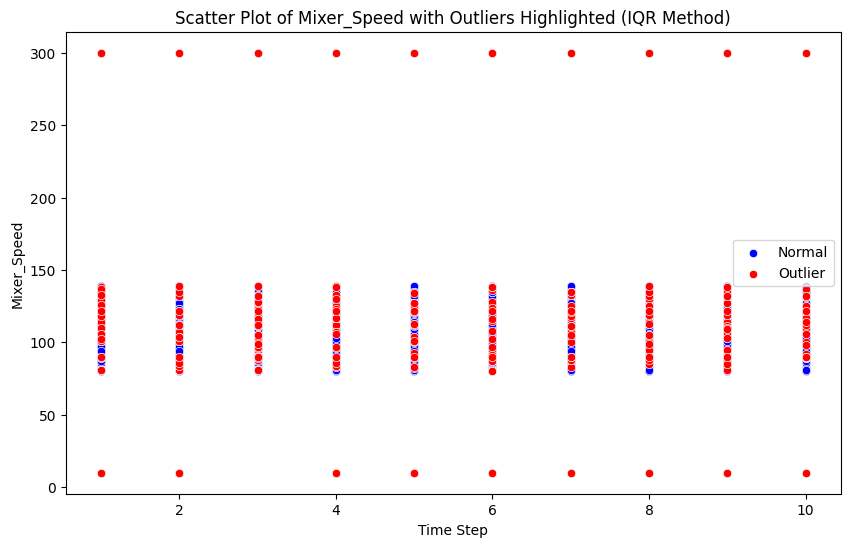

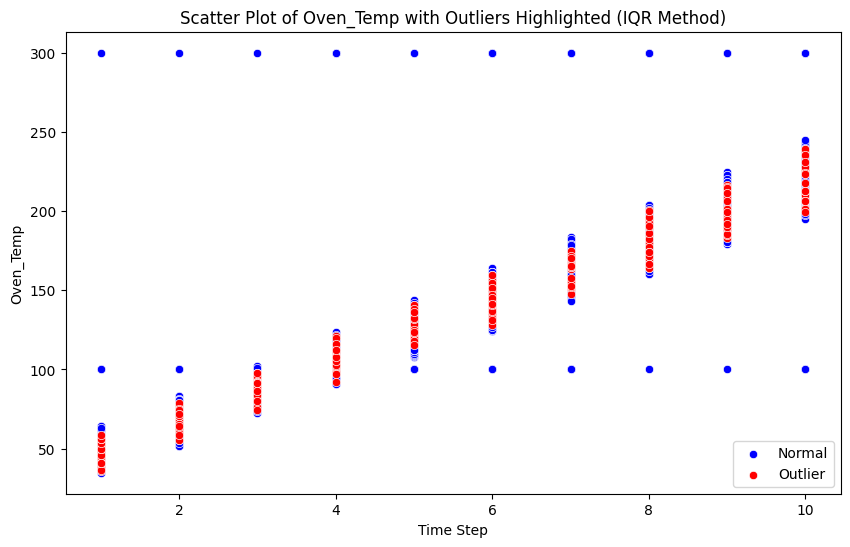

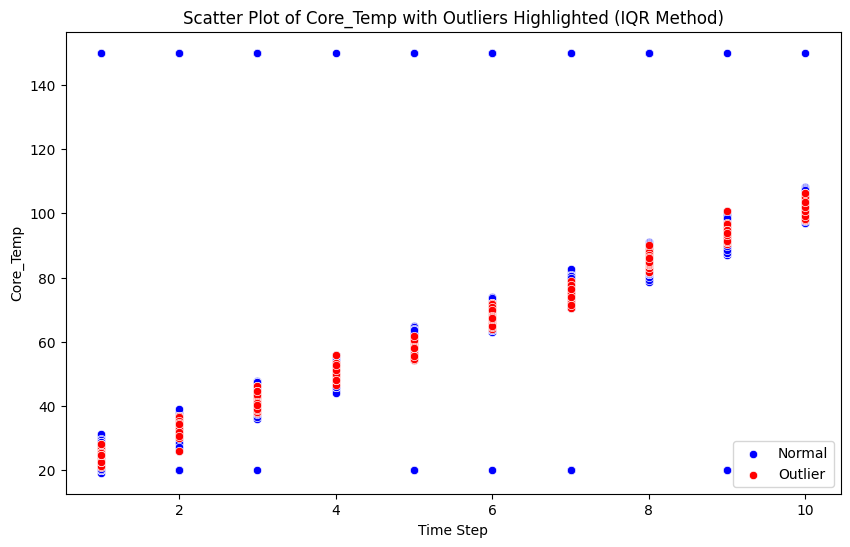


Shape of original data: (4000, 13)
Shape of cleaned data: (3735, 13)

Descriptive statistics of cleaned data:


Batch_ID    Time_Step  Flour_Weight    Yeast_pct     Water_pH  \
count  3735.000000  3735.000000   3735.000000  3735.000000  3735.000000   
mean    200.128514     5.512450    498.887970     1.995692     6.597244   
std     114.944627     2.874596     15.680517     0.300442     0.351154   
min       1.000000     1.000000    456.571725     1.512658     6.001444   
25%     101.000000     3.000000    487.989065     1.726033     6.304996   
50%     200.000000     6.000000    498.847019     1.998873     6.587473   
75%     299.000000     8.000000    508.337689     2.248929     6.917817   
max     400.000000    10.000000    538.965570     2.497672     7.198671   

       Mixer_Speed   Proof_Temp  Proof_Humidity    Oven_Temp    Core_Temp  \
count  3735.000000  3735.000000     3735.000000  3735.000000  3735.000000   
mean    109.637483    31.534944       77.547490   135.179014    64.153188   
std      17.408150     2.035993        4.179879    56.127112    25.771587   
min      80.000000    28.010956       70.057454    34.763658    19.255476   
25%      95.000000    29.740843       74.135798    87.670477    42.104868   
50%     110.000000    31.672819       77.457307   133.862544    64.154725   
75%     124.500000    33.273087       81.111529   181.973574    85.640345   
max     139.000000    34.993346       84.914320   300.000000   150.000000   

       Baking_Time  Texture_Score  Visual_Quality  
count  3735.000000    3735.000000     3735.000000  
mean     32.056225       5.975778        0.486212  
std       4.259656       0.665880        0.499877  
min      25.000000       4.420000        0.000000  
25%      29.000000       5.540000        0.000000  
50%      32.000000       5.980000        0.000000  
75%      36.000000       6.400000        1.000000  
max      39.000000       7.660000        1.000000


Histograms of cleaned data:


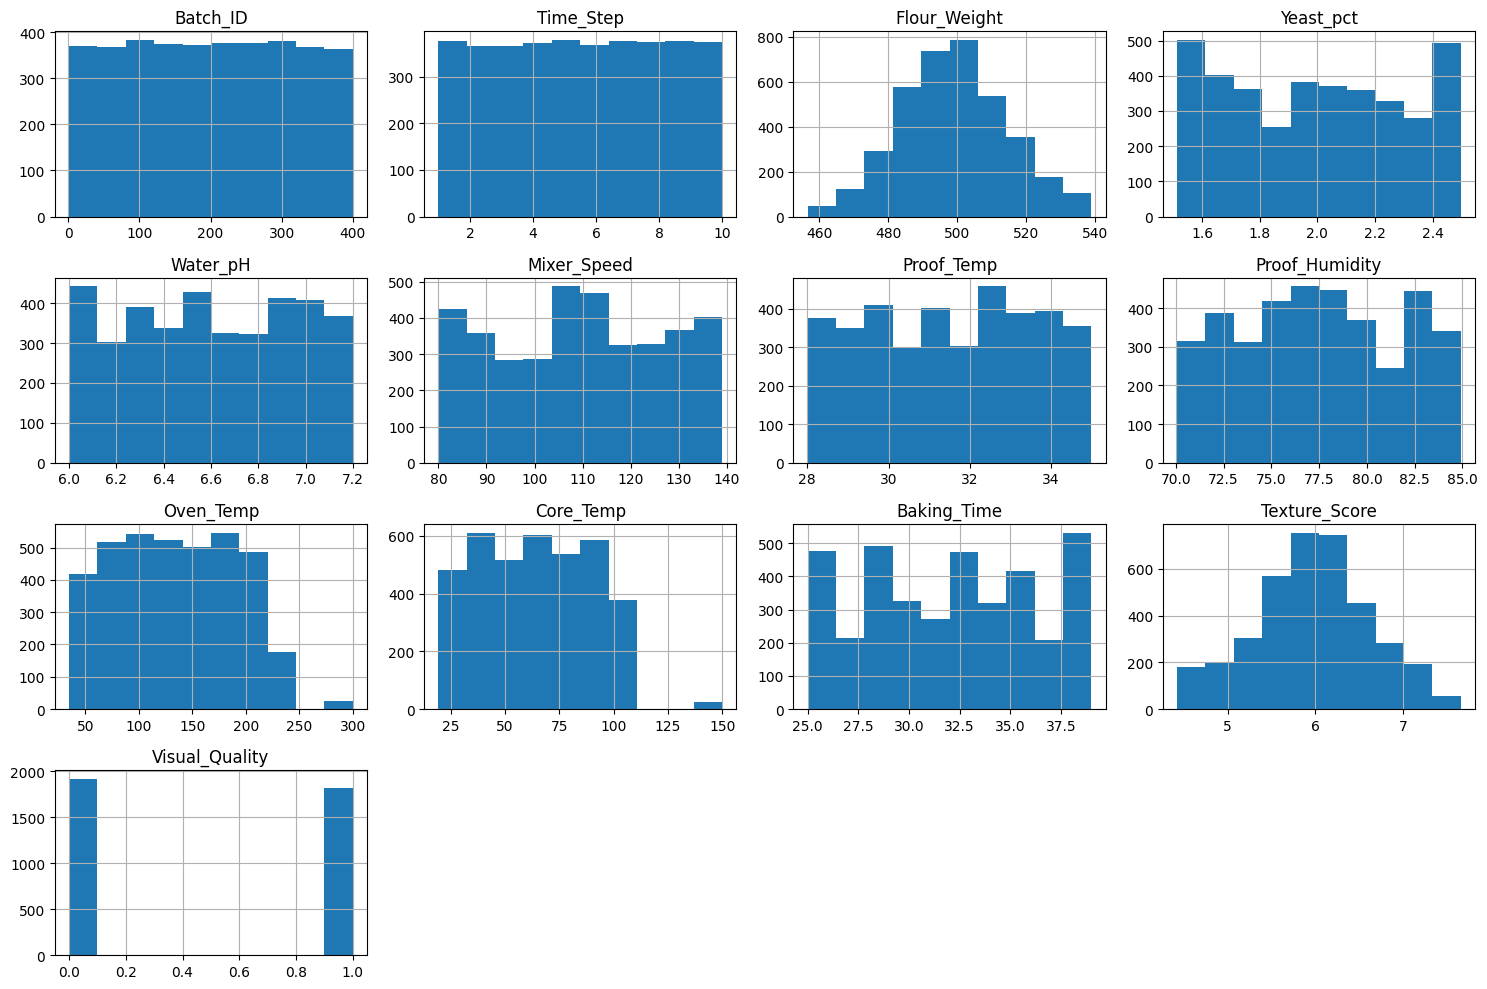


Shapes after split:
X_train: (2614, 1, 12)
y_train: (2614,)
X_val: (560, 1, 12)
X_test: (561, 1, 12)

Model Summary:


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_28"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_64 (LSTM)                  │ (None, 1, 64)          │        19,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_61 (Dropout)            │ (None, 1, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_65 (LSTM)                  │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_62 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 32,161 (125.63 KB)

 Trainable params: 32,161 (125.63 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/200
82/82 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 0.3481 - val_loss: 0.2266
Epoch 2/200
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.2169 - val_loss: 0.1629
Epoch 3/200
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1397 - val_loss: 0.0925
Epoch 4/200
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1046 - val_loss: 0.0961
Epoch 5/200
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0977 - val_loss: 0.0954
Epoch 6/200
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0993 - val_loss: 0.0945
Epoch 7/200
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0958 - val_loss: 0.0947
Epoch 8/200
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0929 - val_loss: 0.1070
Epoch 9/200
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0968 - val_loss: 0.0887
Epoch 10/200
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0909 - val_loss: 0.0878
Epoch 11/200
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0950 - val_loss: 0.1117
Epoch 12/200
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.

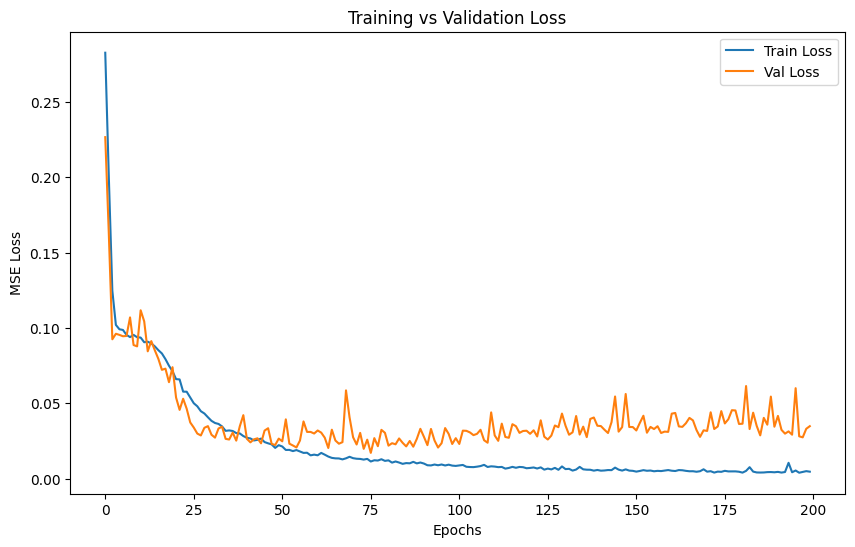

117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


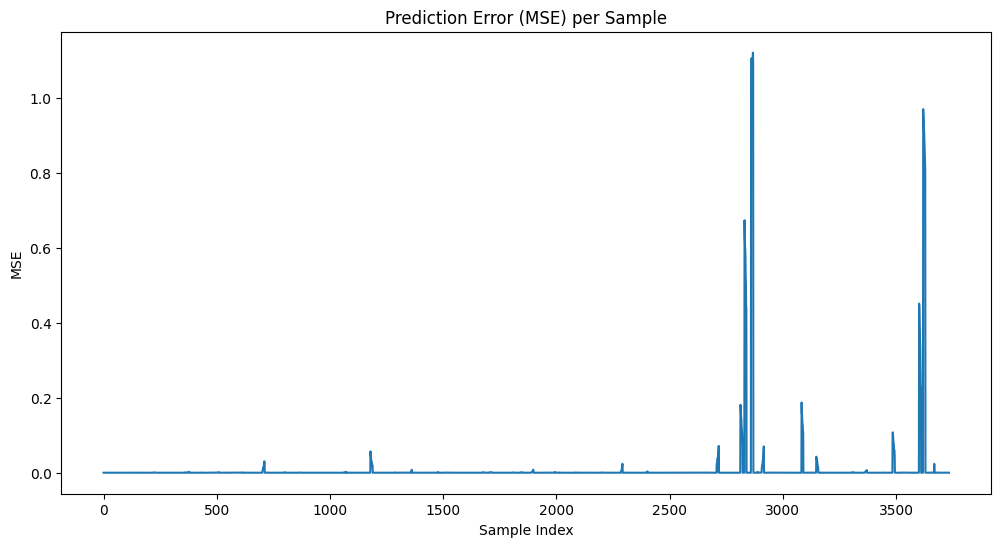


Indices identified as anomalous based on prediction error threshold:
[ 373  374  375  376  377  378  506  507  508  509  702  703  704  705
  706  707  708  709  710  711 1064 1065 1066 1067 1068 1070 1072 1179
 1180 1181 1182 1183 1184 1185 1186 1187 1188 1361 1476 1477 1676 1677
 1706 1707 1708 1709 1710 1711 1712 1713 1844 1846 1847 1891 1892 1893
 1894 1895 1896 1897 1898 1992 1993 1994 2285 2286 2287 2288 2289 2290
 2291 2292 2400 2401 2402 2708 2709 2710 2711 2712 2713 2714 2715 2716
 2717 2813 2814 2815 2816 2817 2818 2819 2820 2821 2822 2831 2832 2833
 2834 2835 2836 2837 2838 2839 2860 2861 2862 2863 2864 2865 2866 2867
 2868 2869 2889 2890 2891 2907 2908 2909 2910 2911 2912 2913 2914 2915
 2916 3083 3084 3085 3086 3087 3088 3089 3090 3148 3149 3150 3151 3152
 3153 3154 3155 3156 3308 3309 3362 3363 3364 3365 3366 3367 3368 3369
 3370 3371 3485 3486 3487 3488 3489 3490 3491 3492 3493 3494 3602 3603
 3604 3605 3606 3607 3608 3609 3610 3620 3621 3622 3623 3624 3625 3626
 3627 3

In [80]:
# =============================
# Import Libraries
# =============================
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# =============================
# 1. Load and Explore Data
# =============================
excel_file_path = 'FnB_LSTM_Dataset_with_Anomalies.xlsx'
df = pd.read_excel(excel_file_path)

print("Descriptive statistics:")
display(df.describe())

# Correlation heatmap
numerical_cols = df.select_dtypes(include=['number']).columns.tolist()
cols_to_exclude = ['Batch_ID', 'Time_Step', 'Texture_Score', 'Visual_Quality']
correlation_cols = [col for col in numerical_cols if col not in cols_to_exclude]
correlation_matrix = df[correlation_cols].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Process Parameters')
plt.show()

# Histograms
print("\nHistograms of original data:")
df.hist(figsize=(15, 10))
plt.tight_layout()
plt.show()

# =============================
# 2. Outlier Detection (IQR)
# =============================
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
outliers_iqr = df[((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

print("\nOutliers detected using IQR method:")
display(outliers_iqr)

plt.figure(figsize=(15, 10))
df.select_dtypes(include=np.number).boxplot()
plt.title('Boxplot of Numerical Variables')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Scatterplots with outliers highlighted
key_parameters = ['Flour_Weight', 'Yeast_pct', 'Water_pH', 'Mixer_Speed', 'Oven_Temp', 'Core_Temp']
for param in key_parameters:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df, x='Time_Step', y=param, color='blue', label='Normal')
    sns.scatterplot(data=outliers_iqr, x='Time_Step', y=param, color='red', label='Outlier')
    plt.title(f'Scatter Plot of {param} with Outliers Highlighted (IQR Method)')
    plt.xlabel('Time Step')
    plt.ylabel(param)
    plt.legend()
    plt.show()

# Clean dataset
cleaned_df = df.drop(outliers_iqr.index)
print("\nShape of original data:", df.shape)
print("Shape of cleaned data:", cleaned_df.shape)
print("\nDescriptive statistics of cleaned data:")
display(cleaned_df.describe())

print("\nHistograms of cleaned data:")
cleaned_df.hist(figsize=(15, 10))
plt.tight_layout()
plt.show()

# =============================
# 3. Data Preparation
# =============================
# Keep only numeric data
cleaned_df = cleaned_df.select_dtypes(include=[np.number]).dropna()

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(cleaned_df)

X = scaled_data[:, :-1]   # all features except last
y = scaled_data[:, -1]    # last column as target

# Reshape into [samples, timesteps=1, features]
X = X.reshape((X.shape[0], 1, X.shape[1]))

# Train/Val/Test split
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, shuffle=False)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, shuffle=False)

print("\nShapes after split:")
print("X_train:", X_train.shape)
print("y_train:", y_train.shape)
print("X_val:", X_val.shape)
print("X_test:", X_test.shape)

# =============================
# 4. Build LSTM Model
# =============================
model = Sequential([
    LSTM(64, activation="tanh", return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),
    LSTM(32, activation="tanh"),
    Dropout(0.2),
    Dense(1)
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss="mse")

print("\nModel Summary:")
model.summary()

# =============================
# 5. Train Model
# =============================
history = model.fit(
    X_train, y_train,
    epochs=200,
    batch_size=32,
    validation_data=(X_val, y_val),
    verbose=1
)

# =============================
# 6. Evaluate Model
# =============================
loss = model.evaluate(X_test, y_test, verbose=1)
print(f"\nTest Loss (MSE): {loss}")

y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"R² Score: {r2}")
print(f"RMSE: {rmse}")

# Loss curve
plt.figure(figsize=(10, 6))
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Val Loss")
plt.xlabel("Epochs")
plt.ylabel("MSE Loss")
plt.title("Training vs Validation Loss")
plt.legend()
plt.show()

# =============================
# 7. Anomaly Detection (Prediction Error)
# =============================
y_pred_full = model.predict(X)
y_true_full = y.reshape(-1, 1)

mse_per_sample = np.square(y_true_full - y_pred_full).flatten()

plt.figure(figsize=(12, 6))
plt.plot(mse_per_sample)
plt.title('Prediction Error (MSE) per Sample')
plt.xlabel('Sample Index')
plt.ylabel('MSE')
plt.show()

threshold = np.percentile(mse_per_sample, 95)
anomalous_indices = np.where(mse_per_sample > threshold)[0]

print("\nIndices identified as anomalous based on prediction error threshold:")
print(anomalous_indices)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/200
88/88 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - loss: 0.3489 - val_loss: 0.2283
Epoch 2/200
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.2074 - val_loss: 0.1249
Epoch 3/200
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1132 - val_loss: 0.0930
Epoch 4/200
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1027 - val_loss: 0.0995
Epoch 5/200
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0976 - val_loss: 0.1036
Epoch 6/200
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0952 - val_loss: 0.1009
Epoch 7/200
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0933 - val_loss: 0.0917
Epoch 8/200
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0868 - val_loss: 0.0866
Epoch 9/200
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0800 - val_loss: 0.0852
Epoch 10/200
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0748 - val_loss: 0.0732
Epoch 11/200
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0609 - val_loss: 0.0529
Epoch 12/200
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss:

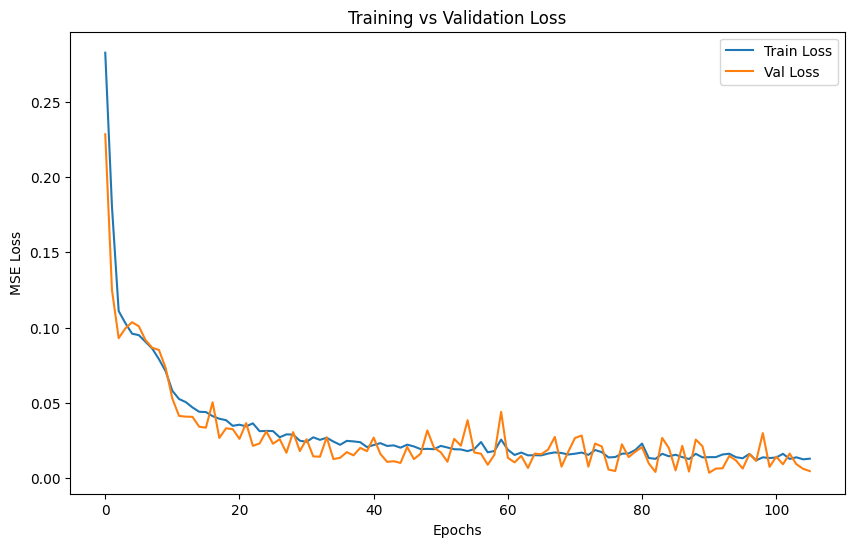

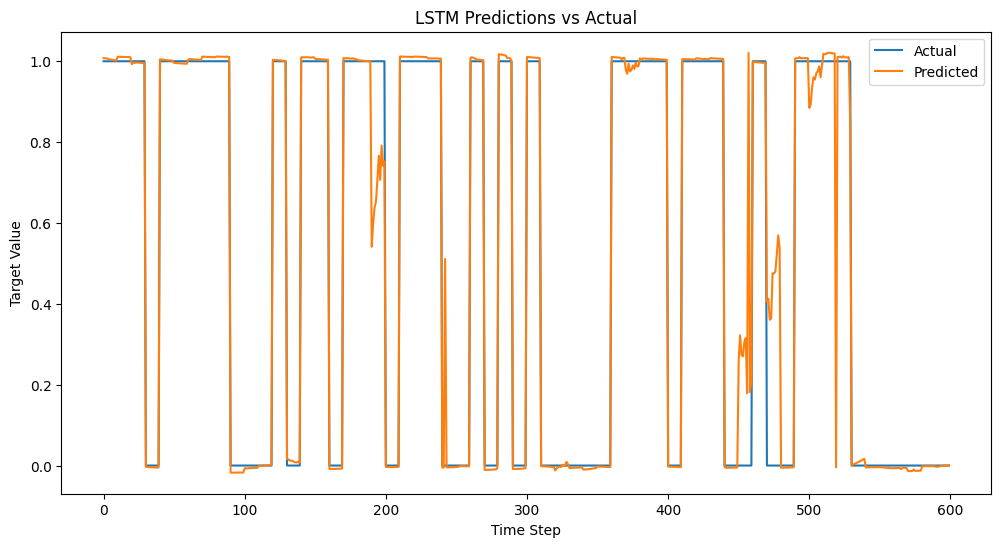

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# =========================
# 1. Load Dataset
# =========================
excel_file_path = "FnB_LSTM_Dataset_with_Anomalies.xlsx"
df = pd.read_excel(excel_file_path)

# Ensure numeric values only
df = df.select_dtypes(include=[np.number]).dropna()

# Features/Target split
X_raw = df.iloc[:, :-1].values
y_raw = df.iloc[:, -1].values

# Number of features BEFORE reshaping
n_features = X_raw.shape[1]

# =========================
# 2. Scale Features
# =========================
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_scaled = scaler_X.fit_transform(X_raw)
y_scaled = scaler_y.fit_transform(y_raw.reshape(-1, 1))

# =========================
# 3. Reshape for LSTM
# =========================
# LSTM expects [samples, timesteps, features]
X = X_scaled.reshape((X_scaled.shape[0], 1, n_features))
y = y_scaled

# Train/Val/Test Split
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, shuffle=False)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, shuffle=False)

# =========================
# 4. Build Model
# =========================
model = Sequential([
    LSTM(128, activation="tanh", return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.3),
    LSTM(64, activation="tanh", return_sequences=True),
    Dropout(0.3),
    LSTM(32, activation="tanh"),
    Dropout(0.2),
    Dense(1)
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss="mse")

# =========================
# 5. Train Model (with EarlyStopping)
# =========================
early_stop = EarlyStopping(monitor="val_loss", patience=15, restore_best_weights=True)

history = model.fit(
    X_train, y_train,
    epochs=200,
    batch_size=32,
    validation_data=(X_val, y_val),
    callbacks=[early_stop],
    verbose=1
)

# =========================
# 6. Evaluate Model
# =========================
loss = model.evaluate(X_test, y_test, verbose=1)
print(f"\nTest Loss (MSE): {loss}")

y_pred_scaled = model.predict(X_test)

# Inverse transform predictions
y_pred = scaler_y.inverse_transform(y_pred_scaled)
y_true = scaler_y.inverse_transform(y_test)

r2 = r2_score(y_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))

print(f"R² Score: {r2}")
print(f"RMSE: {rmse}")

# =========================
# 7. Plot Loss
# =========================
plt.figure(figsize=(10, 6))
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Val Loss")
plt.xlabel("Epochs")
plt.ylabel("MSE Loss")
plt.title("Training vs Validation Loss")
plt.legend()
plt.show()

# =========================
# 8. Plot Predictions
# =========================
plt.figure(figsize=(12, 6))
plt.plot(y_true, label="Actual")
plt.plot(y_pred, label="Predicted")
plt.title("LSTM Predictions vs Actual")
plt.xlabel("Time Step")
plt.ylabel("Target Value")
plt.legend()
plt.show()


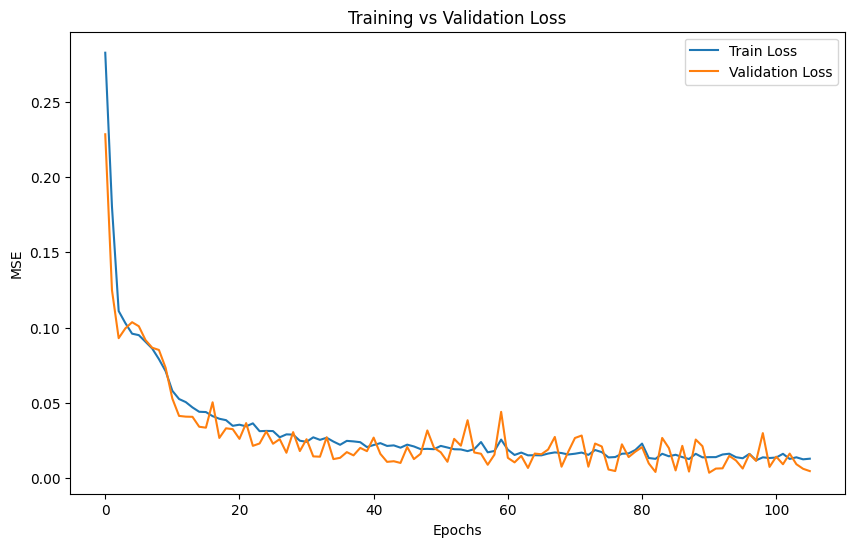

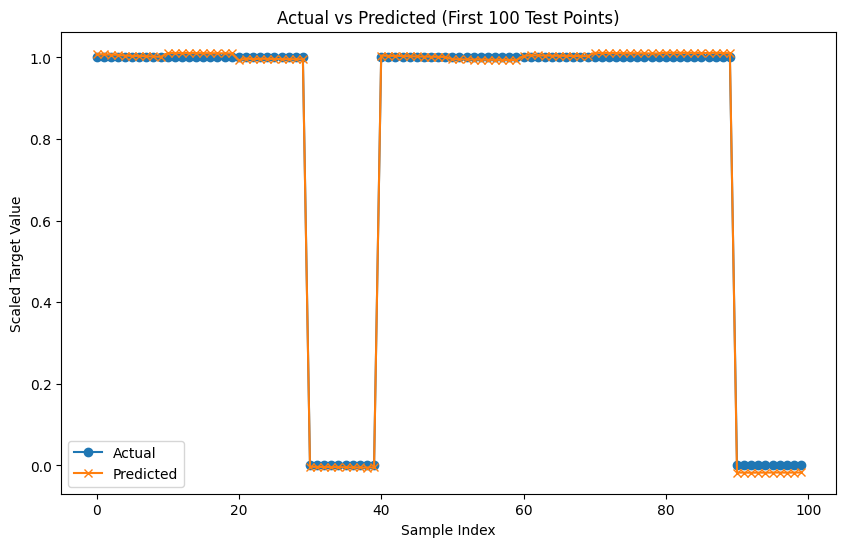

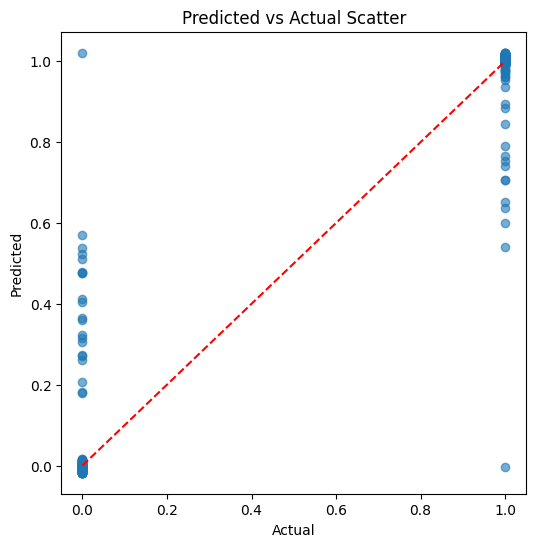

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


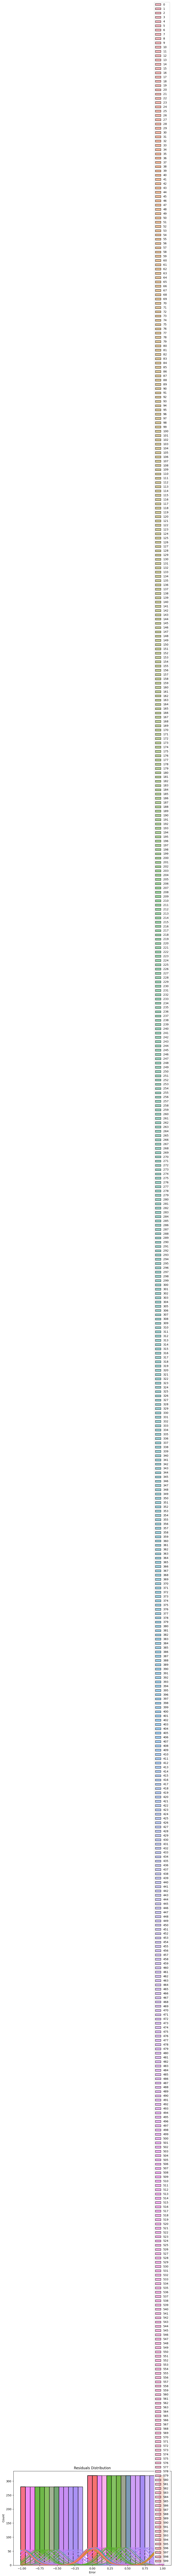

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1. Training vs Validation Loss
plt.figure(figsize=(10,6))
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("MSE")
plt.title("Training vs Validation Loss")
plt.legend()
plt.show()

# 2. Actual vs Predicted
plt.figure(figsize=(10,6))
plt.plot(y_test[:100], label="Actual", marker="o")
plt.plot(y_pred[:100], label="Predicted", marker="x")
plt.xlabel("Sample Index")
plt.ylabel("Scaled Target Value")
plt.title("Actual vs Predicted (First 100 Test Points)")
plt.legend()
plt.show()

# 3. Scatter Plot (Pred vs Actual)
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([0,1],[0,1], color="red", linestyle="--")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Predicted vs Actual Scatter")
plt.show()

# 4. Residual Distribution
residuals = y_test - y_pred.flatten()
plt.figure(figsize=(10,6))
sns.histplot(residuals, kde=True, bins=30)
plt.title("Residuals Distribution")
plt.xlabel("Error")
plt.show()
